# SOMMAIRE

I) Importation des Librairies + données

II) Exploration des données

    a) La table Dispo_Alim_2017
    b) La table Pop_2000_2018  
    c) Test Nan
    
III) Tables Gardées

    a) Pop_2000_2018_OK
    b) Dispo_Alim_2017_OK
    
IV) Jointure

    a) Préparation
    b) Jointure
    c) Mother_Table_Clean (Que les colonnes numériques)
    d) Nouvelles données
    e) Retour d'expériences sur l'ACP    
    
V) Centrage et réduction des valeurs

VI) Méthode de classification hiérarchique

    a) Méthode
    b) Dendogramme
    
VII) Méthode supervisée de classification: k-Means

    a) Cherchons le nombre de clusters idéal
    
VIII) ACP

IX) Heatmap Clusters VS Variables

X) Recommandations

# I) Importation des Librairies + données

In [1]:

import re
from functions import *

#Bibliotheque classique
import pandas as pd
import numpy as np

#Pour la manipulation des dates
from datetime import datetime

#Graphiques
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
from matplotlib.collections import LineCollection
import seaborn as sns 

#Bibliothèque sklearn
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition, preprocessing
from sklearn.metrics  import silhouette_score

#Bibliothèque scipy
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy

In [2]:
Dispo_Alim_2017 = pd.read_csv ('DisponibiliteAlimentaire_2017.csv', sep=',')
Pop_2000_2018 = pd.read_csv ('Population_2000_2018.csv', sep=',')

# II) Exploration des données

A) Table des disponibilités alimentaires

In [3]:
# Table disponibilité alimentaire

Dispo_Alim_2017.info()
print(Dispo_Alim_2017.shape)
Dispo_Alim_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées

Il n'y a pas de NaN dans le dataframe testé et il y a au total 176600 lignes.

B) Table Population

In [4]:
Pop_2000_2018.info()
print(Pop_2000_2018.shape)
Pop_2000_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN

La colonne 'Note' n'est peut-être pas intéressante dans le cadre de notre étude de marché. Je vais la supprimer ou remplacer les valeurs manquantes suivant la colonne description du symbôle.

c) Test de Nan (pour les deux tables)

In [5]:
#Table Population
Pop_2000_2018.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

On voit que la colonne 'Note' contient 4153 valeurs nulles. Supprimons-la car elle manque d'intérêt pour notre étude.

In [6]:
#Suppresion colonne Note, pas intéressante pour la suite de l'étude
Pop_2000_2018 = Pop_2000_2018.drop(['Note'], axis=1)

In [7]:
#Table disponibilité alimentaire
Dispo_Alim_2017.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [8]:
#Test Nan Pop 2000-2018
Test_Nan_Pop = Pop_2000_2018[["Symbole","Description du Symbole"]]
Test_Nan_Pop

Symbole         Description du Symbole
0          X  Sources internationales sûres
1          X  Sources internationales sûres
2          X  Sources internationales sûres
3          X  Sources internationales sûres
4          X  Sources internationales sûres
...      ...                            ...
4406       X  Sources internationales sûres
4407       X  Sources internationales sûres
4408       X  Sources internationales sûres
4409       X  Sources internationales sûres
4410       X  Sources internationales sûres

[4411 rows x 2 columns]

In [9]:
Test_Nan_Pop.describe()

Symbole         Description du Symbole
count     4411                           4411
unique       2                              2
top          X  Sources internationales sûres
freq      4374                           4374

In [10]:
Masque_Test_X = Test_Nan_Pop["Symbole"] != 'X'
Test_Nan_Pop[Masque_Test_X].head(5)

Symbole                             Description du Symbole
171       A  Agrégat, peut inclure des données officielles,...
172       A  Agrégat, peut inclure des données officielles,...
173       A  Agrégat, peut inclure des données officielles,...
174       A  Agrégat, peut inclure des données officielles,...
175       A  Agrégat, peut inclure des données officielles,...

In [11]:
Test_Nan_Pop[Masque_Test_X].describe()

Symbole                             Description du Symbole
count       37                                                 37
unique       1                                                  1
top          A  Agrégat, peut inclure des données officielles,...
freq        37                                                 37

In [12]:
Pop_2000_2018.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [13]:
Pop_2000_2018['Code Domaine'].describe()

count     4411
unique       1
top         OA
freq      4411
Name: Code Domaine, dtype: object

In [14]:
Pop_2000_2018['Domaine'].describe()

count                             4411
unique                               1
top       Séries temporelles annuelles
freq                              4411
Name: Domaine, dtype: object

In [15]:
Pop_2000_2018['Zone'].describe()

count            4411
unique            238
top       Afghanistan
freq               19
Name: Zone, dtype: object

In [16]:
Pop_2000_2018['Élément'].describe()

count                  4411
unique                    1
top       Population totale
freq                   4411
Name: Élément, dtype: object

In [17]:
Pop_2000_2018['Code Élément'].describe()

count    4411.0
mean      511.0
std         0.0
min       511.0
25%       511.0
50%       511.0
75%       511.0
max       511.0
Name: Code Élément, dtype: float64

In [18]:
Pop_2000_2018['Code Produit'].describe()

count    4411.0
mean     3010.0
std         0.0
min      3010.0
25%      3010.0
50%      3010.0
75%      3010.0
max      3010.0
Name: Code Produit, dtype: float64

In [19]:
Pop_2000_2018['Produit'].describe()

count                       4411
unique                         1
top       Population-Estimations
freq                        4411
Name: Produit, dtype: object

In [20]:
Masque_Annee = Pop_2000_2018["Code année"] == Pop_2000_2018["Année"]
Pop_2000_2018[-Masque_Annee]

Empty DataFrame
Columns: [Code Domaine, Domaine, Code zone, Zone, Code Élément, Élément, Code Produit, Produit, Code année, Année, Unité, Valeur, Symbole, Description du Symbole]
Index: []

In [21]:
Pop_2000_2018['Unité'].describe()

count               4411
unique                 1
top       1000 personnes
freq                4411
Name: Unité, dtype: object

c) La table Dispo_Alim_2017

In [22]:
Dispo_Alim_2017.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [23]:
Dispo_Alim_2017['Code Domaine'].describe()

count     176600
unique         1
top          FBS
freq      176600
Name: Code Domaine, dtype: object

In [24]:
Dispo_Alim_2017['Domaine'].describe()

count                          176600
unique                              1
top       Nouveaux Bilans Alimentaire
freq                           176600
Name: Domaine, dtype: object

In [25]:
Dispo_Alim_2017['Code zone'].describe()

count    176600.000000
mean        125.474740
std          72.941699
min           1.000000
25%          63.000000
50%         120.000000
75%         188.000000
max         276.000000
Name: Code zone, dtype: float64

In [26]:
Dispo_Alim_2017['Zone'].describe()

count     176600
unique       174
top        Tchad
freq        1416
Name: Zone, dtype: object

# III) Tables Gardées

    a) Pop_2000_2018_OK

In [27]:
# Vérifications de la colonne Unité
Pop_2000_2018.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole  
0  Sources internationales sûres  
1  Sources internationales sûres  
2  Sources internationales sûres  
3  Sources internationales sûres  
4  Sources internationales sûres

In [28]:
Pop_2000_2018.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [29]:
# Voici d'après l'exploration des données les colonnes gardées

Pop_2000_2018_OK = Pop_2000_2018[['Code zone', 'Zone', 'Année',
       'Valeur', 'Symbole', 'Description du Symbole']]

# Je vais mettre le bon nom et la bonne unité pour la population

Pop_2000_2018_OK = Pop_2000_2018_OK.rename(columns={'Valeur':'Population (hab)','Zone':'Pays','Code zone':'Code Pays'})
Pop_2000_2018_OK["Population (hab)"] = Pop_2000_2018_OK["Population (hab)"]*1000

Pop_2000_2018_OK

Code Pays         Pays  Année  Population (hab) Symbole  \
0             2  Afghanistan   2000        20779953.0       X   
1             2  Afghanistan   2001        21606988.0       X   
2             2  Afghanistan   2002        22600770.0       X   
3             2  Afghanistan   2003        23680871.0       X   
4             2  Afghanistan   2004        24726684.0       X   
...         ...          ...    ...               ...     ...   
4406        181     Zimbabwe   2014        13586707.0       X   
4407        181     Zimbabwe   2015        13814629.0       X   
4408        181     Zimbabwe   2016        14030331.0       X   
4409        181     Zimbabwe   2017        14236595.0       X   
4410        181     Zimbabwe   2018        14438802.0       X   

             Description du Symbole  
0     Sources internationales sûres  
1     Sources internationales sûres  
2     Sources internationales sûres  
3     Sources internationales sûres  
4     Sources internationales sûres  
...                             ...  
4406  Sources internationales sûres  
4407  Sources internationales sûres  
4408  Sources internationales sûres  
4409  Sources internationales sûres  
4410  Sources internationales sûres  

[4411 rows x 6 columns]

In [30]:
Pop_2000_2018_OK['Population (hab)'] = Pop_2000_2018_OK['Population (hab)'].astype(int)

In [31]:
# Multiplication de la colonne Valeur pour obtenir le nombre d'habitants

Pop_2000_2018_OK.head()

Code Pays         Pays  Année  Population (hab) Symbole  \
0          2  Afghanistan   2000          20779953       X   
1          2  Afghanistan   2001          21606988       X   
2          2  Afghanistan   2002          22600770       X   
3          2  Afghanistan   2003          23680871       X   
4          2  Afghanistan   2004          24726684       X   

          Description du Symbole  
0  Sources internationales sûres  
1  Sources internationales sûres  
2  Sources internationales sûres  
3  Sources internationales sûres  
4  Sources internationales sûres

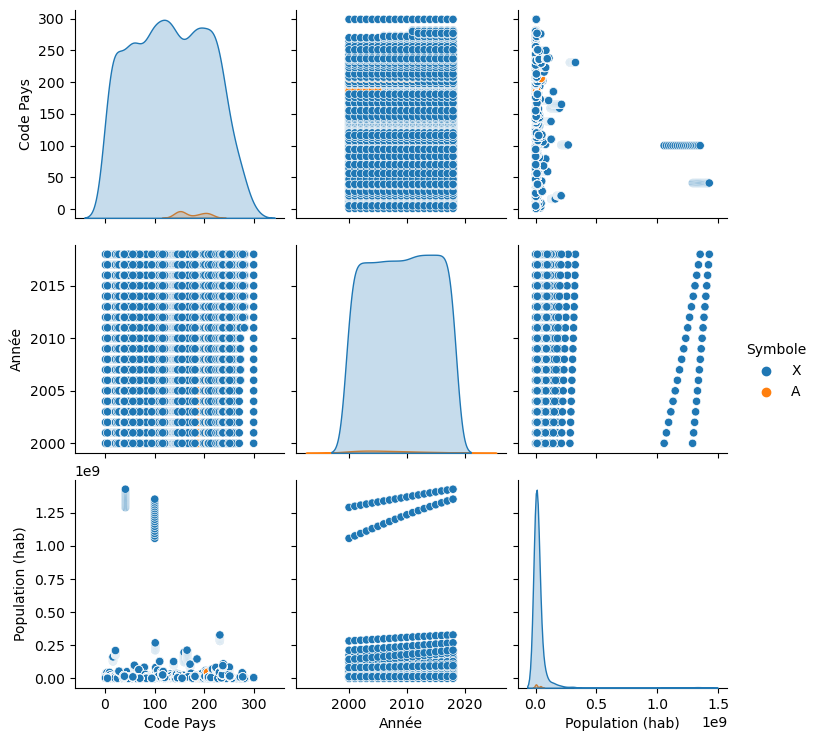

In [32]:
sns.pairplot(Pop_2000_2018_OK, hue="Symbole")

In [33]:
Masque_Pop = Pop_2000_2018_OK["Population (hab)"] > 1000000000
Pop_2000_2018_OK[Masque_Pop]

Code Pays                 Pays  Année  Population (hab) Symbole  \
806          41  Chine, continentale   2000        1290550765       X   
807          41  Chine, continentale   2001        1299129752       X   
808          41  Chine, continentale   2002        1307352257       X   
809          41  Chine, continentale   2003        1315303521       X   
810          41  Chine, continentale   2004        1323084641       X   
811          41  Chine, continentale   2005        1330776380       X   
812          41  Chine, continentale   2006        1338408647       X   
813          41  Chine, continentale   2007        1345993888       X   
814          41  Chine, continentale   2008        1353569484       X   
815          41  Chine, continentale   2009        1361169419       X   
816          41  Chine, continentale   2010        1368810615       X   
817          41  Chine, continentale   2011        1376497639       X   
818          41  Chine, continentale   2012        1384206401       X   
819          41  Chine, continentale   2013        1391883330       X   
820          41  Chine, continentale   2014        1399453965       X   
821          41  Chine, continentale   2015        1406847870       X   
822          41  Chine, continentale   2016        1414049351       X   
823          41  Chine, continentale   2017        1421021791       X   
824          41  Chine, continentale   2018        1427647786       X   
1935        100                 Inde   2000        1056575549       X   
1936        100                 Inde   2001        1075000085       X   
1937        100                 Inde   2002        1093317189       X   
1938        100                 Inde   2003        1111523144       X   
1939        100                 Inde   2004        1129623456       X   
1940        100                 Inde   2005        1147609927       X   
1941        100                 Inde   2006        1165486291       X   
1942        100                 Inde   2007        1183209472       X   
1943        100                 Inde   2008        1200669765       X   
1944        100                 Inde   2009        1217726215       X   
1945        100                 Inde   2010        1234281170       X   
1946        100                 Inde   2011        1250287943       X   
1947        100                 Inde   2012        1265780247       X   
1948        100                 Inde   2013        1280842125       X   
1949        100                 Inde   2014        1295600772       X   
1950        100                 Inde   2015        1310152403       X   
1951        100                 Inde   2016        1324517249       X   
1952        100                 Inde   2017        1338676785       X   
1953        100                 Inde   2018        1352642280       X   

             Description du Symbole  
806   Sources internationales sûres  
807   Sources internationales sûres  
808   Sources internationales sûres  
809   Sources internationales sûres  
810   Sources internationales sûres  
811   Sources internationales sûres  
812   Sources internationales sûres  
813   Sources internationales sûres  
814   Sources internationales sûres  
815   Sources internationales sûres  
816   Sources internationales sûres  
817   Sources internationales sûres  
818   Sources internationales sûres  
819   Sources internationales sûres  
820   Sources internationales sûres  
821   Sources internationales sûres  
822   Sources internationales sûres  
823   Sources internationales sûres  
824   Sources internationales sûres  
1935  Sources internationales sûres  
1936  Sources internationales sûres  
1937  Sources internationales sûres  
1938  Sources internationales sûres  
1939  Sources internationales sûres  
1940  Sources internationales sûres  
1941  Sources internationales sûres  
1942  Sources internationales sûres  
1943  Sources internationales sûres  
1944  Sources internationales sûres  
1945  Sources inte

In [34]:
Pop_2000_2018_OK[Masque_Pop].groupby(["Pays"]).count()

Code Pays  Année  Population (hab)  Symbole  \
Pays                                                               
Chine, continentale         19     19                19       19   
Inde                        19     19                19       19   

                     Description du Symbole  
Pays                                         
Chine, continentale                      19  
Inde                                     19

In [35]:
# Je remplace les symboles par des Valeurs pour avoir des numéros

Pop_2000_2018_OK['Symbole Numérique Source de données'] = Pop_2000_2018_OK['Symbole'].map({'X':0,'A':1})
Pop_2000_2018_OK = Pop_2000_2018_OK.rename(columns={'Symbole':'Symbole Source de données','Description du Symbole':'Description du Symbole Source de données'})
Pop_2000_2018_OK["Population (hab)"] = Pop_2000_2018_OK["Population (hab)"].astype(int)
Pop_2000_2018_OK.head()

Code Pays         Pays  Année  Population (hab) Symbole Source de données  \
0          2  Afghanistan   2000          20779953                         X   
1          2  Afghanistan   2001          21606988                         X   
2          2  Afghanistan   2002          22600770                         X   
3          2  Afghanistan   2003          23680871                         X   
4          2  Afghanistan   2004          24726684                         X   

  Description du Symbole Source de données  \
0            Sources internationales sûres   
1            Sources internationales sûres   
2            Sources internationales sûres   
3            Sources internationales sûres   
4            Sources internationales sûres   

   Symbole Numérique Source de données  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0

Calcul du nombre d'habitants moyens entre 2000 et 2018

In [36]:
# Je vais regrouper les Populations par pays en faisant une moyenne
Pop_Stats = Pop_2000_2018_OK.groupby('Pays').mean('Population (hab)').drop(['Année'], axis=1)
Pop_Stats.rename(columns = {'Population (hab)':'Population Moyenne (hab)'}, inplace = True)
Pop_Stats["Code Pays"] = Pop_Stats["Code Pays"].astype(int)
Pop_Stats.head()

Code Pays  Population Moyenne (hab)  \
Pays                                                  
Afghanistan             2              2.884577e+07   
Afrique du Sud        202              5.090147e+07   
Albanie                 3              2.994856e+06   
Algérie                 4              3.585847e+07   
Allemagne              79              8.152701e+07   

                Symbole Numérique Source de données  
Pays                                                 
Afghanistan                                     0.0  
Afrique du Sud                                  0.0  
Albanie                                         0.0  
Algérie                                         0.0  
Allemagne                                       0.0

In [37]:
Pop_2000_2018_groupby = Pop_2000_2018_OK[["Population (hab)","Pays"]].groupby(["Pays"]).mean()
Pop_2000_2018_groupby = Pop_2000_2018_groupby.rename(columns={"Population (hab)":"Moy Pop (hab) de 2000 à 2018"})

Pop_2000_2018_groupby

Moy Pop (hab) de 2000 à 2018
Pays                                                   
Afghanistan                                2.884577e+07
Afrique du Sud                             5.090147e+07
Albanie                                    2.994856e+06
Algérie                                    3.585847e+07
Allemagne                                  8.152701e+07
...                                                 ...
Îles Salomon                               5.228723e+05
Îles Turques-et-Caïques                    3.080495e+04
Îles Vierges américaines                   1.065800e+05
Îles Vierges britanniques                  2.589047e+04
Îles Wallis-et-Futuna                      1.343147e+04

[238 rows x 1 columns]

In [38]:
Année_déb = 2000

Année_fin = 2018

Masque_déb = Pop_2000_2018_OK["Année"] == Année_déb
Masque_fin = Pop_2000_2018_OK["Année"] == Année_fin

Pop_déb = Pop_2000_2018_OK[Masque_déb][["Code Pays","Pays","Population (hab)"]]
Pop_fin = Pop_2000_2018_OK[Masque_fin][["Code Pays","Pays","Population (hab)"]]

In [39]:
Pop_déb = Pop_déb.rename(columns={"Population (hab)":"Pop déb (hab)"}) 
Pop_fin = Pop_fin.rename(columns={"Population (hab)":"Pop fin (hab)"})

Pop_déb

Code Pays                                    Pays  Pop déb (hab)
0             2                             Afghanistan       20779953
19          202                          Afrique du Sud       44967708
38            3                                 Albanie        3129243
57            4                                 Algérie       31042235
76           79                               Allemagne       81400882
...         ...                                     ...            ...
4316        236  Venezuela (République bolivarienne du)       24192446
4335        237                                Viet Nam       79910412
4354        249                                   Yémen       17409072
4373        251                                  Zambie       10415944
4392        181                                Zimbabwe       11881477

[229 rows x 3 columns]

In [40]:
Pop_fin

Code Pays                                    Pays  Pop fin (hab)
18            2                             Afghanistan       37171921
37          202                          Afrique du Sud       57792518
56            3                                 Albanie        2882740
75            4                                 Algérie       42228408
94           79                               Allemagne       83124418
...         ...                                     ...            ...
4334        236  Venezuela (République bolivarienne du)       28887118
4353        237                                Viet Nam       95545962
4372        249                                   Yémen       28498683
4391        251                                  Zambie       17351708
4410        181                                Zimbabwe       14438802

[236 rows x 3 columns]

In [41]:
Taux_Accroissement_Pop_2000_2018 = pd.merge(Pop_fin,Pop_déb,on=["Code Pays","Pays"],how='left')

Taux_Accroissement_Pop_2000_2018

Code Pays                                    Pays  Pop fin (hab)  \
0            2                             Afghanistan       37171921   
1          202                          Afrique du Sud       57792518   
2            3                                 Albanie        2882740   
3            4                                 Algérie       42228408   
4           79                               Allemagne       83124418   
..         ...                                     ...            ...   
231        236  Venezuela (République bolivarienne du)       28887118   
232        237                                Viet Nam       95545962   
233        249                                   Yémen       28498683   
234        251                                  Zambie       17351708   
235        181                                Zimbabwe       14438802   

     Pop déb (hab)  
0       20779953.0  
1       44967708.0  
2        3129243.0  
3       31042235.0  
4       81400882.0  
..             ...  
231     24192446.0  
232     79910412.0  
233     17409072.0  
234     10415944.0  
235     11881477.0  

[236 rows x 4 columns]

In [42]:
M1 = Taux_Accroissement_Pop_2000_2018.isna().any(axis=1)
liste_index_pb = Taux_Accroissement_Pop_2000_2018.index[M1]
liste_index_pb

Int64Index([28, 53, 143, 188, 193, 201, 205, 209, 210], dtype='int64')

In [43]:
Taux_Accroissement_Pop_2000_2018_pb_9_pays = Taux_Accroissement_Pop_2000_2018.iloc[liste_index_pb]
Taux_Accroissement_Pop_2000_2018_pb_9_pays

Code Pays                                 Pays  Pop fin (hab)  \
28         278      Bonaire, Saint-Eustache et Saba          25711   
53         279                              Curaçao         162752   
143        273                           Monténégro         627809   
188        282                     Saint-Barthélemy           9816   
193        281      Saint-Martin (partie française)          37264   
201        272                               Serbie        8802754   
205        280  Sint Maarten  (partie néerlandaise)          41940   
209        276                               Soudan       41801533   
210        277                        Soudan du Sud       10975927   

     Pop déb (hab)  
28             NaN  
53             NaN  
143            NaN  
188            NaN  
193            NaN  
201            NaN  
205            NaN  
209            NaN  
210            NaN

In [44]:
Pays_Pb = pd.merge(Taux_Accroissement_Pop_2000_2018_pb_9_pays,Pop_2000_2018_OK,on=['Code Pays','Pays'], how='left').drop_duplicates()
Pays_Pb

Code Pays                             Pays  Pop fin (hab)  Pop déb (hab)  \
0         278  Bonaire, Saint-Eustache et Saba          25711            NaN   
1         278  Bonaire, Saint-Eustache et Saba          25711            NaN   
2         278  Bonaire, Saint-Eustache et Saba          25711            NaN   
3         278  Bonaire, Saint-Eustache et Saba          25711            NaN   
4         278  Bonaire, Saint-Eustache et Saba          25711            NaN   
..        ...                              ...            ...            ...   
75        277                    Soudan du Sud       10975927            NaN   
76        277                    Soudan du Sud       10975927            NaN   
77        277                    Soudan du Sud       10975927            NaN   
78        277                    Soudan du Sud       10975927            NaN   
79        277                    Soudan du Sud       10975927            NaN   

    Année  Population (hab) Symbole Source de données  \
0    2011             21993                         X   
1    2012             22842                         X   
2    2013             23505                         X   
3    2014             24070                         X   
4    2015             24570                         X   
..    ...               ...                       ...   
75   2014          10554880                         X   
76   2015          10715658                         X   
77   2016          10832518                         X   
78   2017          10910763                         X   
79   2018          10975927                         X   

   Description du Symbole Source de données  \
0             Sources internationales sûres   
1             Sources internationales sûres   
2             Sources internationales sûres   
3             Sources internationales sûres   
4             Sources internationales sûres   
..                                      ...   
75            Sources internationales sûres   
76            Sources internationales sûres   
77            Sources internationales sûres   
78            Sources internationales sûres   
79            Sources internationales sûres   

    Symbole Numérique Source de données  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  
..                                  ...  
75                                    0  
76                                    0  
77                                    0  
78                                    0  
79                                    0  

[80 rows x 9 columns]

In [45]:
# Je vais chercher le min de l'année pour chaque pays

Valeur_Année_min = Pays_Pb[["Pays","Année"]].groupby("Pays").min()
Valeur_Année_min

Année
Pays                                      
Bonaire, Saint-Eustache et Saba       2011
Curaçao                               2011
Monténégro                            2006
Saint-Barthélemy                      2011
Saint-Martin (partie française)       2011
Serbie                                2006
Sint Maarten  (partie néerlandaise)   2011
Soudan                                2012
Soudan du Sud                         2012

In [46]:
J1 = pd.merge(Taux_Accroissement_Pop_2000_2018_pb_9_pays,Valeur_Année_min,on='Pays',how='inner')
J1

Code Pays                                 Pays  Pop fin (hab)  \
0        278      Bonaire, Saint-Eustache et Saba          25711   
1        279                              Curaçao         162752   
2        273                           Monténégro         627809   
3        282                     Saint-Barthélemy           9816   
4        281      Saint-Martin (partie française)          37264   
5        272                               Serbie        8802754   
6        280  Sint Maarten  (partie néerlandaise)          41940   
7        276                               Soudan       41801533   
8        277                        Soudan du Sud       10975927   

   Pop déb (hab)  Année  
0            NaN   2011  
1            NaN   2011  
2            NaN   2006  
3            NaN   2011  
4            NaN   2011  
5            NaN   2006  
6            NaN   2011  
7            NaN   2012  
8            NaN   2012

In [47]:
J2 = pd.merge(J1,Pop_2000_2018_OK,on=["Code Pays","Pays","Année"])
J2

Code Pays                                 Pays  Pop fin (hab)  \
0        278      Bonaire, Saint-Eustache et Saba          25711   
1        279                              Curaçao         162752   
2        273                           Monténégro         627809   
3        282                     Saint-Barthélemy           9816   
4        281      Saint-Martin (partie française)          37264   
5        272                               Serbie        8802754   
6        280  Sint Maarten  (partie néerlandaise)          41940   
7        276                               Soudan       41801533   
8        277                        Soudan du Sud       10975927   

   Pop déb (hab)  Année  Population (hab) Symbole Source de données  \
0            NaN   2011             21993                         X   
1            NaN   2011            152315                         X   
2            NaN   2006            617860                         X   
3            NaN   2011              9343                         X   
4            NaN   2011             37446                         X   
5            NaN   2006           9145914                         X   
6            NaN   2011             35058                         X   
7            NaN   2012          36193783                         X   
8            NaN   2012          10113649                         X   

  Description du Symbole Source de données  \
0            Sources internationales sûres   
1            Sources internationales sûres   
2            Sources internationales sûres   
3            Sources internationales sûres   
4            Sources internationales sûres   
5            Sources internationales sûres   
6            Sources internationales sûres   
7            Sources internationales sûres   
8            Sources internationales sûres   

   Symbole Numérique Source de données  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  
5                                    0  
6                                    0  
7                                    0  
8                                    0

In [48]:
J3 = J2[['Code Pays', 'Pays', 'Pop fin (hab)', 'Pop déb (hab)',
       'Population (hab)']]
J3

Code Pays                                 Pays  Pop fin (hab)  \
0        278      Bonaire, Saint-Eustache et Saba          25711   
1        279                              Curaçao         162752   
2        273                           Monténégro         627809   
3        282                     Saint-Barthélemy           9816   
4        281      Saint-Martin (partie française)          37264   
5        272                               Serbie        8802754   
6        280  Sint Maarten  (partie néerlandaise)          41940   
7        276                               Soudan       41801533   
8        277                        Soudan du Sud       10975927   

   Pop déb (hab)  Population (hab)  
0            NaN             21993  
1            NaN            152315  
2            NaN            617860  
3            NaN              9343  
4            NaN             37446  
5            NaN           9145914  
6            NaN             35058  
7            NaN          36193783  
8            NaN          10113649

In [49]:
J4 = J3.copy()

J4["Pop déb (hab)"] = J3["Population (hab)"]
J4 = J4.drop("Population (hab)",axis=1)
J4 = J4.drop("Pop fin (hab)",axis=1)
J4 = J4.rename(columns={'Pop déb (hab)':"Valeur Pop (hab) avec l'année min"})
J4

Code Pays                                 Pays  \
0        278      Bonaire, Saint-Eustache et Saba   
1        279                              Curaçao   
2        273                           Monténégro   
3        282                     Saint-Barthélemy   
4        281      Saint-Martin (partie française)   
5        272                               Serbie   
6        280  Sint Maarten  (partie néerlandaise)   
7        276                               Soudan   
8        277                        Soudan du Sud   

   Valeur Pop (hab) avec l'année min  
0                              21993  
1                             152315  
2                             617860  
3                               9343  
4                              37446  
5                            9145914  
6                              35058  
7                           36193783  
8                           10113649

In [50]:
J5 = pd.merge(Taux_Accroissement_Pop_2000_2018,J4,on=['Code Pays',"Pays"],how='left')
J5

Code Pays                                    Pays  Pop fin (hab)  \
0            2                             Afghanistan       37171921   
1          202                          Afrique du Sud       57792518   
2            3                                 Albanie        2882740   
3            4                                 Algérie       42228408   
4           79                               Allemagne       83124418   
..         ...                                     ...            ...   
231        236  Venezuela (République bolivarienne du)       28887118   
232        237                                Viet Nam       95545962   
233        249                                   Yémen       28498683   
234        251                                  Zambie       17351708   
235        181                                Zimbabwe       14438802   

     Pop déb (hab)  Valeur Pop (hab) avec l'année min  
0       20779953.0                                NaN  
1       44967708.0                                NaN  
2        3129243.0                                NaN  
3       31042235.0                                NaN  
4       81400882.0                                NaN  
..             ...                                ...  
231     24192446.0                                NaN  
232     79910412.0                                NaN  
233     17409072.0                                NaN  
234     10415944.0                                NaN  
235     11881477.0                                NaN  

[236 rows x 5 columns]

In [51]:
J5 = J5.fillna(0)
J5

Code Pays                                    Pays  Pop fin (hab)  \
0            2                             Afghanistan       37171921   
1          202                          Afrique du Sud       57792518   
2            3                                 Albanie        2882740   
3            4                                 Algérie       42228408   
4           79                               Allemagne       83124418   
..         ...                                     ...            ...   
231        236  Venezuela (République bolivarienne du)       28887118   
232        237                                Viet Nam       95545962   
233        249                                   Yémen       28498683   
234        251                                  Zambie       17351708   
235        181                                Zimbabwe       14438802   

     Pop déb (hab)  Valeur Pop (hab) avec l'année min  
0       20779953.0                                0.0  
1       44967708.0                                0.0  
2        3129243.0                                0.0  
3       31042235.0                                0.0  
4       81400882.0                                0.0  
..             ...                                ...  
231     24192446.0                                0.0  
232     79910412.0                                0.0  
233     17409072.0                                0.0  
234     10415944.0                                0.0  
235     11881477.0                                0.0  

[236 rows x 5 columns]

In [52]:
J5["Pop déb (hab)_OK"] = 0

J5_2 = J5.copy()

for i in range(len(J5)):
    J5_2["Pop déb (hab)_OK"][i] = max((J5["Pop déb (hab)"][i]),(J5["Valeur Pop (hab) avec l'année min"][i]) )
    
J5_2

/var/folders/gp/y1r_c8817xz9052n5c2hvkmw0000gn/T/ipykernel_43184/1776219256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  J5_2["Pop déb (hab)_OK"][i] = max((J5["Pop déb (hab)"][i]),(J5["Valeur Pop (hab) avec l'année min"][i]) )


Code Pays                                    Pays  Pop fin (hab)  \
0            2                             Afghanistan       37171921   
1          202                          Afrique du Sud       57792518   
2            3                                 Albanie        2882740   
3            4                                 Algérie       42228408   
4           79                               Allemagne       83124418   
..         ...                                     ...            ...   
231        236  Venezuela (République bolivarienne du)       28887118   
232        237                                Viet Nam       95545962   
233        249                                   Yémen       28498683   
234        251                                  Zambie       17351708   
235        181                                Zimbabwe       14438802   

     Pop déb (hab)  Valeur Pop (hab) avec l'année min  Pop déb (hab)_OK  
0       20779953.0                                0.0          20779953  
1       44967708.0                                0.0          44967708  
2        3129243.0                                0.0           3129243  
3       31042235.0                                0.0          31042235  
4       81400882.0                                0.0          81400882  
..             ...                                ...               ...  
231     24192446.0                                0.0          24192446  
232     79910412.0                                0.0          79910412  
233     17409072.0                                0.0          17409072  
234     10415944.0                                0.0          10415944  
235     11881477.0                                0.0          11881477  

[236 rows x 6 columns]

In [53]:
déb = J5_2['Pop déb (hab)_OK']
fin = J5_2["Pop fin (hab)"]

Taux_Accroissement_Pop_2000_2018["Taux Accroissement Population 2000_2018"] = ((fin - déb)/(déb)).round(2)

#Taux_Accroissement_Pop_2000_2018['Taux Accroissement Population 2000_2018']*100
#Taux_Accroissement_Pop_2000_2018['Pop déb (hab)'].astype(int)

Taux_Accroissement_Pop_2000_2018

Code Pays                                    Pays  Pop fin (hab)  \
0            2                             Afghanistan       37171921   
1          202                          Afrique du Sud       57792518   
2            3                                 Albanie        2882740   
3            4                                 Algérie       42228408   
4           79                               Allemagne       83124418   
..         ...                                     ...            ...   
231        236  Venezuela (République bolivarienne du)       28887118   
232        237                                Viet Nam       95545962   
233        249                                   Yémen       28498683   
234        251                                  Zambie       17351708   
235        181                                Zimbabwe       14438802   

     Pop déb (hab)  Taux Accroissement Population 2000_2018  
0       20779953.0                                     0.79  
1       44967708.0                                     0.29  
2        3129243.0                                    -0.08  
3       31042235.0                                     0.36  
4       81400882.0                                     0.02  
..             ...                                      ...  
231     24192446.0                                     0.19  
232     79910412.0                                     0.20  
233     17409072.0                                     0.64  
234     10415944.0                                     0.67  
235     11881477.0                                     0.22  

[236 rows x 5 columns]

###  FIN CORRECTION POPULATION

Après coup, je me suis rendu compte que pour 2 pays, l'année de fin 2018 n'avait pas de valeur

En effet, "taux accroissement_Pop_2000_2018" a 236 lignes alors que "Pop_2000_2018_groupby" a 238 lignes

Les 2 pays qui posent problème sont les pays ayant pour index 206 et 186.

In [54]:
# Je vais chercher le max de l'année pour chaque pays

Valeur_Année_max = Pop_2000_2018_OK[["Pays","Année"]].groupby("Pays").max()
valeur_tri = Valeur_Année_max.sort_values(by ='Année', ascending = True).head(2)
valeur_tri

Année
Pays                       
Serbie-et-Monténégro   2005
Soudan (ex)            2011

In [55]:
# Confirmation des deux valeurs aberrantes
Valeur_Année_max['Année'].describe()

count     238.000000
mean     2017.915966
std         0.955374
min      2005.000000
25%      2018.000000
50%      2018.000000
75%      2018.000000
max      2018.000000
Name: Année, dtype: float64

In [56]:
# Vérification des années de "fin" des deux pays
ex_pays = Valeur_Année_max[Valeur_Année_max['Année'] != 2018]
ex_pays

Année
Pays                       
Serbie-et-Monténégro   2005
Soudan (ex)            2011

In [57]:
M_186 = Taux_Accroissement_Pop_2000_2018["Code Pays"] == 186
Taux_Accroissement_Pop_2000_2018[M_186]

Empty DataFrame
Columns: [Code Pays, Pays, Pop fin (hab), Pop déb (hab), Taux Accroissement Population 2000_2018]
Index: []

In [58]:
M_206 = Taux_Accroissement_Pop_2000_2018["Code Pays"] == 206
Taux_Accroissement_Pop_2000_2018[M_206]

Empty DataFrame
Columns: [Code Pays, Pays, Pop fin (hab), Pop déb (hab), Taux Accroissement Population 2000_2018]
Index: []

In [59]:
M_186_2 = Pop_2000_2018_OK["Code Pays"] == 186
Pop_2000_2018_OK[M_186_2]

Code Pays                  Pays  Année  Population (hab)  \
3782        186  Serbie-et-Monténégro   2000          10101175   
3783        186  Serbie-et-Monténégro   2001          10023939   
3784        186  Serbie-et-Monténégro   2002           9959836   
3785        186  Serbie-et-Monténégro   2003           9906313   
3786        186  Serbie-et-Monténégro   2004           9857775   
3787        186  Serbie-et-Monténégro   2005           9810216   

     Symbole Source de données  \
3782                         A   
3783                         A   
3784                         A   
3785                         A   
3786                         A   
3787                         A   

               Description du Symbole Source de données  \
3782  Agrégat, peut inclure des données officielles,...   
3783  Agrégat, peut inclure des données officielles,...   
3784  Agrégat, peut inclure des données officielles,...   
3785  Agrégat, peut inclure des données officielles,...   
3786  Agrégat, peut inclure des données officielles,...   
3787  Agrégat, peut inclure des données officielles,...   

      Symbole Numérique Source de données  
3782                                    1  
3783                                    1  
3784                                    1  
3785                                    1  
3786                                    1  
3787                                    1

In [60]:
M_Serbie = Pop_2000_2018_OK["Pays"].str.contains("Serbie")
Pop_2000_2018_OK[M_Serbie].drop_duplicates()

Code Pays                  Pays  Année  Population (hab)  \
3769        272                Serbie   2006           9145914   
3770        272                Serbie   2007           9101185   
3771        272                Serbie   2008           9060103   
3772        272                Serbie   2009           9023357   
3773        272                Serbie   2010           8991254   
3774        272                Serbie   2011           8963769   
3775        272                Serbie   2012           8940113   
3776        272                Serbie   2013           8918904   
3777        272                Serbie   2014           8898289   
3778        272                Serbie   2015           8876777   
3779        272                Serbie   2016           8853963   
3780        272                Serbie   2017           8829628   
3781        272                Serbie   2018           8802754   
3782        186  Serbie-et-Monténégro   2000          10101175   
3783        186  Serbie-et-Monténégro   2001          10023939   
3784        186  Serbie-et-Monténégro   2002           9959836   
3785        186  Serbie-et-Monténégro   2003           9906313   
3786        186  Serbie-et-Monténégro   2004           9857775   
3787        186  Serbie-et-Monténégro   2005           9810216   

     Symbole Source de données  \
3769                         X   
3770                         X   
3771                         X   
3772                         X   
3773                         X   
3774                         X   
3775                         X   
3776                         X   
3777                         X   
3778                         X   
3779                         X   
3780                         X   
3781                         X   
3782                         A   
3783                         A   
3784                         A   
3785                         A   
3786                         A   
3787                         A   

               Description du Symbole Source de données  \
3769                      Sources internationales sûres   
3770                      Sources internationales sûres   
3771                      Sources internationales sûres   
3772                      Sources internationales sûres   
3773                      Sources internationales sûres   
3774                      Sources internationales sûres   
3775                      Sources internationales sûres   
3776                      Sources internationales sûres   
3777                      Sources internationales sûres   
3778                      Sources internationales sûres   
3779                      Sources internationales sûres   
3780                      Sources internationales sûres   
3781                      Sources internationales sûres   
3782  Agrégat, peut inclure des données officielles,...   
3783  Agrégat, peut inclure des données officielles,...   
3784  Agrégat, peut inclure des données officielles,...   
3785  Agrégat, peut inclure des données officielles,...   
3786  Agrégat, peut inclure des données officielles,...   
3787  Agrégat, peut inclure des données officielles,...   

      Symbole Numérique Source de données  
3769                                    0  
3770                                    0  
3771                                    0  
3772                                    0  
3773                                    0  
3774                                    0  
3775                                    0  
3776                                    0  
3777                                    0  
3778                                    0  
3779                                    0  
3780                                    0  
3781                                    0  
3782                                    1  
3783                                    1  
3784                                    1  
3785                                    1  
3786                           

In [61]:
# Vérification de cohérence des dates
M_Monténégro = Pop_2000_2018_OK["Pays"].str.contains("Monténégro")
Pop_2000_2018_OK[M_Monténégro]

Code Pays                  Pays  Année  Population (hab)  \
2695        273            Monténégro   2006            617860   
2696        273            Monténégro   2007            619555   
2697        273            Monténégro   2008            621320   
2698        273            Monténégro   2009            622939   
2699        273            Monténégro   2010            624275   
2700        273            Monténégro   2011            625270   
2701        273            Monténégro   2012            625925   
2702        273            Monténégro   2013            626345   
2703        273            Monténégro   2014            626645   
2704        273            Monténégro   2015            626956   
2705        273            Monténégro   2016            627264   
2706        273            Monténégro   2017            627563   
2707        273            Monténégro   2018            627809   
3782        186  Serbie-et-Monténégro   2000          10101175   
3783        186  Serbie-et-Monténégro   2001          10023939   
3784        186  Serbie-et-Monténégro   2002           9959836   
3785        186  Serbie-et-Monténégro   2003           9906313   
3786        186  Serbie-et-Monténégro   2004           9857775   
3787        186  Serbie-et-Monténégro   2005           9810216   

     Symbole Source de données  \
2695                         X   
2696                         X   
2697                         X   
2698                         X   
2699                         X   
2700                         X   
2701                         X   
2702                         X   
2703                         X   
2704                         X   
2705                         X   
2706                         X   
2707                         X   
3782                         A   
3783                         A   
3784                         A   
3785                         A   
3786                         A   
3787                         A   

               Description du Symbole Source de données  \
2695                      Sources internationales sûres   
2696                      Sources internationales sûres   
2697                      Sources internationales sûres   
2698                      Sources internationales sûres   
2699                      Sources internationales sûres   
2700                      Sources internationales sûres   
2701                      Sources internationales sûres   
2702                      Sources internationales sûres   
2703                      Sources internationales sûres   
2704                      Sources internationales sûres   
2705                      Sources internationales sûres   
2706                      Sources internationales sûres   
2707                      Sources internationales sûres   
3782  Agrégat, peut inclure des données officielles,...   
3783  Agrégat, peut inclure des données officielles,...   
3784  Agrégat, peut inclure des données officielles,...   
3785  Agrégat, peut inclure des données officielles,...   
3786  Agrégat, peut inclure des données officielles,...   
3787  Agrégat, peut inclure des données officielles,...   

      Symbole Numérique Source de données  
2695                                    0  
2696                                    0  
2697                                    0  
2698                                    0  
2699                                    0  
2700                                    0  
2701                                    0  
2702                                    0  
2703                                    0  
2704                                    0  
2705                                    0  
2706                                    0  
2707                                    0  
3782                                    1  
3783                                    1  
3784                                    1  
3785                                    1  
3786                           

In [62]:
Pop_2000_2018["Code zone"].drop_duplicates().count()

238

In [63]:
# Vérification de la cohérence des dates
M_Ex_Soudan = Pop_2000_2018_OK["Pays"].str.contains("Soudan")
Pop_2000_2018_OK[M_Ex_Soudan]

Code Pays           Pays  Année  Population (hab)  \
3910        276         Soudan   2012          36193783   
3911        276         Soudan   2013          37072550   
3912        276         Soudan   2014          37977655   
3913        276         Soudan   2015          38902950   
3914        276         Soudan   2016          39847439   
3915        276         Soudan   2017          40813397   
3916        276         Soudan   2018          41801533   
3917        206    Soudan (ex)   2000          33474409   
3918        206    Soudan (ex)   2001          34418875   
3919        206    Soudan (ex)   2002          35393004   
3920        206    Soudan (ex)   2003          36396195   
3921        206    Soudan (ex)   2004          37427544   
3922        206    Soudan (ex)   2005          38485448   
3923        206    Soudan (ex)   2006          39569229   
3924        206    Soudan (ex)   2007          40675760   
3925        206    Soudan (ex)   2008          41797776   
3926        206    Soudan (ex)   2009          42926047   
3927        206    Soudan (ex)   2010          44053377   
3928        206    Soudan (ex)   2011          45180380   
3929        277  Soudan du Sud   2012          10113649   
3930        277  Soudan du Sud   2013          10355035   
3931        277  Soudan du Sud   2014          10554880   
3932        277  Soudan du Sud   2015          10715658   
3933        277  Soudan du Sud   2016          10832518   
3934        277  Soudan du Sud   2017          10910763   
3935        277  Soudan du Sud   2018          10975927   

     Symbole Source de données  \
3910                         X   
3911                         X   
3912                         X   
3913                         X   
3914                         X   
3915                         X   
3916                         X   
3917                         A   
3918                         A   
3919                         A   
3920                         A   
3921                         A   
3922                         A   
3923                         A   
3924                         A   
3925                         A   
3926                         A   
3927                         A   
3928                         A   
3929                         X   
3930                         X   
3931                         X   
3932                         X   
3933                         X   
3934                         X   
3935                         X   

               Description du Symbole Source de données  \
3910                      Sources internationales sûres   
3911                      Sources internationales sûres   
3912                      Sources internationales sûres   
3913                      Sources internationales sûres   
3914                      Sources internationales sûres   
3915                      Sources internationales sûres   
3916                      Sources internationales sûres   
3917  Agrégat, peut inclure des données officielles,...   
3918  Agrégat, peut inclure des données officielles,...   
3919  Agrégat, peut inclure des données officielles,...   
3920  Agrégat, peut inclure des données officielles,...   
3921  Agrégat, peut inclure des données officielles,...   
3922  Agrégat, peut inclure des données officielles,...   
3923  Agrégat, peut inclure des données officielles,...   
3924  Agrégat, peut inclure des données officielles,...   
3925  Agrégat, peut inclure des données officielles,...   
3926  Agrégat, peut inclure des données officielles,...   
3927  Agrégat, peut inclure des données officielles,...   
3928  Agrégat, peut inclure des données officielles,...   
3929                      Sources internationales sûres   
3930                      Sources internationales sûres   
3931                      Sources internationales sûres   
3932                      Sources internationales sûres   
3933                      Sources internationales sûres   
3934              

In [64]:
A = Pop_2000_2018_OK["Code Pays"] == 186
B = Pop_2000_2018_OK["Code Pays"] == 206

Pays_pb_fin = Pop_2000_2018_OK[A | B]
Pays_pb_fin

Code Pays                  Pays  Année  Population (hab)  \
3782        186  Serbie-et-Monténégro   2000          10101175   
3783        186  Serbie-et-Monténégro   2001          10023939   
3784        186  Serbie-et-Monténégro   2002           9959836   
3785        186  Serbie-et-Monténégro   2003           9906313   
3786        186  Serbie-et-Monténégro   2004           9857775   
3787        186  Serbie-et-Monténégro   2005           9810216   
3917        206           Soudan (ex)   2000          33474409   
3918        206           Soudan (ex)   2001          34418875   
3919        206           Soudan (ex)   2002          35393004   
3920        206           Soudan (ex)   2003          36396195   
3921        206           Soudan (ex)   2004          37427544   
3922        206           Soudan (ex)   2005          38485448   
3923        206           Soudan (ex)   2006          39569229   
3924        206           Soudan (ex)   2007          40675760   
3925        206           Soudan (ex)   2008          41797776   
3926        206           Soudan (ex)   2009          42926047   
3927        206           Soudan (ex)   2010          44053377   
3928        206           Soudan (ex)   2011          45180380   

     Symbole Source de données  \
3782                         A   
3783                         A   
3784                         A   
3785                         A   
3786                         A   
3787                         A   
3917                         A   
3918                         A   
3919                         A   
3920                         A   
3921                         A   
3922                         A   
3923                         A   
3924                         A   
3925                         A   
3926                         A   
3927                         A   
3928                         A   

               Description du Symbole Source de données  \
3782  Agrégat, peut inclure des données officielles,...   
3783  Agrégat, peut inclure des données officielles,...   
3784  Agrégat, peut inclure des données officielles,...   
3785  Agrégat, peut inclure des données officielles,...   
3786  Agrégat, peut inclure des données officielles,...   
3787  Agrégat, peut inclure des données officielles,...   
3917  Agrégat, peut inclure des données officielles,...   
3918  Agrégat, peut inclure des données officielles,...   
3919  Agrégat, peut inclure des données officielles,...   
3920  Agrégat, peut inclure des données officielles,...   
3921  Agrégat, peut inclure des données officielles,...   
3922  Agrégat, peut inclure des données officielles,...   
3923  Agrégat, peut inclure des données officielles,...   
3924  Agrégat, peut inclure des données officielles,...   
3925  Agrégat, peut inclure des données officielles,...   
3926  Agrégat, peut inclure des données officielles,...   
3927  Agrégat, peut inclure des données officielles,...   
3928  Agrégat, peut inclure des données officielles,...   

      Symbole Numérique Source de données  
3782                                    1  
3783                                    1  
3784                                    1  
3785                                    1  
3786                                    1  
3787                                    1  
3917                                    1  
3918                                    1  
3919                                    1  
3920                                    1  
3921                                    1  
3922                                    1  
3923                                    1  
3924                                    1  
3925                                    1  
3926                                    1  
3927                                    1  
3928                                    1

In [65]:
# Je vais chercher le max de l'année pour chaque pays

Valeur_Année_max = Pays_pb_fin[["Pays","Année"]].groupby("Pays").max()

Valeur_Année_max

Année
Pays                       
Serbie-et-Monténégro   2005
Soudan (ex)            2011

In [66]:
J1_fin = pd.merge(Pop_2000_2018_OK,Valeur_Année_max,on=['Pays',"Année"],how='inner')
J1_fin

Code Pays                  Pays  Année  Population (hab)  \
0        186  Serbie-et-Monténégro   2005           9810216   
1        206           Soudan (ex)   2011          45180380   

  Symbole Source de données  \
0                         A   
1                         A   

            Description du Symbole Source de données  \
0  Agrégat, peut inclure des données officielles,...   
1  Agrégat, peut inclure des données officielles,...   

   Symbole Numérique Source de données  
0                                    1  
1                                    1

In [67]:
# Je vais chercher le min de l'année pour chaque pays

Valeur_Année_min_2 = Pays_pb_fin[["Pays","Année"]].groupby("Pays").min()

Valeur_Année_min_2

Année
Pays                       
Serbie-et-Monténégro   2000
Soudan (ex)            2000

In [68]:
J1_déb = pd.merge(Pop_2000_2018_OK,Valeur_Année_min_2,on=['Pays',"Année"],how='inner')
J1_déb

Code Pays                  Pays  Année  Population (hab)  \
0        186  Serbie-et-Monténégro   2000          10101175   
1        206           Soudan (ex)   2000          33474409   

  Symbole Source de données  \
0                         A   
1                         A   

            Description du Symbole Source de données  \
0  Agrégat, peut inclure des données officielles,...   
1  Agrégat, peut inclure des données officielles,...   

   Symbole Numérique Source de données  
0                                    1  
1                                    1

In [69]:
J_2_pays_pb = np.concatenate((J1_fin,J1_déb))
J_2_pays_pb

array([[186, 'Serbie-et-Monténégro', 2005, 9810216, 'A',
        'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées',
        1],
       [206, 'Soudan (ex)', 2011, 45180380, 'A',
        'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées',
        1],
       [186, 'Serbie-et-Monténégro', 2000, 10101175, 'A',
        'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées',
        1],
       [206, 'Soudan (ex)', 2000, 33474409, 'A',
        'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées',
        1]], dtype=object)

In [70]:
J_2_pays_pb_df = pd.DataFrame(J_2_pays_pb)
J_2_pays_pb_df

0                     1     2         3  4  \
0  186  Serbie-et-Monténégro  2005   9810216  A   
1  206           Soudan (ex)  2011  45180380  A   
2  186  Serbie-et-Monténégro  2000  10101175  A   
3  206           Soudan (ex)  2000  33474409  A   

                                                   5  6  
0  Agrégat, peut inclure des données officielles,...  1  
1  Agrégat, peut inclure des données officielles,...  1  
2  Agrégat, peut inclure des données officielles,...  1  
3  Agrégat, peut inclure des données officielles,...  1

In [71]:
J_2_pays_pb_df = J_2_pays_pb_df.rename(columns={0:'Code Pays',1:'Pays',2:'Année',3:"Population (hab)"})
J_2_pays_pb_df = J_2_pays_pb_df[['Code Pays','Pays','Année',"Population (hab)"]]
J_2_pays_pb_df

Code Pays                  Pays Année Population (hab)
0       186  Serbie-et-Monténégro  2005          9810216
1       206           Soudan (ex)  2011         45180380
2       186  Serbie-et-Monténégro  2000         10101175
3       206           Soudan (ex)  2000         33474409

In [72]:
M4 = J_2_pays_pb_df["Code Pays"] == 186
J_186 = J_2_pays_pb_df[M4]
J_186

Code Pays                  Pays Année Population (hab)
0       186  Serbie-et-Monténégro  2005          9810216
2       186  Serbie-et-Monténégro  2000         10101175

In [73]:
Pop_fin = min(J_186["Population (hab)"])
Pop_déb = max(J_186["Population (hab)"])

J_186_2 = J_186.copy()

J_186_2["Taux accroissement"] = round(((Pop_fin-Pop_déb)/(Pop_déb)),2)

J_186_2

Code Pays                  Pays Année Population (hab)  Taux accroissement
0       186  Serbie-et-Monténégro  2005          9810216               -0.03
2       186  Serbie-et-Monténégro  2000         10101175               -0.03

In [74]:
M4 = J_2_pays_pb_df["Code Pays"] == 206
J_206 = J_2_pays_pb_df[M4]
J_206

Code Pays         Pays Année Population (hab)
1       206  Soudan (ex)  2011         45180380
3       206  Soudan (ex)  2000         33474409

In [75]:
Pop_fin = max(J_206["Population (hab)"])
Pop_déb = min(J_206["Population (hab)"])

J_206_2 = J_206.copy()

J_206_2["Taux accroissement"] = round(((Pop_fin-Pop_déb)/(Pop_déb)),2)

J_206_2

Code Pays         Pays Année Population (hab)  Taux accroissement
1       206  Soudan (ex)  2011         45180380                0.35
3       206  Soudan (ex)  2000         33474409                0.35

In [76]:
Taux_Accroissement_Pop_2000_2018_OK = pd.concat([Taux_Accroissement_Pop_2000_2018,J_186_2,J_206_2],axis = 0)
Taux_Accroissement_Pop_2000_2018_OK

Code Pays                  Pays  Pop fin (hab)  Pop déb (hab)  \
0           2           Afghanistan     37171921.0     20779953.0   
1         202        Afrique du Sud     57792518.0     44967708.0   
2           3               Albanie      2882740.0      3129243.0   
3           4               Algérie     42228408.0     31042235.0   
4          79             Allemagne     83124418.0     81400882.0   
..        ...                   ...            ...            ...   
235       181              Zimbabwe     14438802.0     11881477.0   
0         186  Serbie-et-Monténégro            NaN            NaN   
2         186  Serbie-et-Monténégro            NaN            NaN   
1         206           Soudan (ex)            NaN            NaN   
3         206           Soudan (ex)            NaN            NaN   

     Taux Accroissement Population 2000_2018 Année Population (hab)  \
0                                       0.79   NaN              NaN   
1                                       0.29   NaN              NaN   
2                                      -0.08   NaN              NaN   
3                                       0.36   NaN              NaN   
4                                       0.02   NaN              NaN   
..                                       ...   ...              ...   
235                                     0.22   NaN              NaN   
0                                        NaN  2005          9810216   
2                                        NaN  2000         10101175   
1                                        NaN  2011         45180380   
3                                        NaN  2000         33474409   

     Taux accroissement  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
..                  ...  
235                 NaN  
0                 -0.03  
2                 -0.03  
1                  0.35  
3                  0.35  

[240 rows x 8 columns]

In [77]:
# Remplacement des valeurs Nan
J6 = Taux_Accroissement_Pop_2000_2018_OK.fillna(0)

J6

Code Pays                  Pays  Pop fin (hab)  Pop déb (hab)  \
0            2           Afghanistan     37171921.0     20779953.0   
1          202        Afrique du Sud     57792518.0     44967708.0   
2            3               Albanie      2882740.0      3129243.0   
3            4               Algérie     42228408.0     31042235.0   
4           79             Allemagne     83124418.0     81400882.0   
..         ...                   ...            ...            ...   
235        181              Zimbabwe     14438802.0     11881477.0   
0          186  Serbie-et-Monténégro            0.0            0.0   
2          186  Serbie-et-Monténégro            0.0            0.0   
1          206           Soudan (ex)            0.0            0.0   
3          206           Soudan (ex)            0.0            0.0   

     Taux Accroissement Population 2000_2018  Année  Population (hab)  \
0                                       0.79      0                 0   
1                                       0.29      0                 0   
2                                      -0.08      0                 0   
3                                       0.36      0                 0   
4                                       0.02      0                 0   
..                                       ...    ...               ...   
235                                     0.22      0                 0   
0                                       0.00   2005           9810216   
2                                       0.00   2000          10101175   
1                                       0.00   2011          45180380   
3                                       0.00   2000          33474409   

     Taux accroissement  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00  
..                  ...  
235                0.00  
0                 -0.03  
2                 -0.03  
1                  0.35  
3                  0.35  

[240 rows x 8 columns]

In [78]:
# Isolation des valeurs nulles pour mettre de côté le Soudan et la Serbie
J6["Taux Accroissement Population (2000_2018)"] = 0

J7 = J6.copy()

J7

Code Pays                  Pays  Pop fin (hab)  Pop déb (hab)  \
0            2           Afghanistan     37171921.0     20779953.0   
1          202        Afrique du Sud     57792518.0     44967708.0   
2            3               Albanie      2882740.0      3129243.0   
3            4               Algérie     42228408.0     31042235.0   
4           79             Allemagne     83124418.0     81400882.0   
..         ...                   ...            ...            ...   
235        181              Zimbabwe     14438802.0     11881477.0   
0          186  Serbie-et-Monténégro            0.0            0.0   
2          186  Serbie-et-Monténégro            0.0            0.0   
1          206           Soudan (ex)            0.0            0.0   
3          206           Soudan (ex)            0.0            0.0   

     Taux Accroissement Population 2000_2018  Année  Population (hab)  \
0                                       0.79      0                 0   
1                                       0.29      0                 0   
2                                      -0.08      0                 0   
3                                       0.36      0                 0   
4                                       0.02      0                 0   
..                                       ...    ...               ...   
235                                     0.22      0                 0   
0                                       0.00   2005           9810216   
2                                       0.00   2000          10101175   
1                                       0.00   2011          45180380   
3                                       0.00   2000          33474409   

     Taux accroissement  Taux Accroissement Population (2000_2018)  
0                  0.00                                          0  
1                  0.00                                          0  
2                  0.00                                          0  
3                  0.00                                          0  
4                  0.00                                          0  
..                  ...                                        ...  
235                0.00                                          0  
0                 -0.03                                          0  
2                 -0.03                                          0  
1                  0.35                                          0  
3                  0.35                                          0  

[240 rows x 9 columns]

In [79]:
# Remise du Soudan et de la Serbie
J7["Taux Accroissement Population (2000_2018)"] = J7["Taux Accroissement Population 2000_2018"] + J7["Taux accroissement"]
J7

Code Pays                  Pays  Pop fin (hab)  Pop déb (hab)  \
0            2           Afghanistan     37171921.0     20779953.0   
1          202        Afrique du Sud     57792518.0     44967708.0   
2            3               Albanie      2882740.0      3129243.0   
3            4               Algérie     42228408.0     31042235.0   
4           79             Allemagne     83124418.0     81400882.0   
..         ...                   ...            ...            ...   
235        181              Zimbabwe     14438802.0     11881477.0   
0          186  Serbie-et-Monténégro            0.0            0.0   
2          186  Serbie-et-Monténégro            0.0            0.0   
1          206           Soudan (ex)            0.0            0.0   
3          206           Soudan (ex)            0.0            0.0   

     Taux Accroissement Population 2000_2018  Année  Population (hab)  \
0                                       0.79      0                 0   
1                                       0.29      0                 0   
2                                      -0.08      0                 0   
3                                       0.36      0                 0   
4                                       0.02      0                 0   
..                                       ...    ...               ...   
235                                     0.22      0                 0   
0                                       0.00   2005           9810216   
2                                       0.00   2000          10101175   
1                                       0.00   2011          45180380   
3                                       0.00   2000          33474409   

     Taux accroissement  Taux Accroissement Population (2000_2018)  
0                  0.00                                       0.79  
1                  0.00                                       0.29  
2                  0.00                                      -0.08  
3                  0.00                                       0.36  
4                  0.00                                       0.02  
..                  ...                                        ...  
235                0.00                                       0.22  
0                 -0.03                                      -0.03  
2                 -0.03                                      -0.03  
1                  0.35                                       0.35  
3                  0.35                                       0.35  

[240 rows x 9 columns]

In [80]:
# Tous les pays ont leur taux d'accroissement respectif
Taux_Accroissement_Pop_2000_2018_OK = J7[["Code Pays","Pays","Taux Accroissement Population (2000_2018)"]].drop_duplicates()
Taux_Accroissement_Pop_2000_2018_OK

Code Pays                  Pays  \
0            2           Afghanistan   
1          202        Afrique du Sud   
2            3               Albanie   
3            4               Algérie   
4           79             Allemagne   
..         ...                   ...   
233        249                 Yémen   
234        251                Zambie   
235        181              Zimbabwe   
0          186  Serbie-et-Monténégro   
1          206           Soudan (ex)   

     Taux Accroissement Population (2000_2018)  
0                                         0.79  
1                                         0.29  
2                                        -0.08  
3                                         0.36  
4                                         0.02  
..                                         ...  
233                                       0.64  
234                                       0.67  
235                                       0.22  
0                                        -0.03  
1                                         0.35  

[238 rows x 3 columns]

In [81]:
Taux_Accroissement_Pop_2000_2018_OK = Taux_Accroissement_Pop_2000_2018_OK.sort_values(["Pays"],ascending=True).reset_index()
Taux_Accroissement_Pop_2000_2018_OK = Taux_Accroissement_Pop_2000_2018_OK[["Code Pays","Pays","Taux Accroissement Population (2000_2018)"]]

Taux_Accroissement_Pop_2000_2018_OK

Code Pays                       Pays  \
0            2                Afghanistan   
1          202             Afrique du Sud   
2            3                    Albanie   
3            4                    Algérie   
4           79                  Allemagne   
..         ...                        ...   
233         25               Îles Salomon   
234        224    Îles Turques-et-Caïques   
235        240   Îles Vierges américaines   
236        239  Îles Vierges britanniques   
237        243      Îles Wallis-et-Futuna   

     Taux Accroissement Population (2000_2018)  
0                                         0.79  
1                                         0.29  
2                                        -0.08  
3                                         0.36  
4                                         0.02  
..                                         ...  
233                                       0.58  
234                                       0.87  
235                                      -0.04  
236                                       0.47  
237                                      -0.21  

[238 rows x 3 columns]

In [82]:
# Vérification des valeurs nulles
Taux_Accroissement_Pop_2000_2018_OK.isna().sum()

Code Pays                                    0
Pays                                         0
Taux Accroissement Population (2000_2018)    0
dtype: int64

Ma table ne contient désormais aucune valeur nulle et est désormais pleinement fonctionnelle.

##  b) Table Dispo_Alim_2017_OK

In [83]:
# Vérification du contenu
Dispo_Alim_2017.head(5)

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées

In [84]:
# Vérification des colonnes
Dispo_Alim_2017.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [85]:
Dispo_Alim_2017_OK = Dispo_Alim_2017[['Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit','Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']]

# Je vais mettre le bon nom et la bonne unité pour la population

Dispo_Alim_2017_OK = Dispo_Alim_2017_OK.rename(columns={'Zone':'Pays','Code zone':'Code Pays','Symbole':'Symbole Origine','Description du Symbole':'Description du Symbole Origine'})

# J'utilise des symbôles numériques

Dispo_Alim_2017_OK['Symbole Numérique Origine'] = Dispo_Alim_2017_OK['Symbole Origine'].map({'S':0,'Fc':1})

Dispo_Alim_2017_OK

Code Pays         Pays  Code Élément  \
0               2  Afghanistan          5511   
1               2  Afghanistan          5611   
2               2  Afghanistan          5072   
3               2  Afghanistan          5911   
4               2  Afghanistan          5301   
...           ...          ...           ...   
176595        181     Zimbabwe          5142   
176596        181     Zimbabwe           645   
176597        181     Zimbabwe           664   
176598        181     Zimbabwe           674   
176599        181     Zimbabwe           684   

                                                  Élément  Code Produit  \
0                                              Production          2511   
1                                 Importations - Quantité          2511   
2                                      Variation de stock          2511   
3                                 Exportations - Quantité          2511   
4                                Disponibilité intérieure          2511   
...                                                   ...           ...   
176595                                         Nourriture          2899   
176596  Disponibilité alimentaire en quantité (kg/pers...          2899   
176597     Disponibilité alimentaire (Kcal/personne/jour)          2899   
176598  Disponibilité de protéines en quantité (g/pers...          2899   
176599  Disponibilité de matière grasse en quantité (g...          2899   

                Produit  Année               Unité   Valeur Symbole Origine  \
0       Blé et produits   2017  Milliers de tonnes  4281.00               S   
1       Blé et produits   2017  Milliers de tonnes  2302.00               S   
2       Blé et produits   2017  Milliers de tonnes  -119.00               S   
3       Blé et produits   2017  Milliers de tonnes     0.00               S   
4       Blé et produits   2017  Milliers de tonnes  6701.00               S   
...                 ...    ...                 ...      ...             ...   
176595     Miscellanees   2017  Milliers de tonnes    19.00               S   
176596     Miscellanees   2017                  kg     1.33              Fc   
176597     Miscellanees   2017  Kcal/personne/jour     1.00              Fc   
176598     Miscellanees   2017     g/personne/jour     0.04              Fc   
176599     Miscellanees   2017     g/personne/jour     0.02              Fc   

       Description du Symbole Origine  Symbole Numérique Origine  
0               Données standardisées                          0  
1               Données standardisées                          0  
2               Données standardisées                          0  
3               Données standardisées                          0  
4               Données standardisées                          0  
...                               ...                        ...  
176595          Données standardisées                          0  
176596                Donnée calculée                          1  
176597                Donnée calculée                          1  
176598                Donnée calculée                          1  
176599                Donnée calculée                          1  

[176600 rows x 12 columns]

In [86]:
# Vérification des valeurs nulles
Dispo_Alim_2017_OK.isna().sum()

Code Pays                         0
Pays                              0
Code Élément                      0
Élément                           0
Code Produit                      0
Produit                           0
Année                             0
Unité                             0
Valeur                            0
Symbole Origine                   0
Description du Symbole Origine    0
Symbole Numérique Origine         0
dtype: int64

Ma table "Dispo_alim" ne contient aucune valeur nulle.

In [87]:
Dispo_Alim_2017_OK.head()

Code Pays         Pays  Code Élément                   Élément  \
0          2  Afghanistan          5511                Production   
1          2  Afghanistan          5611   Importations - Quantité   
2          2  Afghanistan          5072        Variation de stock   
3          2  Afghanistan          5911   Exportations - Quantité   
4          2  Afghanistan          5301  Disponibilité intérieure   

   Code Produit          Produit  Année               Unité  Valeur  \
0          2511  Blé et produits   2017  Milliers de tonnes  4281.0   
1          2511  Blé et produits   2017  Milliers de tonnes  2302.0   
2          2511  Blé et produits   2017  Milliers de tonnes  -119.0   
3          2511  Blé et produits   2017  Milliers de tonnes     0.0   
4          2511  Blé et produits   2017  Milliers de tonnes  6701.0   

  Symbole Origine Description du Symbole Origine  Symbole Numérique Origine  
0               S          Données standardisées                          0  
1               S          Données standardisées                          0  
2               S          Données standardisées                          0  
3               S          Données standardisées                          0  
4               S          Données standardisées                          0

In [88]:
# Comptabilisation du nombre de valeurs
Dispo_Alim_2017_OK['Produit'].value_counts()

Maïs et produits               2593
Blé et produits                2581
Pommes de Terre et produits    2486
Riz et produits                2452
Lait - Excl Beurre             2395
                               ... 
Sucre, betterave                728
Palmistes                       694
Huile de Son de Riz             424
Sucre non centrifugé            322
Viande de Anim Aquatiq           27
Name: Produit, Length: 98, dtype: int64

Occupons-nous des colonnes "Unité" et "Valeurs"

In [89]:
# Vérifications des valeurs de la colonne
Dispo_Alim_2017_OK['Unité'].value_counts()

Milliers de tonnes    118487
g/personne/jour        29019
kg                     14618
Kcal/personne/jour     14476
Name: Unité, dtype: int64

In [90]:
# Comptabilisation du nombre de valeurs
Dispo_Alim_2017_OK['Élément'].value_counts()

Disponibilité intérieure                                         15905
Importations - Quantité                                          15260
Disponibilité alimentaire en quantité (kg/personne/an)           14618
Disponibilité de matière grasse en quantité (g/personne/jour)    14512
Disponibilité de protéines en quantité (g/personne/jour)         14507
Nourriture                                                       14498
Disponibilité alimentaire (Kcal/personne/jour)                   14476
Résidus                                                          12567
Exportations - Quantité                                          12113
Variation de stock                                               11299
Production                                                       10334
Pertes                                                            5813
Alimentation pour touristes                                       5560
Autres utilisations (non alimentaire)                             5292
Alimen

In [91]:
# Somme par éléments et par pays : aggrégation des données
Dispo_Alim_Pivot = Dispo_Alim_2017_OK.groupby(['Pays', 'Élément'])['Valeur'].sum().unstack(-1)
Dispo_Alim_Pivot

Élément                Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                        
Afghanistan                                    NaN                  456.0   
Afrique du Sud                                 0.0                 9371.0   
Albanie                                        NaN                  697.0   
Algérie                                        0.0                 4884.0   
Allemagne                                      NaN                30904.0   
...                                            ...                    ...   
Émirats arabes unis                            NaN                 1479.0   
Équateur                                       0.0                 1017.0   
États-Unis d'Amérique                          NaN               151389.0   
Éthiopie                                       0.0                 4710.0   
Îles Salomon                                 182.0                   15.0   

Élément                Autres utilisations (non alimentaire)  \
Pays                                                           
Afghanistan                                             94.0   
Afrique du Sud                                        1448.0   
Albanie                                                177.0   
Algérie                                               2405.0   
Allemagne                                             8316.0   
...                                                      ...   
Émirats arabes unis                                   2661.0   
Équateur                                              2475.0   
États-Unis d'Amérique                               171964.0   
Éthiopie                                              4126.0   
Îles Salomon                                            11.0   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afghanistan                                                    1997.0   
Afrique du Sud                                                 2987.0   
Albanie                                                        3400.0   
Algérie                                                        3345.0   
Allemagne                                                      3559.0   
...                                                               ...   
Émirats arabes unis                                            3370.0   
Équateur                                                       2585.0   
États-Unis d'Amérique                                          3762.0   
Éthiopie                                                       2304.0   
Îles Salomon                                                   2410.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afghanistan                                                       357.31        
Afrique du Sud                                                    556.42        
Albanie                                                          1260.49        
Algérie                                                           798.71        
Allemagne                                                         943.24        
...                                                                  ...        
Émirats arabes unis                                               627.67        
Équateur                                                          563.62        
États-Unis d'Amérique                                             990.38        
Éthiopie                                                          361.77        
Îles Salomon                                                      659.79        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                     

In [92]:
Dispo_Alim_Pivot = Dispo_Alim_2017_OK.pivot_table("Valeur",index='Pays',columns="Élément",aggfunc="sum")
Dispo_Alim_Pivot

Élément                Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                        
Afghanistan                                    NaN                  456.0   
Afrique du Sud                                 0.0                 9371.0   
Albanie                                        NaN                  697.0   
Algérie                                        0.0                 4884.0   
Allemagne                                      NaN                30904.0   
...                                            ...                    ...   
Émirats arabes unis                            NaN                 1479.0   
Équateur                                       0.0                 1017.0   
États-Unis d'Amérique                          NaN               151389.0   
Éthiopie                                       0.0                 4710.0   
Îles Salomon                                 182.0                   15.0   

Élément                Autres utilisations (non alimentaire)  \
Pays                                                           
Afghanistan                                             94.0   
Afrique du Sud                                        1448.0   
Albanie                                                177.0   
Algérie                                               2405.0   
Allemagne                                             8316.0   
...                                                      ...   
Émirats arabes unis                                   2661.0   
Équateur                                              2475.0   
États-Unis d'Amérique                               171964.0   
Éthiopie                                              4126.0   
Îles Salomon                                            11.0   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afghanistan                                                    1997.0   
Afrique du Sud                                                 2987.0   
Albanie                                                        3400.0   
Algérie                                                        3345.0   
Allemagne                                                      3559.0   
...                                                               ...   
Émirats arabes unis                                            3370.0   
Équateur                                                       2585.0   
États-Unis d'Amérique                                          3762.0   
Éthiopie                                                       2304.0   
Îles Salomon                                                   2410.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afghanistan                                                       357.31        
Afrique du Sud                                                    556.42        
Albanie                                                          1260.49        
Algérie                                                           798.71        
Allemagne                                                         943.24        
...                                                                  ...        
Émirats arabes unis                                               627.67        
Équateur                                                          563.62        
États-Unis d'Amérique                                             990.38        
Éthiopie                                                          361.77        
Îles Salomon                                                      659.79        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                     

In [93]:
# Calcul du taux de dépendance aux importations
Dispo_Alim_Pivot['Dépendances aux importations %'] = ((Dispo_Alim_Pivot['Importations - Quantité'] / Dispo_Alim_Pivot['Disponibilité intérieure']) * 100).round(2)
Dispo_Alim_Pivot.head()

Élément         Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                 
Afghanistan                             NaN                  456.0   
Afrique du Sud                          0.0                 9371.0   
Albanie                                 NaN                  697.0   
Algérie                                 0.0                 4884.0   
Allemagne                               NaN                30904.0   

Élément         Autres utilisations (non alimentaire)  \
Pays                                                    
Afghanistan                                      94.0   
Afrique du Sud                                 1448.0   
Albanie                                         177.0   
Algérie                                        2405.0   
Allemagne                                      8316.0   

Élément         Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                             
Afghanistan                                             1997.0   
Afrique du Sud                                          2987.0   
Albanie                                                 3400.0   
Algérie                                                 3345.0   
Allemagne                                               3559.0   

Élément         Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                     
Afghanistan                                                357.31        
Afrique du Sud                                             556.42        
Albanie                                                   1260.49        
Algérie                                                    798.71        
Allemagne                                                  943.24        

Élément         Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                            
Afghanistan                                                 30.63               
Afrique du Sud                                              81.92               
Albanie                                                    117.57               
Algérie                                                     79.62               
Allemagne                                                  147.96               

Élément         Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                       
Afghanistan                                                 54.09          
Afrique du Sud                                              83.36          
Albanie                                                    119.50          
Algérie                                                     92.85          
Allemagne                                                  104.07          

Élément         Disponibilité intérieure  Exportations - Quantité  \
Pays                                                                
Afghanistan                      15139.0                    601.0   
Afrique du Sud                   66840.0                  10968.0   
Albanie                           4879.0                    156.0   
Algérie                          45365.0                    743.0   
Allemagne                       174960.0                  58793.0   

Élément         Importations - Quantité  Nourriture  Pertes  Production  \
Pays                                                                      
Afghanistan                      4555.0     12968.0  1146.0     11609.0   
Afrique du Sud                   9020.0     31726.0  3108.0     68455.0   
Albanie                           884.0      3631.0   321.0      4231.0   
Algérie                         19718.0     33056.0  3683.0     26763.0   
Allemagne                       66550.0     77988.0  5756.0    167828.0   

Élément         

In [94]:
# Vérifications des NAN
Dispo_Alim_Pivot.isna().sum()

Élément
Alimentation pour touristes                                      95
Aliments pour animaux                                             0
Autres utilisations (non alimentaire)                             0
Disponibilité alimentaire (Kcal/personne/jour)                    2
Disponibilité alimentaire en quantité (kg/personne/an)            2
Disponibilité de matière grasse en quantité (g/personne/jour)     2
Disponibilité de protéines en quantité (g/personne/jour)          2
Disponibilité intérieure                                          0
Exportations - Quantité                                           0
Importations - Quantité                                           0
Nourriture                                                        0
Pertes                                                            4
Production                                                        0
Résidus                                                           4
Semences                                

Remplaçons ces valeurs NAN par "0" tout simplement.

In [95]:
# Remplacement des valeurs Nan par zéro

Dispo_Alim_Pivot_Nan_Ok = Dispo_Alim_Pivot.fillna(0)
Dispo_Alim_Pivot_Nan_Ok.head()

Élément         Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                 
Afghanistan                             0.0                  456.0   
Afrique du Sud                          0.0                 9371.0   
Albanie                                 0.0                  697.0   
Algérie                                 0.0                 4884.0   
Allemagne                               0.0                30904.0   

Élément         Autres utilisations (non alimentaire)  \
Pays                                                    
Afghanistan                                      94.0   
Afrique du Sud                                 1448.0   
Albanie                                         177.0   
Algérie                                        2405.0   
Allemagne                                      8316.0   

Élément         Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                             
Afghanistan                                             1997.0   
Afrique du Sud                                          2987.0   
Albanie                                                 3400.0   
Algérie                                                 3345.0   
Allemagne                                               3559.0   

Élément         Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                     
Afghanistan                                                357.31        
Afrique du Sud                                             556.42        
Albanie                                                   1260.49        
Algérie                                                    798.71        
Allemagne                                                  943.24        

Élément         Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                            
Afghanistan                                                 30.63               
Afrique du Sud                                              81.92               
Albanie                                                    117.57               
Algérie                                                     79.62               
Allemagne                                                  147.96               

Élément         Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                       
Afghanistan                                                 54.09          
Afrique du Sud                                              83.36          
Albanie                                                    119.50          
Algérie                                                     92.85          
Allemagne                                                  104.07          

Élément         Disponibilité intérieure  Exportations - Quantité  \
Pays                                                                
Afghanistan                      15139.0                    601.0   
Afrique du Sud                   66840.0                  10968.0   
Albanie                           4879.0                    156.0   
Algérie                          45365.0                    743.0   
Allemagne                       174960.0                  58793.0   

Élément         Importations - Quantité  Nourriture  Pertes  Production  \
Pays                                                                      
Afghanistan                      4555.0     12968.0  1146.0     11609.0   
Afrique du Sud                   9020.0     31726.0  3108.0     68455.0   
Albanie                           884.0      3631.0   321.0      4231.0   
Algérie                         19718.0     33056.0  3683.0     26763.0   
Allemagne                       66550.0     77988.0  5756.0    167828.0   

Élément         

In [96]:
Dispo_Alim_Pivot_Nan_Ok.shape

(174, 18)

Nous avons 174 champs et 18 colonnes. Ce qui signifie que nous avons des données concernant 174 pays.

## Effectuons une recherche plus approfondie sur la viande de volailles

In [97]:
Dispo_Alim_2017_OK.head()

Code Pays         Pays  Code Élément                   Élément  \
0          2  Afghanistan          5511                Production   
1          2  Afghanistan          5611   Importations - Quantité   
2          2  Afghanistan          5072        Variation de stock   
3          2  Afghanistan          5911   Exportations - Quantité   
4          2  Afghanistan          5301  Disponibilité intérieure   

   Code Produit          Produit  Année               Unité  Valeur  \
0          2511  Blé et produits   2017  Milliers de tonnes  4281.0   
1          2511  Blé et produits   2017  Milliers de tonnes  2302.0   
2          2511  Blé et produits   2017  Milliers de tonnes  -119.0   
3          2511  Blé et produits   2017  Milliers de tonnes     0.0   
4          2511  Blé et produits   2017  Milliers de tonnes  6701.0   

  Symbole Origine Description du Symbole Origine  Symbole Numérique Origine  
0               S          Données standardisées                          0  
1               S          Données standardisées                          0  
2               S          Données standardisées                          0  
3               S          Données standardisées                          0  
4               S          Données standardisées                          0

In [98]:
Dispo_Alim_2017_OK['Élément'].drop_duplicates()

0                                             Production
1                                Importations - Quantité
2                                     Variation de stock
3                                Exportations - Quantité
4                               Disponibilité intérieure
5                                  Aliments pour animaux
6                                               Semences
7                                                 Pertes
8                                                Résidus
9                                             Nourriture
10     Disponibilité alimentaire en quantité (kg/pers...
11        Disponibilité alimentaire (Kcal/personne/jour)
12     Disponibilité de protéines en quantité (g/pers...
13     Disponibilité de matière grasse en quantité (g...
124                                           Traitement
293                Autres utilisations (non alimentaire)
764                          Alimentation pour touristes
Name: Élément, dtype: object

In [99]:
# Pivot de la table pour obtenir l'intitulé qui nous intéresse
Dispo_Alim_Pivot_2 = Dispo_Alim_2017_OK.pivot_table("Valeur",index=['Pays',"Élément"],columns="Produit",aggfunc="mean")
Dispo_Alim_Pivot_2

Produit                                                          Abats Comestible  \
Pays         Élément                                                                
Afghanistan  Aliments pour animaux                                            NaN   
             Autres utilisations (non alimentaire)                            NaN   
             Disponibilité alimentaire (Kcal/personne/jour)                  5.00   
             Disponibilité alimentaire en quantité (kg/perso...              1.47   
             Disponibilité de matière grasse en quantité (g/...              0.19   
...                                                                           ...   
Îles Salomon Production                                                      0.00   
             Résidus                                                         0.00   
             Semences                                                         NaN   
             Traitement                                                       NaN   
             Variation de stock                                               NaN   

Produit                                                          Agrumes, Autres  \
Pays         Élément                                                               
Afghanistan  Aliments pour animaux                                           NaN   
             Autres utilisations (non alimentaire)                           NaN   
             Disponibilité alimentaire (Kcal/personne/jour)                 1.00   
             Disponibilité alimentaire en quantité (kg/perso...             1.32   
             Disponibilité de matière grasse en quantité (g/...             0.01   
...                                                                          ...   
Îles Salomon Production                                                      NaN   
             Résidus                                                        0.00   
             Semences                                                        NaN   
             Traitement                                                      NaN   
             Variation de stock                                             0.00   

Produit                                                          Alcool, non Comestible  \
Pays         Élément                                                                      
Afghanistan  Aliments pour animaux                                                  NaN   
             Autres utilisations (non alimentaire)                                  NaN   
             Disponibilité alimentaire (Kcal/personne/jour)                         NaN   
             Disponibilité alimentaire en quantité (kg/perso...                     NaN   
             Disponibilité de matière grasse en quantité (g/...                     NaN   
...                                                                                 ...   
Îles Salomon Production                                                             NaN   
             Résidus                                                                0.0   
             Semences                                                               NaN   
             Traitement                                                             NaN   
             Variation de stock                                                     0.0   

Produit                                                          Aliments pour enfants  \
Pays         Élément                                                                     
Afghanistan  Aliments pour animaux                                                 NaN   
             Autres utilisations (non alimentaire)                                 NaN   
             Disponibilité alimentaire (Kcal/personne/jour)                       1.00   
             Disponibilité alimentaire en quantité (kg/perso...                   0.10   
             Disponibilité de matière grasse en quantité (g/...              

In [100]:
# Je prends la colonne viande de volailles

Dispo_Alim_Pivot_2 = Dispo_Alim_Pivot_2.iloc[:,-4:-3]

Dispo_Alim_Pivot_2

Produit                                                          Viande de Volailles
Pays         Élément                                                                
Afghanistan  Aliments pour animaux                                               NaN
             Autres utilisations (non alimentaire)                               NaN
             Disponibilité alimentaire (Kcal/personne/jour)                     5.00
             Disponibilité alimentaire en quantité (kg/perso...                 1.53
             Disponibilité de matière grasse en quantité (g/...                 0.33
...                                                                              ...
Îles Salomon Production                                                         0.00
             Résidus                                                            0.00
             Semences                                                            NaN
             Traitement                                                          NaN
             Variation de stock                                                 3.00

[2839 rows x 1 columns]

In [101]:
Dispo_Alim_Pivot = Dispo_Alim_2017[Dispo_Alim_2017['Produit'].str.contains('Viande de Volailles')]
Dispo_Alim_Pivot.shape

(2061, 14)

In [102]:
Dispo_Alim_Pivot_3 = Dispo_Alim_Pivot_2.pivot_table("Viande de Volailles",index='Pays',columns="Élément",aggfunc="mean",fill_value=0)

Dispo_Alim_Pivot_3

Élément                Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                        
Afghanistan                                      0                      0   
Afrique du Sud                                   0                      0   
Albanie                                          0                      0   
Algérie                                          0                      0   
Allemagne                                        0                      0   
...                                            ...                    ...   
Émirats arabes unis                              0                      0   
Équateur                                         0                      0   
États-Unis d'Amérique                            0                      0   
Éthiopie                                         0                      0   
Îles Salomon                                     0                      0   

Élément                Autres utilisations (non alimentaire)  \
Pays                                                           
Afghanistan                                                0   
Afrique du Sud                                             0   
Albanie                                                    0   
Algérie                                                    0   
Allemagne                                                  0   
...                                                      ...   
Émirats arabes unis                                        0   
Équateur                                                   0   
États-Unis d'Amérique                                     89   
Éthiopie                                                   0   
Îles Salomon                                               0   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afghanistan                                                         5   
Afrique du Sud                                                    143   
Albanie                                                            85   
Algérie                                                            22   
Allemagne                                                          71   
...                                                               ...   
Émirats arabes unis                                               147   
Équateur                                                           83   
États-Unis d'Amérique                                             219   
Éthiopie                                                            0   
Îles Salomon                                                       18   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Algérie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
Émirats arabes unis                                                43.47        
Équateur                                                           19.31        
États-Unis d'Amérique                                              55.68        
Éthiopie                                                            0.13        
Îles Salomon                                                        4.45        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                     

In [103]:
Dispo_Alim_Pivot_3.columns

Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément')

In [104]:
# Renommage des colonnes en rapport avec la volaille
Dispo_Alim_Pivot_3 = Dispo_Alim_Pivot_3.rename(columns={'Alimentation pour touristes':'Volailles: Alimentation pour touristes'
                                   , 'Aliments pour animaux':'Volailles: Aliments pour animaux',
       'Autres utilisations (non alimentaire)':'Volailles: Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)':'Volailles: Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)':'Volailles: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)':'Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)':'Volailles: Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure':'Volailles: Disponibilité intérieure', 'Exportations - Quantité':'Volailles: Exportations - Quantité',
       'Importations - Quantité':'Volailles: Importations - Quantité', 
                                   'Nourriture':'Volailles: Nourriture', 'Pertes':'Volailles: Pertes', 'Production':'Volailles: Production',
       'Résidus':'Volailles:Résidus', 'Semences':'Volailles: Semences', 'Traitement':'Volailles: Traitement', 'Variation de stock':'Volailles: Variation de stock'})

Dispo_Alim_Pivot_3

Élément                Volailles: Alimentation pour touristes  \
Pays                                                            
Afghanistan                                                 0   
Afrique du Sud                                              0   
Albanie                                                     0   
Algérie                                                     0   
Allemagne                                                   0   
...                                                       ...   
Émirats arabes unis                                         0   
Équateur                                                    0   
États-Unis d'Amérique                                       0   
Éthiopie                                                    0   
Îles Salomon                                                0   

Élément                Volailles: Aliments pour animaux  \
Pays                                                      
Afghanistan                                           0   
Afrique du Sud                                        0   
Albanie                                               0   
Algérie                                               0   
Allemagne                                             0   
...                                                 ...   
Émirats arabes unis                                   0   
Équateur                                              0   
États-Unis d'Amérique                                 0   
Éthiopie                                              0   
Îles Salomon                                          0   

Élément                Volailles: Autres utilisations (non alimentaire)  \
Pays                                                                      
Afghanistan                                                           0   
Afrique du Sud                                                        0   
Albanie                                                               0   
Algérie                                                               0   
Allemagne                                                             0   
...                                                                 ...   
Émirats arabes unis                                                   0   
Équateur                                                              0   
États-Unis d'Amérique                                                89   
Éthiopie                                                              0   
Îles Salomon                                                          0   

Élément                Volailles: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                               
Afghanistan                                                            5           
Afrique du Sud                                                       143           
Albanie                                                               85           
Algérie                                                               22           
Allemagne                                                             71           
...                                                                  ...           
Émirats arabes unis                                                  147           
Équateur                                                              83           
États-Unis d'Amérique                                                219           
Éthiopie                                                               0           
Îles Salomon                                                          18           

Élément                Volailles: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                       
Afghanistan                                                         1.53                   
Afrique du Sud                           

In [105]:
# Calcul du taux de dépendance aux importations de volailles
Dispo_Alim_Pivot_3['Poulet: Taux de dépendance aux importations'] = ((Dispo_Alim_Pivot_3['Volailles: Importations - Quantité'] / Dispo_Alim_Pivot_3['Volailles: Disponibilité intérieure']) * 100).round(2)
Dispo_Alim_Pivot_3.head()

Élément         Volailles: Alimentation pour touristes  \
Pays                                                     
Afghanistan                                          0   
Afrique du Sud                                       0   
Albanie                                              0   
Algérie                                              0   
Allemagne                                            0   

Élément         Volailles: Aliments pour animaux  \
Pays                                               
Afghanistan                                    0   
Afrique du Sud                                 0   
Albanie                                        0   
Algérie                                        0   
Allemagne                                      0   

Élément         Volailles: Autres utilisations (non alimentaire)  \
Pays                                                               
Afghanistan                                                    0   
Afrique du Sud                                                 0   
Albanie                                                        0   
Algérie                                                        0   
Allemagne                                                      0   

Élément         Volailles: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                        
Afghanistan                                                     5           
Afrique du Sud                                                143           
Albanie                                                        85           
Algérie                                                        22           
Allemagne                                                      71           

Élément         Volailles: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                
Afghanistan                                                  1.53                   
Afrique du Sud                                              35.69                   
Albanie                                                     16.36                   
Algérie                                                      6.38                   
Allemagne                                                   19.47                   

Élément         Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                                       
Afghanistan                                                  0.33                          
Afrique du Sud                                               9.25                          
Albanie                                                      6.45                          
Algérie                                                      1.50                          
Allemagne                                                    4.16                          

Élément         Volailles: Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                                  
Afghanistan                                                  0.54                     
Afrique du Sud                                              14.11                     
Albanie                                                      6.26                     
Algérie                                                      1.97                     
Allemagne                                                    7.96                     

Élément         Volailles: Disponibilité intérieure  \
Pays                                                  
Afghanistan                                      57   
Afrique du Sud                                 2118   
Albanie                                          47   
Algérie                                         277   
Allemagne                     

In [106]:
# Calcul du taux de dépendance aux importations
Importation = Dispo_Alim_Pivot_3["Volailles: Importations - Quantité"]
Exportation = Dispo_Alim_Pivot_3["Volailles: Exportations - Quantité"]
Production = Dispo_Alim_Pivot_3["Volailles: Production"]

Dispo_Alim_Pivot_3["Poulet: Taux de dépendance aux importations"] = ((Importation)*100/(Production+Importation-Exportation)).round(2)

Dispo_Alim_Pivot_3

Élément                Volailles: Alimentation pour touristes  \
Pays                                                            
Afghanistan                                                 0   
Afrique du Sud                                              0   
Albanie                                                     0   
Algérie                                                     0   
Allemagne                                                   0   
...                                                       ...   
Émirats arabes unis                                         0   
Équateur                                                    0   
États-Unis d'Amérique                                       0   
Éthiopie                                                    0   
Îles Salomon                                                0   

Élément                Volailles: Aliments pour animaux  \
Pays                                                      
Afghanistan                                           0   
Afrique du Sud                                        0   
Albanie                                               0   
Algérie                                               0   
Allemagne                                             0   
...                                                 ...   
Émirats arabes unis                                   0   
Équateur                                              0   
États-Unis d'Amérique                                 0   
Éthiopie                                              0   
Îles Salomon                                          0   

Élément                Volailles: Autres utilisations (non alimentaire)  \
Pays                                                                      
Afghanistan                                                           0   
Afrique du Sud                                                        0   
Albanie                                                               0   
Algérie                                                               0   
Allemagne                                                             0   
...                                                                 ...   
Émirats arabes unis                                                   0   
Équateur                                                              0   
États-Unis d'Amérique                                                89   
Éthiopie                                                              0   
Îles Salomon                                                          0   

Élément                Volailles: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                               
Afghanistan                                                            5           
Afrique du Sud                                                       143           
Albanie                                                               85           
Algérie                                                               22           
Allemagne                                                             71           
...                                                                  ...           
Émirats arabes unis                                                  147           
Équateur                                                              83           
États-Unis d'Amérique                                                219           
Éthiopie                                                               0           
Îles Salomon                                                          18           

Élément                Volailles: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                       
Afghanistan                                                         1.53                   
Afrique du Sud                           

In [107]:
# Vérification des valeurs nulles
Dispo_Alim_Pivot_3.isna().sum()

Élément
Volailles: Alimentation pour touristes                                      0
Volailles: Aliments pour animaux                                            0
Volailles: Autres utilisations (non alimentaire)                            0
Volailles: Disponibilité alimentaire (Kcal/personne/jour)                   0
Volailles: Disponibilité alimentaire en quantité (kg/personne/an)           0
Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)    0
Volailles: Disponibilité de protéines en quantité (g/personne/jour)         0
Volailles: Disponibilité intérieure                                         0
Volailles: Exportations - Quantité                                          0
Volailles: Importations - Quantité                                          0
Volailles: Nourriture                                                       0
Volailles: Pertes                                                           0
Volailles: Production                                   

In [108]:
Dispo_Alim_Pivot_3[Dispo_Alim_Pivot_3["Poulet: Taux de dépendance aux importations"].isna()]\
[["Volailles: Importations - Quantité","Volailles: Exportations - Quantité","Volailles: Production"]]

Élément                                Volailles: Importations - Quantité  \
Pays                                                                        
Ouzbékistan                                                             0   
République démocratique populaire lao                                   0   

Élément                                Volailles: Exportations - Quantité  \
Pays                                                                        
Ouzbékistan                                                             0   
République démocratique populaire lao                                   0   

Élément                                Volailles: Production  
Pays                                                          
Ouzbékistan                                                0  
République démocratique populaire lao                      0

In [109]:
# Remplissage des Nan par la moyenne
Dispo_Alim_Pivot_3_Nan_Ok = Dispo_Alim_Pivot_3.fillna(Dispo_Alim_Pivot_3.mean())

Dispo_Alim_Pivot_3_Nan_Ok

Élément                Volailles: Alimentation pour touristes  \
Pays                                                            
Afghanistan                                                 0   
Afrique du Sud                                              0   
Albanie                                                     0   
Algérie                                                     0   
Allemagne                                                   0   
...                                                       ...   
Émirats arabes unis                                         0   
Équateur                                                    0   
États-Unis d'Amérique                                       0   
Éthiopie                                                    0   
Îles Salomon                                                0   

Élément                Volailles: Aliments pour animaux  \
Pays                                                      
Afghanistan                                           0   
Afrique du Sud                                        0   
Albanie                                               0   
Algérie                                               0   
Allemagne                                             0   
...                                                 ...   
Émirats arabes unis                                   0   
Équateur                                              0   
États-Unis d'Amérique                                 0   
Éthiopie                                              0   
Îles Salomon                                          0   

Élément                Volailles: Autres utilisations (non alimentaire)  \
Pays                                                                      
Afghanistan                                                           0   
Afrique du Sud                                                        0   
Albanie                                                               0   
Algérie                                                               0   
Allemagne                                                             0   
...                                                                 ...   
Émirats arabes unis                                                   0   
Équateur                                                              0   
États-Unis d'Amérique                                                89   
Éthiopie                                                              0   
Îles Salomon                                                          0   

Élément                Volailles: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                               
Afghanistan                                                            5           
Afrique du Sud                                                       143           
Albanie                                                               85           
Algérie                                                               22           
Allemagne                                                             71           
...                                                                  ...           
Émirats arabes unis                                                  147           
Équateur                                                              83           
États-Unis d'Amérique                                                219           
Éthiopie                                                               0           
Îles Salomon                                                          18           

Élément                Volailles: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                       
Afghanistan                                                         1.53                   
Afrique du Sud                           

In [110]:
# Vérification finale des Nan
Dispo_Alim_Pivot_3_Nan_Ok.isna().sum()

Élément
Volailles: Alimentation pour touristes                                      0
Volailles: Aliments pour animaux                                            0
Volailles: Autres utilisations (non alimentaire)                            0
Volailles: Disponibilité alimentaire (Kcal/personne/jour)                   0
Volailles: Disponibilité alimentaire en quantité (kg/personne/an)           0
Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)    0
Volailles: Disponibilité de protéines en quantité (g/personne/jour)         0
Volailles: Disponibilité intérieure                                         0
Volailles: Exportations - Quantité                                          0
Volailles: Importations - Quantité                                          0
Volailles: Nourriture                                                       0
Volailles: Pertes                                                           0
Volailles: Production                                   

In [111]:
# Vérifications des NAN de la table précédente
Dispo_Alim_Pivot_3.isna().sum()

Élément
Volailles: Alimentation pour touristes                                      0
Volailles: Aliments pour animaux                                            0
Volailles: Autres utilisations (non alimentaire)                            0
Volailles: Disponibilité alimentaire (Kcal/personne/jour)                   0
Volailles: Disponibilité alimentaire en quantité (kg/personne/an)           0
Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)    0
Volailles: Disponibilité de protéines en quantité (g/personne/jour)         0
Volailles: Disponibilité intérieure                                         0
Volailles: Exportations - Quantité                                          0
Volailles: Importations - Quantité                                          0
Volailles: Nourriture                                                       0
Volailles: Pertes                                                           0
Volailles: Production                                   

# IV) Jointure

# a) Préparation

### Table Pop_2000_2018_OK_2 

In [112]:
# Table finale de population
Pop_2000_2018_OK

Code Pays         Pays  Année  Population (hab)  \
0             2  Afghanistan   2000          20779953   
1             2  Afghanistan   2001          21606988   
2             2  Afghanistan   2002          22600770   
3             2  Afghanistan   2003          23680871   
4             2  Afghanistan   2004          24726684   
...         ...          ...    ...               ...   
4406        181     Zimbabwe   2014          13586707   
4407        181     Zimbabwe   2015          13814629   
4408        181     Zimbabwe   2016          14030331   
4409        181     Zimbabwe   2017          14236595   
4410        181     Zimbabwe   2018          14438802   

     Symbole Source de données Description du Symbole Source de données  \
0                            X            Sources internationales sûres   
1                            X            Sources internationales sûres   
2                            X            Sources internationales sûres   
3                            X            Sources internationales sûres   
4                            X            Sources internationales sûres   
...                        ...                                      ...   
4406                         X            Sources internationales sûres   
4407                         X            Sources internationales sûres   
4408                         X            Sources internationales sûres   
4409                         X            Sources internationales sûres   
4410                         X            Sources internationales sûres   

      Symbole Numérique Source de données  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
...                                   ...  
4406                                    0  
4407                                    0  
4408                                    0  
4409                                    0  
4410                                    0  

[4411 rows x 7 columns]

In [113]:
Pop_2000_2018_OK.columns

Index(['Code Pays', 'Pays', 'Année', 'Population (hab)',
       'Symbole Source de données', 'Description du Symbole Source de données',
       'Symbole Numérique Source de données'],
      dtype='object')

In [114]:
# Table prête à la jointure
Pop_2000_2018_OK_pourjointure = Pop_2000_2018_OK[['Code Pays', 'Pays','Symbole Source de données', 'Description du Symbole Source de données',
       'Symbole Numérique Source de données']].drop_duplicates()

Pop_2000_2018_OK_pourjointure

Code Pays                                    Pays  \
0             2                             Afghanistan   
19          202                          Afrique du Sud   
38            3                                 Albanie   
57            4                                 Algérie   
76           79                               Allemagne   
...         ...                                     ...   
4316        236  Venezuela (République bolivarienne du)   
4335        237                                Viet Nam   
4354        249                                   Yémen   
4373        251                                  Zambie   
4392        181                                Zimbabwe   

     Symbole Source de données Description du Symbole Source de données  \
0                            X            Sources internationales sûres   
19                           X            Sources internationales sûres   
38                           X            Sources internationales sûres   
57                           X            Sources internationales sûres   
76                           X            Sources internationales sûres   
...                        ...                                      ...   
4316                         X            Sources internationales sûres   
4335                         X            Sources internationales sûres   
4354                         X            Sources internationales sûres   
4373                         X            Sources internationales sûres   
4392                         X            Sources internationales sûres   

      Symbole Numérique Source de données  
0                                       0  
19                                      0  
38                                      0  
57                                      0  
76                                      0  
...                                   ...  
4316                                    0  
4335                                    0  
4354                                    0  
4373                                    0  
4392                                    0  

[238 rows x 5 columns]

In [115]:
Pop_2000_2018_OK_pourjointure.isna().sum()

Code Pays                                   0
Pays                                        0
Symbole Source de données                   0
Description du Symbole Source de données    0
Symbole Numérique Source de données         0
dtype: int64

In [116]:
Taux_Accroissement_Pop_2000_2018_OK

Code Pays                       Pays  \
0            2                Afghanistan   
1          202             Afrique du Sud   
2            3                    Albanie   
3            4                    Algérie   
4           79                  Allemagne   
..         ...                        ...   
233         25               Îles Salomon   
234        224    Îles Turques-et-Caïques   
235        240   Îles Vierges américaines   
236        239  Îles Vierges britanniques   
237        243      Îles Wallis-et-Futuna   

     Taux Accroissement Population (2000_2018)  
0                                         0.79  
1                                         0.29  
2                                        -0.08  
3                                         0.36  
4                                         0.02  
..                                         ...  
233                                       0.58  
234                                       0.87  
235                                      -0.04  
236                                       0.47  
237                                      -0.21  

[238 rows x 3 columns]

In [117]:
Taux_Accroissement_Pop_2000_2018_pourjointure = Taux_Accroissement_Pop_2000_2018_OK.copy()

Taux_Accroissement_Pop_2000_2018_pourjointure

Code Pays                       Pays  \
0            2                Afghanistan   
1          202             Afrique du Sud   
2            3                    Albanie   
3            4                    Algérie   
4           79                  Allemagne   
..         ...                        ...   
233         25               Îles Salomon   
234        224    Îles Turques-et-Caïques   
235        240   Îles Vierges américaines   
236        239  Îles Vierges britanniques   
237        243      Îles Wallis-et-Futuna   

     Taux Accroissement Population (2000_2018)  
0                                         0.79  
1                                         0.29  
2                                        -0.08  
3                                         0.36  
4                                         0.02  
..                                         ...  
233                                       0.58  
234                                       0.87  
235                                      -0.04  
236                                       0.47  
237                                      -0.21  

[238 rows x 3 columns]

In [118]:
Pop_2000_2018_groupby

Moy Pop (hab) de 2000 à 2018
Pays                                                   
Afghanistan                                2.884577e+07
Afrique du Sud                             5.090147e+07
Albanie                                    2.994856e+06
Algérie                                    3.585847e+07
Allemagne                                  8.152701e+07
...                                                 ...
Îles Salomon                               5.228723e+05
Îles Turques-et-Caïques                    3.080495e+04
Îles Vierges américaines                   1.065800e+05
Îles Vierges britanniques                  2.589047e+04
Îles Wallis-et-Futuna                      1.343147e+04

[238 rows x 1 columns]

In [119]:
# Jointure entre le taux d'acroissement de population et la moyenne de population
Pop_2000_2018_OK_J1 = pd.merge(Pop_2000_2018_OK_pourjointure,Pop_2000_2018_groupby,on="Pays",how="left")
Pop_2000_2018_OK_J1

Code Pays                                    Pays  \
0            2                             Afghanistan   
1          202                          Afrique du Sud   
2            3                                 Albanie   
3            4                                 Algérie   
4           79                               Allemagne   
..         ...                                     ...   
233        236  Venezuela (République bolivarienne du)   
234        237                                Viet Nam   
235        249                                   Yémen   
236        251                                  Zambie   
237        181                                Zimbabwe   

    Symbole Source de données Description du Symbole Source de données  \
0                           X            Sources internationales sûres   
1                           X            Sources internationales sûres   
2                           X            Sources internationales sûres   
3                           X            Sources internationales sûres   
4                           X            Sources internationales sûres   
..                        ...                                      ...   
233                         X            Sources internationales sûres   
234                         X            Sources internationales sûres   
235                         X            Sources internationales sûres   
236                         X            Sources internationales sûres   
237                         X            Sources internationales sûres   

     Symbole Numérique Source de données  Moy Pop (hab) de 2000 à 2018  
0                                      0                  2.884577e+07  
1                                      0                  5.090147e+07  
2                                      0                  2.994856e+06  
3                                      0                  3.585847e+07  
4                                      0                  8.152701e+07  
..                                   ...                           ...  
233                                    0                  2.770631e+07  
234                                    0                  8.738572e+07  
235                                    0                  2.269412e+07  
236                                    0                  1.349223e+07  
237                                    0                  1.280637e+07  

[238 rows x 6 columns]

In [120]:
# Jointure avec les autres données de la table population
Pop_2000_2018_OK_2 = pd.merge(Pop_2000_2018_OK_J1,Taux_Accroissement_Pop_2000_2018_pourjointure,on=["Code Pays", "Pays"],how="left")

Pop_2000_2018_OK_2.head(5)

Code Pays            Pays Symbole Source de données  \
0          2     Afghanistan                         X   
1        202  Afrique du Sud                         X   
2          3         Albanie                         X   
3          4         Algérie                         X   
4         79       Allemagne                         X   

  Description du Symbole Source de données  \
0            Sources internationales sûres   
1            Sources internationales sûres   
2            Sources internationales sûres   
3            Sources internationales sûres   
4            Sources internationales sûres   

   Symbole Numérique Source de données  Moy Pop (hab) de 2000 à 2018  \
0                                    0                  2.884577e+07   
1                                    0                  5.090147e+07   
2                                    0                  2.994856e+06   
3                                    0                  3.585847e+07   
4                                    0                  8.152701e+07   

   Taux Accroissement Population (2000_2018)  
0                                       0.79  
1                                       0.29  
2                                      -0.08  
3                                       0.36  
4                                       0.02

In [121]:
Pop_2000_2018_OK_2.shape

(238, 7)

# Table Dispo Alim 2017 OK

In [122]:
Dispo_Alim_2017_OK.head()

Code Pays         Pays  Code Élément                   Élément  \
0          2  Afghanistan          5511                Production   
1          2  Afghanistan          5611   Importations - Quantité   
2          2  Afghanistan          5072        Variation de stock   
3          2  Afghanistan          5911   Exportations - Quantité   
4          2  Afghanistan          5301  Disponibilité intérieure   

   Code Produit          Produit  Année               Unité  Valeur  \
0          2511  Blé et produits   2017  Milliers de tonnes  4281.0   
1          2511  Blé et produits   2017  Milliers de tonnes  2302.0   
2          2511  Blé et produits   2017  Milliers de tonnes  -119.0   
3          2511  Blé et produits   2017  Milliers de tonnes     0.0   
4          2511  Blé et produits   2017  Milliers de tonnes  6701.0   

  Symbole Origine Description du Symbole Origine  Symbole Numérique Origine  
0               S          Données standardisées                          0  
1               S          Données standardisées                          0  
2               S          Données standardisées                          0  
3               S          Données standardisées                          0  
4               S          Données standardisées                          0

In [123]:
Dispo_Alim_2017_OK_pourjointure = Dispo_Alim_2017_OK[['Code Pays', 'Pays',"Année",  'Symbole Origine', 'Description du Symbole Origine', 'Symbole Numérique Origine']].drop_duplicates()

Dispo_Alim_2017_OK_pourjointure

Code Pays            Pays  Année Symbole Origine  \
0               2     Afghanistan   2017               S   
10              2     Afghanistan   2017              Fc   
755           202  Afrique du Sud   2017               S   
767           202  Afrique du Sud   2017              Fc   
1949            3         Albanie   2017               S   
...           ...             ...    ...             ...   
173623        249           Yémen   2017              Fc   
174518        251          Zambie   2017               S   
174530        251          Zambie   2017              Fc   
175577        181        Zimbabwe   2017               S   
175588        181        Zimbabwe   2017              Fc   

       Description du Symbole Origine  Symbole Numérique Origine  
0               Données standardisées                          0  
10                    Donnée calculée                          1  
755             Données standardisées                          0  
767                   Donnée calculée                          1  
1949            Données standardisées                          0  
...                               ...                        ...  
173623                Donnée calculée                          1  
174518          Données standardisées                          0  
174530                Donnée calculée                          1  
175577          Données standardisées                          0  
175588                Donnée calculée                          1  

[346 rows x 6 columns]

In [124]:
# Jointure avec les données de base et les données de disponiblités alimentaire
Dispo_Alim_2017_OK_2 = pd.merge(Dispo_Alim_2017_OK_pourjointure,Dispo_Alim_Pivot_Nan_Ok, on="Pays",how='left')
Dispo_Alim_2017_OK_2

Code Pays            Pays  Année Symbole Origine  \
0            2     Afghanistan   2017               S   
1            2     Afghanistan   2017              Fc   
2          202  Afrique du Sud   2017               S   
3          202  Afrique du Sud   2017              Fc   
4            3         Albanie   2017               S   
..         ...             ...    ...             ...   
341        249           Yémen   2017              Fc   
342        251          Zambie   2017               S   
343        251          Zambie   2017              Fc   
344        181        Zimbabwe   2017               S   
345        181        Zimbabwe   2017              Fc   

    Description du Symbole Origine  Symbole Numérique Origine  \
0            Données standardisées                          0   
1                  Donnée calculée                          1   
2            Données standardisées                          0   
3                  Donnée calculée                          1   
4            Données standardisées                          0   
..                             ...                        ...   
341                Donnée calculée                          1   
342          Données standardisées                          0   
343                Donnée calculée                          1   
344          Données standardisées                          0   
345                Donnée calculée                          1   

     Alimentation pour touristes  Aliments pour animaux  \
0                            0.0                  456.0   
1                            0.0                  456.0   
2                            0.0                 9371.0   
3                            0.0                 9371.0   
4                            0.0                  697.0   
..                           ...                    ...   
341                          0.0                  303.0   
342                          0.0                 1180.0   
343                          0.0                 1180.0   
344                          0.0                  128.0   
345                          0.0                  128.0   

     Autres utilisations (non alimentaire)  \
0                                     94.0   
1                                     94.0   
2                                   1448.0   
3                                   1448.0   
4                                    177.0   
..                                     ...   
341                                  156.0   
342                                  239.0   
343                                  239.0   
344                                   16.0   
345                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  ...  \
0                                            1997.0  ...   
1                                            1997.0  ...   
2                                            2987.0  ...   
3                                            2987.0  ...   
4                                            3400.0  ...   
..                                              ...  ...   
341                                          2062.0  ...   
342                                          2008.0  ...   
343                                          2008.0  ...   
344                                          2167.0  ...   
345                                          2167.0  ...   

     Exportations - Quantité  Importations - Quantité  Nourriture  Pertes  \
0                      601.0                   4555.0     12968.0  1146.0   
1                      601.0                   4555.0     12968.0  1146.0   
2                    10968.0                   9020.0     31726.0  3108.0   
3                    10968.0                   9020.0     31726.0  3108.0   
4                      156.0                    884.0      3631.0   321.0   
..                       ...                      ...         ...     ...   
341              

In [125]:
# Jointure avec les données de la volaille
Dispo_Alim_2017_OK_3 = pd.merge(Dispo_Alim_2017_OK_2,Dispo_Alim_Pivot_3_Nan_Ok, on="Pays",how='left')
Dispo_Alim_2017_OK_3

Code Pays            Pays  Année Symbole Origine  \
0            2     Afghanistan   2017               S   
1            2     Afghanistan   2017              Fc   
2          202  Afrique du Sud   2017               S   
3          202  Afrique du Sud   2017              Fc   
4            3         Albanie   2017               S   
..         ...             ...    ...             ...   
341        249           Yémen   2017              Fc   
342        251          Zambie   2017               S   
343        251          Zambie   2017              Fc   
344        181        Zimbabwe   2017               S   
345        181        Zimbabwe   2017              Fc   

    Description du Symbole Origine  Symbole Numérique Origine  \
0            Données standardisées                          0   
1                  Donnée calculée                          1   
2            Données standardisées                          0   
3                  Donnée calculée                          1   
4            Données standardisées                          0   
..                             ...                        ...   
341                Donnée calculée                          1   
342          Données standardisées                          0   
343                Donnée calculée                          1   
344          Données standardisées                          0   
345                Donnée calculée                          1   

     Alimentation pour touristes  Aliments pour animaux  \
0                            0.0                  456.0   
1                            0.0                  456.0   
2                            0.0                 9371.0   
3                            0.0                 9371.0   
4                            0.0                  697.0   
..                           ...                    ...   
341                          0.0                  303.0   
342                          0.0                 1180.0   
343                          0.0                 1180.0   
344                          0.0                  128.0   
345                          0.0                  128.0   

     Autres utilisations (non alimentaire)  \
0                                     94.0   
1                                     94.0   
2                                   1448.0   
3                                   1448.0   
4                                    177.0   
..                                     ...   
341                                  156.0   
342                                  239.0   
343                                  239.0   
344                                   16.0   
345                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  ...  \
0                                            1997.0  ...   
1                                            1997.0  ...   
2                                            2987.0  ...   
3                                            2987.0  ...   
4                                            3400.0  ...   
..                                              ...  ...   
341                                          2062.0  ...   
342                                          2008.0  ...   
343                                          2008.0  ...   
344                                          2167.0  ...   
345                                          2167.0  ...   

     Volailles: Exportations - Quantité  Volailles: Importations - Quantité  \
0                                   0.0                                29.0   
1                                   0.0                                29.0   
2                                  63.0                               514.0   
3                                  63.0                               514.0   
4                                   0.0                                38.0   
..                                  ...                                 ...   
341

In [126]:
# Vérification des valeurs nulles
Dispo_Alim_2017_OK_3.isna().sum()

Code Pays                                                                   0
Pays                                                                        0
Année                                                                       0
Symbole Origine                                                             0
Description du Symbole Origine                                              0
Symbole Numérique Origine                                                   0
Alimentation pour touristes                                                 0
Aliments pour animaux                                                       0
Autres utilisations (non alimentaire)                                       0
Disponibilité alimentaire (Kcal/personne/jour)                              0
Disponibilité alimentaire en quantité (kg/personne/an)                      0
Disponibilité de matière grasse en quantité (g/personne/jour)               0
Disponibilité de protéines en quantité (g/personne/jour)        

In [127]:
Dispo_Alim_2017_OK_4 = Dispo_Alim_2017_OK_3.fillna(Dispo_Alim_2017_OK_3.mean())
Dispo_Alim_2017_OK_4

/var/folders/gp/y1r_c8817xz9052n5c2hvkmw0000gn/T/ipykernel_43184/2272836909.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Dispo_Alim_2017_OK_4 = Dispo_Alim_2017_OK_3.fillna(Dispo_Alim_2017_OK_3.mean())


Code Pays            Pays  Année Symbole Origine  \
0            2     Afghanistan   2017               S   
1            2     Afghanistan   2017              Fc   
2          202  Afrique du Sud   2017               S   
3          202  Afrique du Sud   2017              Fc   
4            3         Albanie   2017               S   
..         ...             ...    ...             ...   
341        249           Yémen   2017              Fc   
342        251          Zambie   2017               S   
343        251          Zambie   2017              Fc   
344        181        Zimbabwe   2017               S   
345        181        Zimbabwe   2017              Fc   

    Description du Symbole Origine  Symbole Numérique Origine  \
0            Données standardisées                          0   
1                  Donnée calculée                          1   
2            Données standardisées                          0   
3                  Donnée calculée                          1   
4            Données standardisées                          0   
..                             ...                        ...   
341                Donnée calculée                          1   
342          Données standardisées                          0   
343                Donnée calculée                          1   
344          Données standardisées                          0   
345                Donnée calculée                          1   

     Alimentation pour touristes  Aliments pour animaux  \
0                            0.0                  456.0   
1                            0.0                  456.0   
2                            0.0                 9371.0   
3                            0.0                 9371.0   
4                            0.0                  697.0   
..                           ...                    ...   
341                          0.0                  303.0   
342                          0.0                 1180.0   
343                          0.0                 1180.0   
344                          0.0                  128.0   
345                          0.0                  128.0   

     Autres utilisations (non alimentaire)  \
0                                     94.0   
1                                     94.0   
2                                   1448.0   
3                                   1448.0   
4                                    177.0   
..                                     ...   
341                                  156.0   
342                                  239.0   
343                                  239.0   
344                                   16.0   
345                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  ...  \
0                                            1997.0  ...   
1                                            1997.0  ...   
2                                            2987.0  ...   
3                                            2987.0  ...   
4                                            3400.0  ...   
..                                              ...  ...   
341                                          2062.0  ...   
342                                          2008.0  ...   
343                                          2008.0  ...   
344                                          2167.0  ...   
345                                          2167.0  ...   

     Volailles: Exportations - Quantité  Volailles: Importations - Quantité  \
0                                   0.0                                29.0   
1                                   0.0                                29.0   
2                                  63.0                               514.0   
3                                  63.0                               514.0   
4                                   0.0                                38.0   
..                                  ...                                 ...   
341

In [128]:
Dispo_Alim_2017_OK_4.shape

(346, 42)

# b) Jointure

In [129]:
# Création de la table mère
Mother_Table = pd.merge(Pop_2000_2018_OK_2,Dispo_Alim_2017_OK_4,on=['Pays','Code Pays'],how='left')

Mother_Table

Code Pays            Pays Symbole Source de données  \
0            2     Afghanistan                         X   
1            2     Afghanistan                         X   
2          202  Afrique du Sud                         X   
3          202  Afrique du Sud                         X   
4            3         Albanie                         X   
..         ...             ...                       ...   
405        249           Yémen                         X   
406        251          Zambie                         X   
407        251          Zambie                         X   
408        181        Zimbabwe                         X   
409        181        Zimbabwe                         X   

    Description du Symbole Source de données  \
0              Sources internationales sûres   
1              Sources internationales sûres   
2              Sources internationales sûres   
3              Sources internationales sûres   
4              Sources internationales sûres   
..                                       ...   
405            Sources internationales sûres   
406            Sources internationales sûres   
407            Sources internationales sûres   
408            Sources internationales sûres   
409            Sources internationales sûres   

     Symbole Numérique Source de données  Moy Pop (hab) de 2000 à 2018  \
0                                      0                  2.884577e+07   
1                                      0                  2.884577e+07   
2                                      0                  5.090147e+07   
3                                      0                  5.090147e+07   
4                                      0                  2.994856e+06   
..                                   ...                           ...   
405                                    0                  2.269412e+07   
406                                    0                  1.349223e+07   
407                                    0                  1.349223e+07   
408                                    0                  1.280637e+07   
409                                    0                  1.280637e+07   

     Taux Accroissement Population (2000_2018)   Année Symbole Origine  \
0                                         0.79  2017.0               S   
1                                         0.79  2017.0              Fc   
2                                         0.29  2017.0               S   
3                                         0.29  2017.0              Fc   
4                                        -0.08  2017.0               S   
..                                         ...     ...             ...   
405                                       0.64  2017.0              Fc   
406                                       0.67  2017.0               S   
407                                       0.67  2017.0              Fc   
408                                       0.22  2017.0               S   
409                                       0.22  2017.0              Fc   

    Description du Symbole Origine  ...  Volailles: Exportations - Quantité  \
0            Données standardisées  ...                                 0.0   
1                  Donnée calculée  ...                                 0.0   
2            Données standardisées  ...                                63.0   
3                  Donnée calculée  ...                                63.0   
4            Données standardisées  ...                                 0.0   
..                             ...  ...                                 ...   
405                Donnée calculée  ...                                 0.0   
406          Données standardisées  ...                                 1.0   
407                Donnée calculée  ...                                 1.0   
408          Données standardisées  ...                                 0.0   
409                Donnée calculée  ...                     

In [130]:
# Vérification des valeurs nulles
Mother_Table.isna().sum()

Code Pays                                                                    0
Pays                                                                         0
Symbole Source de données                                                    0
Description du Symbole Source de données                                     0
Symbole Numérique Source de données                                          0
Moy Pop (hab) de 2000 à 2018                                                 0
Taux Accroissement Population (2000_2018)                                    0
Année                                                                       64
Symbole Origine                                                             64
Description du Symbole Origine                                              64
Symbole Numérique Origine                                                   64
Alimentation pour touristes                                                 64
Aliments pour animaux                               

In [131]:
M5 = Mother_Table["Année"].isna() 
Mother_Table[M5]

Code Pays                         Pays Symbole Source de données  \
10           6                      Andorre                         X   
13         258                     Anguilla                         X   
16         151  Antilles néerlandaises (ex)                         A   
23          22                        Aruba                         X   
32          13                      Bahreïn                         X   
..         ...                          ...                       ...   
361        206                  Soudan (ex)                         A   
362        277                Soudan du Sud                         X   
383        218                     Tokélaou                         X   
384        219                        Tonga                         X   
393        227                       Tuvalu                         X   

              Description du Symbole Source de données  \
10                       Sources internationales sûres   
13                       Sources internationales sûres   
16   Agrégat, peut inclure des données officielles,...   
23                       Sources internationales sûres   
32                       Sources internationales sûres   
..                                                 ...   
361  Agrégat, peut inclure des données officielles,...   
362                      Sources internationales sûres   
383                      Sources internationales sûres   
384                      Sources internationales sûres   
393                      Sources internationales sûres   

     Symbole Numérique Source de données  Moy Pop (hab) de 2000 à 2018  \
10                                     0                  7.805263e+04   
13                                     0                  1.315826e+04   
16                                     1                  2.438697e+05   
23                                     0                  1.006857e+05   
32                                     0                  1.116858e+06   
..                                   ...                           ...   
361                                    1                  3.914984e+07   
362                                    0                  1.063692e+07   
383                                    0                  1.257947e+03   
384                                    0                  1.014705e+05   
393                                    0                  1.042532e+04   

     Taux Accroissement Population (2000_2018)  Année Symbole Origine  \
10                                        0.18    NaN             NaN   
13                                        0.31    NaN             NaN   
16                                        0.29    NaN             NaN   
23                                        0.17    NaN             NaN   
32                                        1.36    NaN             NaN   
..                                         ...    ...             ...   
361                                       0.35    NaN             NaN   
362                                       0.09    NaN             NaN   
383                                      -0.15    NaN             NaN   
384                                       0.05    NaN             NaN   
393                                       0.23    NaN             NaN   

    Description du Symbole Origine  ...  Volailles: Exportations - Quantité  \
10                             NaN  ...                                 NaN   
13                             NaN  ...                                 NaN   
16                             NaN  ...                                 NaN   
23                             NaN  ...                                 NaN   
32                             NaN  ...                                 NaN   
..                             ...  ...                                 ...   
361                            NaN  ...                                 NaN   
362                            Na

c) Mother_Table_Clean (Que les colonnes numériques)

In [132]:
Mother_Table.dtypes

Code Pays                                                                     int64
Pays                                                                         object
Symbole Source de données                                                    object
Description du Symbole Source de données                                     object
Symbole Numérique Source de données                                           int64
Moy Pop (hab) de 2000 à 2018                                                float64
Taux Accroissement Population (2000_2018)                                   float64
Année                                                                       float64
Symbole Origine                                                              object
Description du Symbole Origine                                               object
Symbole Numérique Origine                                                   float64
Alimentation pour touristes                                                 

In [133]:
Mother_Table.columns

Index(['Code Pays', 'Pays', 'Symbole Source de données',
       'Description du Symbole Source de données',
       'Symbole Numérique Source de données', 'Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population (2000_2018)', 'Année', 'Symbole Origine',
       'Description du Symbole Origine', 'Symbole Numérique Origine',
       'Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock',
       'Dépendances aux importations %',
       'Volailles: Alimentation pour touristes',
  

In [134]:
# Que les variables numériques

Mother_Table_Clean = Mother_Table[['Code Pays', 
       'Symbole Numérique Source de données', 'Moy Pop (hab) de 2000 à 2018',
       "Taux Accroissement Population (2000_2018)", 'Symbole Numérique Origine', 'Alimentation pour touristes',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock','Dépendances aux importations %','Volailles: Alimentation pour touristes', 'Volailles: Aliments pour animaux',
       'Volailles: Autres utilisations (non alimentaire)',
       'Volailles: Disponibilité alimentaire (Kcal/personne/jour)',
       'Volailles: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Volailles: Disponibilité de protéines en quantité (g/personne/jour)',
       'Volailles: Disponibilité intérieure', 'Volailles: Exportations - Quantité',
       'Volailles: Importations - Quantité', 'Volailles: Nourriture',
       'Volailles: Pertes', 'Volailles: Production', 'Volailles:Résidus',
       'Volailles: Semences', 'Volailles: Traitement', 'Volailles: Variation de stock','Poulet: Taux de dépendance aux importations']]

Mother_Table_Clean

Code Pays  Symbole Numérique Source de données  \
0            2                                    0   
1            2                                    0   
2          202                                    0   
3          202                                    0   
4            3                                    0   
..         ...                                  ...   
405        249                                    0   
406        251                                    0   
407        251                                    0   
408        181                                    0   
409        181                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                    2.884577e+07                                       0.79   
1                    2.884577e+07                                       0.79   
2                    5.090147e+07                                       0.29   
3                    5.090147e+07                                       0.29   
4                    2.994856e+06                                      -0.08   
..                            ...                                        ...   
405                  2.269412e+07                                       0.64   
406                  1.349223e+07                                       0.67   
407                  1.349223e+07                                       0.67   
408                  1.280637e+07                                       0.22   
409                  1.280637e+07                                       0.22   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        1.0                          0.0   
406                        0.0                          0.0   
407                        1.0                          0.0   
408                        0.0                          0.0   
409                        1.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                  303.0                                  156.0   
406                 1180.0                                  239.0   
407                 1180.0                                  239.0   
408                  128.0                                   16.0   
409                  128.0                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                          2062.0   
406                                          2008.0   
407                                          2008.0   
408                                          2167.0   
409                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   


In [135]:
Mother_Table_Clean = Mother_Table_Clean.fillna(0)

Mother_Table_Clean

Code Pays  Symbole Numérique Source de données  \
0            2                                    0   
1            2                                    0   
2          202                                    0   
3          202                                    0   
4            3                                    0   
..         ...                                  ...   
405        249                                    0   
406        251                                    0   
407        251                                    0   
408        181                                    0   
409        181                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                    2.884577e+07                                       0.79   
1                    2.884577e+07                                       0.79   
2                    5.090147e+07                                       0.29   
3                    5.090147e+07                                       0.29   
4                    2.994856e+06                                      -0.08   
..                            ...                                        ...   
405                  2.269412e+07                                       0.64   
406                  1.349223e+07                                       0.67   
407                  1.349223e+07                                       0.67   
408                  1.280637e+07                                       0.22   
409                  1.280637e+07                                       0.22   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        1.0                          0.0   
406                        0.0                          0.0   
407                        1.0                          0.0   
408                        0.0                          0.0   
409                        1.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                  303.0                                  156.0   
406                 1180.0                                  239.0   
407                 1180.0                                  239.0   
408                  128.0                                   16.0   
409                  128.0                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                          2062.0   
406                                          2008.0   
407                                          2008.0   
408                                          2167.0   
409                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   


In [136]:
Mother_Table_Clean.shape

(410, 41)

 d) Nouvelles données provenant de la FAO

In [137]:
# Ajout des données du site de la FAO

PIB = pd.read_csv('indicateur_macro_économique.csv', sep =',')

In [138]:
# On va prendre les colonnes qui nous intéresse

PIB = PIB[["Code zone (FAO)","Code Élément","Élément","Code Produit","Produit","Année","Unité","Valeur"]].drop_duplicates()
PIB

Code zone (FAO)  Code Élément                               Élément  \
0                    2          6110                           Valeur US $   
1                    2          6119              Valeur US $ par habitant   
2                    2          6129               Croissance annuelle US$   
3                    2         61290  Croissance annuelle US$ par habitant   
4                    2          6110                           Valeur US $   
...                ...           ...                                   ...   
17691              181         61290  Croissance annuelle US$ par habitant   
17692              181          6110                           Valeur US $   
17693              181          6119              Valeur US $ par habitant   
17694              181          6129               Croissance annuelle US$   
17695              181         61290  Croissance annuelle US$ par habitant   

       Code Produit                 Produit  Année     Unité        Valeur  
0             22008  Produit Intérieur Brut   2000  millions   3342.034168  
1             22008  Produit Intérieur Brut   2000       US$    160.829727  
2             22008  Produit Intérieur Brut   2000         %     54.924825  
3             22008  Produit Intérieur Brut   2000         %     50.383616  
4             22008  Produit Intérieur Brut   2001  millions   3598.470576  
...             ...                     ...    ...       ...           ...  
17691         22008  Produit Intérieur Brut   2019         %    -11.048311  
17692         22008  Produit Intérieur Brut   2020  millions  21786.743637  
17693         22008  Produit Intérieur Brut   2020       US$   1465.845054  
17694         22008  Produit Intérieur Brut   2020         %     -0.676230  
17695         22008  Produit Intérieur Brut   2020         %     -2.129414  

[17696 rows x 8 columns]

In [139]:
PIB = PIB.rename(columns={"Code zone (FAO)":"Code Pays" })
PIB.columns

Index(['Code Pays', 'Code Élément', 'Élément', 'Code Produit', 'Produit',
       'Année', 'Unité', 'Valeur'],
      dtype='object')

In [140]:
# Je vais prendre que le PIB

M_PIB = PIB["Produit"] == "Produit Intérieur Brut"

PIB_2 = PIB[M_PIB]
PIB_2

Code Pays  Code Élément                               Élément  \
0              2          6110                           Valeur US $   
1              2          6119              Valeur US $ par habitant   
2              2          6129               Croissance annuelle US$   
3              2         61290  Croissance annuelle US$ par habitant   
4              2          6110                           Valeur US $   
...          ...           ...                                   ...   
17691        181         61290  Croissance annuelle US$ par habitant   
17692        181          6110                           Valeur US $   
17693        181          6119              Valeur US $ par habitant   
17694        181          6129               Croissance annuelle US$   
17695        181         61290  Croissance annuelle US$ par habitant   

       Code Produit                 Produit  Année     Unité        Valeur  
0             22008  Produit Intérieur Brut   2000  millions   3342.034168  
1             22008  Produit Intérieur Brut   2000       US$    160.829727  
2             22008  Produit Intérieur Brut   2000         %     54.924825  
3             22008  Produit Intérieur Brut   2000         %     50.383616  
4             22008  Produit Intérieur Brut   2001  millions   3598.470576  
...             ...                     ...    ...       ...           ...  
17691         22008  Produit Intérieur Brut   2019         %    -11.048311  
17692         22008  Produit Intérieur Brut   2020  millions  21786.743637  
17693         22008  Produit Intérieur Brut   2020       US$   1465.845054  
17694         22008  Produit Intérieur Brut   2020         %     -0.676230  
17695         22008  Produit Intérieur Brut   2020         %     -2.129414  

[17696 rows x 8 columns]

In [141]:
# On va garder le PIB, le PIB par habitant, la croissance annuelle et la croissance annuelle par habitant

M5 = PIB_2["Élément"] == "Valeur US $"
M6 = PIB_2["Élément"] == "Valeur US $ par habitant"
M7 = PIB_2["Élément"] == "Croissance annuelle US$"
M8 = PIB_2["Élément"] == "Croissance annuelle US$ par habitant"

PIB_2 = PIB_2[M5|M6|M7|M8]

PIB_2

Code Pays  Code Élément                               Élément  \
0              2          6110                           Valeur US $   
1              2          6119              Valeur US $ par habitant   
2              2          6129               Croissance annuelle US$   
3              2         61290  Croissance annuelle US$ par habitant   
4              2          6110                           Valeur US $   
...          ...           ...                                   ...   
17691        181         61290  Croissance annuelle US$ par habitant   
17692        181          6110                           Valeur US $   
17693        181          6119              Valeur US $ par habitant   
17694        181          6129               Croissance annuelle US$   
17695        181         61290  Croissance annuelle US$ par habitant   

       Code Produit                 Produit  Année     Unité        Valeur  
0             22008  Produit Intérieur Brut   2000  millions   3342.034168  
1             22008  Produit Intérieur Brut   2000       US$    160.829727  
2             22008  Produit Intérieur Brut   2000         %     54.924825  
3             22008  Produit Intérieur Brut   2000         %     50.383616  
4             22008  Produit Intérieur Brut   2001  millions   3598.470576  
...             ...                     ...    ...       ...           ...  
17691         22008  Produit Intérieur Brut   2019         %    -11.048311  
17692         22008  Produit Intérieur Brut   2020  millions  21786.743637  
17693         22008  Produit Intérieur Brut   2020       US$   1465.845054  
17694         22008  Produit Intérieur Brut   2020         %     -0.676230  
17695         22008  Produit Intérieur Brut   2020         %     -2.129414  

[17696 rows x 8 columns]

In [142]:
PIB_2 = PIB_2[["Code Pays","Code Élément","Élément","Année","Année","Unité","Valeur"]].drop_duplicates()

PIB_2

Code Pays  Code Élément                               Élément  Année  \
0              2          6110                           Valeur US $   2000   
1              2          6119              Valeur US $ par habitant   2000   
2              2          6129               Croissance annuelle US$   2000   
3              2         61290  Croissance annuelle US$ par habitant   2000   
4              2          6110                           Valeur US $   2001   
...          ...           ...                                   ...    ...   
17691        181         61290  Croissance annuelle US$ par habitant   2019   
17692        181          6110                           Valeur US $   2020   
17693        181          6119              Valeur US $ par habitant   2020   
17694        181          6129               Croissance annuelle US$   2020   
17695        181         61290  Croissance annuelle US$ par habitant   2020   

       Année     Unité        Valeur  
0       2000  millions   3342.034168  
1       2000       US$    160.829727  
2       2000         %     54.924825  
3       2000         %     50.383616  
4       2001  millions   3598.470576  
...      ...       ...           ...  
17691   2019         %    -11.048311  
17692   2020  millions  21786.743637  
17693   2020       US$   1465.845054  
17694   2020         %     -0.676230  
17695   2020         %     -2.129414  

[17696 rows x 7 columns]

In [143]:
# Récupération des  4 éléments en faisant 1 pivot table en prenant la moyenne de 1999 à 2020 de la colonne valeur

PIB_pivot = PIB_2.pivot_table("Valeur",index="Code Pays",columns="Élément",aggfunc = 'mean')

PIB_pivot

Élément    Croissance annuelle US$  Croissance annuelle US$ par habitant  \
Code Pays                                                                  
1                        10.414196                             10.675832   
2                        11.854482                              8.403510   
3                         8.100441                              8.525064   
4                         6.381588                              4.597185   
6                         3.543318                              2.503391   
...                            ...                                   ...   
277                      13.864413                             11.752710   
279                       0.832202                             -0.743423   
280                       1.567502                             -0.095563   
299                       6.734516                              4.268120   
351                      12.759536                             12.134888   

Élément     Valeur US $  Valeur US $ par habitant  
Code Pays                                          
1          8.692271e+03               2965.660184  
2          1.280348e+04                406.035607  
3          1.056840e+04               3581.921434  
4          1.413036e+05               3791.000519  
6          2.998016e+03              38017.719682  
...                 ...                       ...  
277        1.140174e+04               1124.503514  
279        2.921388e+03              19229.640283  
280        9.350020e+02              25002.445187  
299        9.866114e+03               2301.265080  
351        7.212985e+06               5136.423755  

[213 rows x 4 columns]

In [144]:
PIB_pivot = PIB_pivot.rename(columns={"Croissance annuelle US$":"Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020",
                                     "Croissance annuelle US$ par habitant":"Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020",
                                     "Valeur US $":"Moyenne du PIB en millions d'US $ de 1999 à 2020",
                                     "Valeur US $ par habitant":"Moyenne du PIB en US $ par habitant de 1999 à 2020"})

PIB_pivot

Élément    Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020  \
Code Pays                                                                   
1                                                  10.414196                
2                                                  11.854482                
3                                                   8.100441                
4                                                   6.381588                
6                                                   3.543318                
...                                                      ...                
277                                                13.864413                
279                                                 0.832202                
280                                                 1.567502                
299                                                 6.734516                
351                                                12.759536                

Élément    Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020  \
Code Pays                                                                           
1                                                  10.675832                        
2                                                   8.403510                        
3                                                   8.525064                        
4                                                   4.597185                        
6                                                   2.503391                        
...                                                      ...                        
277                                                11.752710                        
279                                                -0.743423                        
280                                                -0.095563                        
299                                                 4.268120                        
351                                                12.134888                        

Élément    Moyenne du PIB en millions d'US $ de 1999 à 2020  \
Code Pays                                                     
1                                              8.692271e+03   
2                                              1.280348e+04   
3                                              1.056840e+04   
4                                              1.413036e+05   
6                                              2.998016e+03   
...                                                     ...   
277                                            1.140174e+04   
279                                            2.921388e+03   
280                                            9.350020e+02   
299                                            9.866114e+03   
351                                            7.212985e+06   

Élément    Moyenne du PIB en US $ par habitant de 1999 à 2020  
Code Pays                                                      
1                                                2965.660184   
2                                                 406.035607   
3                                                3581.921434   
4                                                3791.000519   
6                                               38017.719682   
...                                                      ...   
277                                              1124.503514   
279                                             19229.640283   
280                                             25002.445187   
299                                              2301.265080   
351                                              5136.423755   

[213 rows x 4 columns]

In [145]:
Mother_Table_Clean2 = pd.merge(Mother_Table_Clean,PIB_pivot,on="Code Pays",how='left')

Mother_Table_Clean2

Code Pays  Symbole Numérique Source de données  \
0            2                                    0   
1            2                                    0   
2          202                                    0   
3          202                                    0   
4            3                                    0   
..         ...                                  ...   
405        249                                    0   
406        251                                    0   
407        251                                    0   
408        181                                    0   
409        181                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                    2.884577e+07                                       0.79   
1                    2.884577e+07                                       0.79   
2                    5.090147e+07                                       0.29   
3                    5.090147e+07                                       0.29   
4                    2.994856e+06                                      -0.08   
..                            ...                                        ...   
405                  2.269412e+07                                       0.64   
406                  1.349223e+07                                       0.67   
407                  1.349223e+07                                       0.67   
408                  1.280637e+07                                       0.22   
409                  1.280637e+07                                       0.22   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        1.0                          0.0   
406                        0.0                          0.0   
407                        1.0                          0.0   
408                        0.0                          0.0   
409                        1.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                  303.0                                  156.0   
406                 1180.0                                  239.0   
407                 1180.0                                  239.0   
408                  128.0                                   16.0   
409                  128.0                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                          2062.0   
406                                          2008.0   
407                                          2008.0   
408                                          2167.0   
409                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   


In [146]:
# Je remplace les nan par 0 car on n'a pas la valeur ici et le moyenne fausserait trop

Mother_Table_Clean2 = Mother_Table_Clean2.fillna(0)

Mother_Table_Clean2

Code Pays  Symbole Numérique Source de données  \
0            2                                    0   
1            2                                    0   
2          202                                    0   
3          202                                    0   
4            3                                    0   
..         ...                                  ...   
405        249                                    0   
406        251                                    0   
407        251                                    0   
408        181                                    0   
409        181                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                    2.884577e+07                                       0.79   
1                    2.884577e+07                                       0.79   
2                    5.090147e+07                                       0.29   
3                    5.090147e+07                                       0.29   
4                    2.994856e+06                                      -0.08   
..                            ...                                        ...   
405                  2.269412e+07                                       0.64   
406                  1.349223e+07                                       0.67   
407                  1.349223e+07                                       0.67   
408                  1.280637e+07                                       0.22   
409                  1.280637e+07                                       0.22   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        1.0                          0.0   
406                        0.0                          0.0   
407                        1.0                          0.0   
408                        0.0                          0.0   
409                        1.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                  303.0                                  156.0   
406                 1180.0                                  239.0   
407                 1180.0                                  239.0   
408                  128.0                                   16.0   
409                  128.0                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                          2062.0   
406                                          2008.0   
407                                          2008.0   
408                                          2167.0   
409                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   


# L'indicateur de stabilité politique du Pays

In [152]:
# Reprise des données du projet précédent

Political_Stability = pd.read_csv("PoliticalStability.csv")
Political_Stability = Political_Stability.rename(columns={"Country":"Pays"})

Political_Stability

Pays  Year  Political_Stability Granularity
0     Afghanistan  2000                -2.44       Total
1     Afghanistan  2002                -2.04       Total
2     Afghanistan  2003                -2.20       Total
3     Afghanistan  2004                -2.30       Total
4     Afghanistan  2005                -2.07       Total
...           ...   ...                  ...         ...
3521     Zimbabwe  2014                -0.71       Total
3522     Zimbabwe  2015                -0.62       Total
3523     Zimbabwe  2016                -0.62       Total
3524     Zimbabwe  2017                -0.71       Total
3525     Zimbabwe  2018                -0.71       Total

[3526 rows x 4 columns]

In [153]:
# Création de la colonne avec la moyenne de l'indice de stabilité politique
Political_Stability_2 = Political_Stability[["Pays","Political_Stability"]].groupby("Pays").mean().round(2)

Political_Stability_2 = Political_Stability_2.rename(columns={"Political_Stability":"Moy_Political_Stability_2000_2018"})

Political_Stability_2

Moy_Political_Stability_2000_2018
Pays                                                                 
Afghanistan                                                     -2.46
Albania                                                         -0.08
Algeria                                                         -1.22
American Samoa                                                   0.98
Andorra                                                          1.34
...                                                               ...
Venezuela (Bolivarian Republic of)                              -1.17
Viet Nam                                                         0.24
Yemen                                                           -2.11
Zambia                                                           0.27
Zimbabwe                                                        -0.98

[200 rows x 1 columns]

# # L'insécurité alimentaire du Pays

In [154]:
# Reprise des données du site de la Fao

Insecu_alim = pd.read_csv("securite_alim.csv")

Insecu_alim.head(6)

Code Domaine                             Domaine  Code zone (FAO)  \
0           FS  Données de la sécurité alimentaire                2   
1           FS  Données de la sécurité alimentaire                2   
2           FS  Données de la sécurité alimentaire                2   
3           FS  Données de la sécurité alimentaire                2   
4           FS  Données de la sécurité alimentaire                2   
5           FS  Données de la sécurité alimentaire                2   

          Zone  Code Élément Élément  Code Produit  \
0  Afghanistan          6121  Valeur        210041   
1  Afghanistan          6121  Valeur        210041   
2  Afghanistan          6121  Valeur        210041   
3  Afghanistan          6121  Valeur        210041   
4  Afghanistan          6121  Valeur        210041   
5  Afghanistan          6121  Valeur        210041   

                                             Produit  Code année      Année  \
0  Prévalence de la sous-alimentation (%) (moyenn...    20002002  2000-2002   
1  Prévalence de la sous-alimentation (%) (moyenn...    20012003  2001-2003   
2  Prévalence de la sous-alimentation (%) (moyenn...    20022004  2002-2004   
3  Prévalence de la sous-alimentation (%) (moyenn...    20032005  2003-2005   
4  Prévalence de la sous-alimentation (%) (moyenn...    20042006  2004-2006   
5  Prévalence de la sous-alimentation (%) (moyenn...    20052007  2005-2007   

  Unité Valeur Symbole Description du Symbole  Note  
0     %   47.8       E         Valeur estimée   NaN  
1     %   45.6       E         Valeur estimée   NaN  
2     %   40.6       E         Valeur estimée   NaN  
3     %     38       E         Valeur estimée   NaN  
4     %   36.1       E         Valeur estimée   NaN  
5     %   33.3       E         Valeur estimée   NaN

In [155]:
Insecu_alim.columns

Index(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')

In [156]:
# Création de la colonne d'indice d'insécurité alimentaire
Insecu_alim_2 = Insecu_alim[["Zone","Valeur"]]


Insecu_alim_2 = Insecu_alim_2.rename(columns={"Zone":"Pays","Valeur":"%_Sous_Alimentation_dans_la_Population_2000_2018"})

Insecu_alim_2

Pays %_Sous_Alimentation_dans_la_Population_2000_2018
0     Afghanistan                                             47.8
1     Afghanistan                                             45.6
2     Afghanistan                                             40.6
3     Afghanistan                                               38
4     Afghanistan                                             36.1
...           ...                                              ...
4097     Zimbabwe                                              NaN
4098     Zimbabwe                                              NaN
4099     Zimbabwe                                              NaN
4100     Zimbabwe                                              NaN
4101     Zimbabwe                                              NaN

[4102 rows x 2 columns]

In [157]:
Insecu_alim_3 = Insecu_alim_2.dropna()

Insecu_alim_3

Pays %_Sous_Alimentation_dans_la_Population_2000_2018
0     Afghanistan                                             47.8
1     Afghanistan                                             45.6
2     Afghanistan                                             40.6
3     Afghanistan                                               38
4     Afghanistan                                             36.1
...           ...                                              ...
4077       Zambie                                             34.1
4078       Zambie                                             32.6
4079       Zambie                                             32.6
4080       Zambie                                             31.7
4081       Zambie                                             30.9

[3340 rows x 2 columns]

In [158]:
Insecu_alim_3.dtypes

Pays                                                object
%_Sous_Alimentation_dans_la_Population_2000_2018    object
dtype: object

In [159]:
Mt = Insecu_alim_3["%_Sous_Alimentation_dans_la_Population_2000_2018"] == '<2.5'
Mt2 = Insecu_alim_3["%_Sous_Alimentation_dans_la_Population_2000_2018"] == '<0.5'

Insecu_alim_3[Mt]

Pays  \
77                                   Algérie   
78                                   Algérie   
79                                   Algérie   
80                                 Allemagne   
81                                 Allemagne   
...                                      ...   
3981                                 Uruguay   
4010  Venezuela (République bolivarienne du)   
4011  Venezuela (République bolivarienne du)   
4012  Venezuela (République bolivarienne du)   
4013  Venezuela (République bolivarienne du)   

     %_Sous_Alimentation_dans_la_Population_2000_2018  
77                                               <2.5  
78                                               <2.5  
79                                               <2.5  
80                                               <2.5  
81                                               <2.5  
...                                               ...  
3981                                             <2.5  
4010                                             <2.5  
4011                                             <2.5  
4012                                             <2.5  
4013                                             <2.5  

[944 rows x 2 columns]

In [160]:
Insecu_alim_3["%_Sous_Alimentation_dans_la_Population_2000_2018"][Mt] = 2.5

/var/folders/gp/y1r_c8817xz9052n5c2hvkmw0000gn/T/ipykernel_43184/3597965720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Insecu_alim_3["%_Sous_Alimentation_dans_la_Population_2000_2018"][Mt] = 2.5


In [161]:
Insecu_alim_3["%_Sous_Alimentation_dans_la_Population_2000_2018"][Mt2] = 0.5

/var/folders/gp/y1r_c8817xz9052n5c2hvkmw0000gn/T/ipykernel_43184/3081984957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Insecu_alim_3["%_Sous_Alimentation_dans_la_Population_2000_2018"][Mt2] = 0.5


In [162]:
Insecu_alim_3[Mt]

Pays  \
77                                   Algérie   
78                                   Algérie   
79                                   Algérie   
80                                 Allemagne   
81                                 Allemagne   
...                                      ...   
3981                                 Uruguay   
4010  Venezuela (République bolivarienne du)   
4011  Venezuela (République bolivarienne du)   
4012  Venezuela (République bolivarienne du)   
4013  Venezuela (République bolivarienne du)   

     %_Sous_Alimentation_dans_la_Population_2000_2018  
77                                                2.5  
78                                                2.5  
79                                                2.5  
80                                                2.5  
81                                                2.5  
...                                               ...  
3981                                              2.5  
4010                                              2.5  
4011                                              2.5  
4012                                              2.5  
4013                                              2.5  

[944 rows x 2 columns]

In [163]:
Insecu_alim_3[Mt2]

Empty DataFrame
Columns: [Pays, %_Sous_Alimentation_dans_la_Population_2000_2018]
Index: []

In [164]:
Insecu_alim_4 = Insecu_alim_3.astype({"Pays":object,"%_Sous_Alimentation_dans_la_Population_2000_2018":float})

Insecu_alim_4

Pays  %_Sous_Alimentation_dans_la_Population_2000_2018
0     Afghanistan                                              47.8
1     Afghanistan                                              45.6
2     Afghanistan                                              40.6
3     Afghanistan                                              38.0
4     Afghanistan                                              36.1
...           ...                                               ...
4077       Zambie                                              34.1
4078       Zambie                                              32.6
4079       Zambie                                              32.6
4080       Zambie                                              31.7
4081       Zambie                                              30.9

[3340 rows x 2 columns]

In [165]:
Insecu_alim_5 = Insecu_alim_4.groupby("Pays").mean().round(2)

Insecu_alim_5

%_Sous_Alimentation_dans_la_Population_2000_2018
Pays                                                                   
Afghanistan                                                       28.62
Afrique du Sud                                                     4.39
Albanie                                                            6.00
Algérie                                                            4.60
Allemagne                                                          2.50
...                                                                 ...
Émirats arabes unis                                                6.71
Équateur                                                          15.54
États-Unis d'Amérique                                              2.50
Éthiopie                                                          27.55
Îles Salomon                                                      15.26

[167 rows x 1 columns]

e) Retour d'expériences sur l'ACP

In [166]:
Mother_Table_Clean3 = pd.merge(Mother_Table_Clean2,Mother_Table[["Pays","Code Pays"]], on="Code Pays", how = 'left')

Mother_Table_Clean3

Code Pays  Symbole Numérique Source de données  \
0            2                                    0   
1            2                                    0   
2            2                                    0   
3            2                                    0   
4          202                                    0   
..         ...                                  ...   
749        251                                    0   
750        181                                    0   
751        181                                    0   
752        181                                    0   
753        181                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                    2.884577e+07                                       0.79   
1                    2.884577e+07                                       0.79   
2                    2.884577e+07                                       0.79   
3                    2.884577e+07                                       0.79   
4                    5.090147e+07                                       0.29   
..                            ...                                        ...   
749                  1.349223e+07                                       0.67   
750                  1.280637e+07                                       0.22   
751                  1.280637e+07                                       0.22   
752                  1.280637e+07                                       0.22   
753                  1.280637e+07                                       0.22   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          1.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
749                        1.0                          0.0   
750                        0.0                          0.0   
751                        0.0                          0.0   
752                        1.0                          0.0   
753                        1.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                    456.0                                   94.0   
3                    456.0                                   94.0   
4                   9371.0                                 1448.0   
..                     ...                                    ...   
749                 1180.0                                  239.0   
750                  128.0                                   16.0   
751                  128.0                                   16.0   
752                  128.0                                   16.0   
753                  128.0                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            1997.0   
3                                            1997.0   
4                                            2987.0   
..                                              ...   
749                                          2008.0   
750                                          2167.0   
751                                          2167.0   
752                                          2167.0   
753                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   


In [167]:
Mother_Table_Clean4 = pd.merge(Mother_Table_Clean3,Political_Stability_2, on="Pays", how = 'left')

Mother_Table_Clean4

Code Pays  Symbole Numérique Source de données  \
0            2                                    0   
1            2                                    0   
2            2                                    0   
3            2                                    0   
4          202                                    0   
..         ...                                  ...   
749        251                                    0   
750        181                                    0   
751        181                                    0   
752        181                                    0   
753        181                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                    2.884577e+07                                       0.79   
1                    2.884577e+07                                       0.79   
2                    2.884577e+07                                       0.79   
3                    2.884577e+07                                       0.79   
4                    5.090147e+07                                       0.29   
..                            ...                                        ...   
749                  1.349223e+07                                       0.67   
750                  1.280637e+07                                       0.22   
751                  1.280637e+07                                       0.22   
752                  1.280637e+07                                       0.22   
753                  1.280637e+07                                       0.22   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          1.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
749                        1.0                          0.0   
750                        0.0                          0.0   
751                        0.0                          0.0   
752                        1.0                          0.0   
753                        1.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                    456.0                                   94.0   
3                    456.0                                   94.0   
4                   9371.0                                 1448.0   
..                     ...                                    ...   
749                 1180.0                                  239.0   
750                  128.0                                   16.0   
751                  128.0                                   16.0   
752                  128.0                                   16.0   
753                  128.0                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            1997.0   
3                                            1997.0   
4                                            2987.0   
..                                              ...   
749                                          2008.0   
750                                          2167.0   
751                                          2167.0   
752                                          2167.0   
753                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   


In [168]:
Mother_Table_Clean4.isna().sum()

Code Pays                                                                     0
Symbole Numérique Source de données                                           0
Moy Pop (hab) de 2000 à 2018                                                  0
Taux Accroissement Population (2000_2018)                                     0
Symbole Numérique Origine                                                     0
Alimentation pour touristes                                                   0
Aliments pour animaux                                                         0
Autres utilisations (non alimentaire)                                         0
Disponibilité alimentaire (Kcal/personne/jour)                                0
Disponibilité alimentaire en quantité (kg/personne/an)                        0
Disponibilité de matière grasse en quantité (g/personne/jour)                 0
Disponibilité de protéines en quantité (g/personne/jour)                      0
Disponibilité intérieure                

In [169]:
Mother_Table_Clean4 = Mother_Table_Clean4.drop_duplicates()

Mother_Table_Clean4 = Mother_Table_Clean4.fillna(0)

In [170]:
Mother_Table_Clean4.head()

Code Pays  Symbole Numérique Source de données  \
0          2                                    0   
2          2                                    0   
4        202                                    0   
6        202                                    0   
8          3                                    0   

   Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                  2.884577e+07                                       0.79   
2                  2.884577e+07                                       0.79   
4                  5.090147e+07                                       0.29   
6                  5.090147e+07                                       0.29   
8                  2.994856e+06                                      -0.08   

   Symbole Numérique Origine  Alimentation pour touristes  \
0                        0.0                          0.0   
2                        1.0                          0.0   
4                        0.0                          0.0   
6                        1.0                          0.0   
8                        0.0                          0.0   

   Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                  456.0                                   94.0   
2                  456.0                                   94.0   
4                 9371.0                                 1448.0   
6                 9371.0                                 1448.0   
8                  697.0                                  177.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          1997.0   
2                                          1997.0   
4                                          2987.0   
6                                          2987.0   
8                                          3400.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                             357.31       ...   
2                                             357.31       ...   
4                                             556.42       ...   
6                                             556.42       ...   
8                                            1260.49       ...   

   Volailles: Semences  Volailles: Traitement  Volailles: Variation de stock  \
0                  0.0                    0.0                            0.0   
2                  0.0                    0.0                            0.0   
4                  0.0                    0.0                            0.0   
6                  0.0                    0.0                            0.0   
8                  0.0                    0.0                            4.0   

   Poulet: Taux de dépendance aux importations  \
0                                        50.88   
2                                        50.88   
4                                        24.27   
6                                        24.27   
8                                        74.51   

   Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020  \
0                                          11.854482                
2                                          11.854482                
4                                           4.836443                
6                                           4.836443                
8                                           8.100441                

   Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020  \
0                                           8.403510                        
2                                           8.403510                        
4                                           3.401353                        
6                                           3.401353                        
8                                           8.525064                        

   Moyenne du PIB en millions d'US $ de 1999 à 2020  \
0             

In [171]:
Mother_Table_Clean5 = pd.merge(Mother_Table_Clean4,Insecu_alim_5, on="Pays", how = 'left')

Mother_Table_Clean5

Code Pays  Symbole Numérique Source de données  \
0            2                                    0   
1            2                                    0   
2          202                                    0   
3          202                                    0   
4            3                                    0   
..         ...                                  ...   
405        249                                    0   
406        251                                    0   
407        251                                    0   
408        181                                    0   
409        181                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                    2.884577e+07                                       0.79   
1                    2.884577e+07                                       0.79   
2                    5.090147e+07                                       0.29   
3                    5.090147e+07                                       0.29   
4                    2.994856e+06                                      -0.08   
..                            ...                                        ...   
405                  2.269412e+07                                       0.64   
406                  1.349223e+07                                       0.67   
407                  1.349223e+07                                       0.67   
408                  1.280637e+07                                       0.22   
409                  1.280637e+07                                       0.22   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        1.0                          0.0   
406                        0.0                          0.0   
407                        1.0                          0.0   
408                        0.0                          0.0   
409                        1.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                  303.0                                  156.0   
406                 1180.0                                  239.0   
407                 1180.0                                  239.0   
408                  128.0                                   16.0   
409                  128.0                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                          2062.0   
406                                          2008.0   
407                                          2008.0   
408                                          2167.0   
409                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   


In [172]:
Mother_Table_Clean6 = Mother_Table_Clean5.fillna(Mother_Table_Clean5.mean())

Mother_Table_Clean6

/var/folders/gp/y1r_c8817xz9052n5c2hvkmw0000gn/T/ipykernel_43184/1428504908.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Mother_Table_Clean6 = Mother_Table_Clean5.fillna(Mother_Table_Clean5.mean())


Code Pays  Symbole Numérique Source de données  \
0            2                                    0   
1            2                                    0   
2          202                                    0   
3          202                                    0   
4            3                                    0   
..         ...                                  ...   
405        249                                    0   
406        251                                    0   
407        251                                    0   
408        181                                    0   
409        181                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                    2.884577e+07                                       0.79   
1                    2.884577e+07                                       0.79   
2                    5.090147e+07                                       0.29   
3                    5.090147e+07                                       0.29   
4                    2.994856e+06                                      -0.08   
..                            ...                                        ...   
405                  2.269412e+07                                       0.64   
406                  1.349223e+07                                       0.67   
407                  1.349223e+07                                       0.67   
408                  1.280637e+07                                       0.22   
409                  1.280637e+07                                       0.22   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        1.0                          0.0   
406                        0.0                          0.0   
407                        1.0                          0.0   
408                        0.0                          0.0   
409                        1.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                  303.0                                  156.0   
406                 1180.0                                  239.0   
407                 1180.0                                  239.0   
408                  128.0                                   16.0   
409                  128.0                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                          2062.0   
406                                          2008.0   
407                                          2008.0   
408                                          2167.0   
409                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   


In [173]:
Mother_Table_Clean6.columns

Index(['Code Pays', 'Symbole Numérique Source de données',
       'Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population (2000_2018)',
       'Symbole Numérique Origine', 'Alimentation pour touristes',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock',
       'Dépendances aux importations %',
       'Volailles: Alimentation pour touristes',
       'Volailles: Aliments pour animaux',
       'Volailles: Autres utilisations (non alimentaire)',
       'Volailles: Disponibilité alimentaire (Kcal/person

In [174]:
Toutes_colonnes = [Mother_Table_Clean6.columns[i] for i in range(len(Mother_Table_Clean6.columns))]

Toutes_colonnes_sauf_pays = ['Code Pays', 'Symbole Numérique Source de données',
       'Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population (2000_2018)',
       'Symbole Numérique Origine', 'Alimentation pour touristes',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock',
       'Dépendances aux importations %','Poulet: Taux de dépendance aux importations',
       'Volailles: Alimentation pour touristes', 'Volailles: Aliments pour animaux',
       'Volailles: Autres utilisations (non alimentaire)',
       'Volailles: Disponibilité alimentaire (Kcal/personne/jour)',
       'Volailles: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Volailles: Disponibilité de protéines en quantité (g/personne/jour)',
       'Volailles: Disponibilité intérieure', 'Volailles: Exportations - Quantité',
       'Volailles: Importations - Quantité', 'Volailles: Nourriture',
       'Volailles: Pertes', 'Volailles: Production', 'Volailles:Résidus',
       'Volailles: Semences', 'Volailles: Traitement', 'Volailles: Variation de stock',
       'Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020',
       'Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020',
       'Moyenne du PIB en millions d\'US $ de 1999 à 2020',
       'Moyenne du PIB en US $ par habitant de 1999 à 2020',
       'Moy_Political_Stability_2000_2018',
       '%_Sous_Alimentation_dans_la_Population_2000_2018']

In [175]:
# La méthode: j'ai tout lancé avec toutes les variables numériques et 
# suivant une analyse des variables pertinentes j'en ai enlevé pour ne laisser que l'essentiel 

# Retour d'expérience 1 :  j'enlève les colonnes: Symbole Numérique sources de données et Symbole Numérique Origine,
# ce n'est pas pertinent + Code Produit +Code Pays

# Retour d'expérience 2: L'objectif est d'exporter les poulet on ne veut pas s'implanter: Production / nouriture / Pertes
# Semences / Résidus / traitements et variations du stock ne nous intéresse pas => c'est plutôt les importations et les exportation 
# qui nous renseigneront. Je crée le taux de dépeandance aux importations pour le pays sur tous les produits et sur le poulet

# Retour d'expérience 3: Poulet: aliment pour animaux n'est pas pertinent + poulet: Semences

# retour d'expérience 4: Alimentation pour touriste + Autres utilisation non pertinent avec la colonne poulet aussi
# Poulet pertes / traitement / résidus aussi

# Retour d'expérience 5: Pour mieux interpréter on enlève l'importation / l'exportation + dispo intérieur qui sont dans le taux de dépendance

# Retour d'expérience 6: Poulet Variation des stocks + production

                           
colonne = ['Pays','Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population (2000_2018)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
        'Dépendances aux importations %',
           'Poulet: Taux de dépendance aux importations',
       'Volailles: Disponibilité alimentaire (Kcal/personne/jour)',
       'Volailles: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Volailles: Disponibilité de protéines en quantité (g/personne/jour)',
       'Volailles: Disponibilité intérieure', 'Volailles: Exportations - Quantité',
       'Volailles: Importations - Quantité', 'Volailles: Nourriture',
       'Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020',
       'Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020',
       'Moyenne du PIB en millions d\'US $ de 1999 à 2020',
       'Moyenne du PIB en US $ par habitant de 1999 à 2020',
       'Moy_Political_Stability_2000_2018',
       '%_Sous_Alimentation_dans_la_Population_2000_2018']

colonne_OK = ['Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population (2000_2018)', 
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
        'Dépendances aux importations %',
              'Poulet: Taux de dépendance aux importations',
       'Volailles: Disponibilité alimentaire (Kcal/personne/jour)',
       'Volailles: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Volailles: Disponibilité de protéines en quantité (g/personne/jour)',
       'Volailles: Disponibilité intérieure', 'Volailles: Exportations - Quantité',
       'Volailles: Importations - Quantité', 'Volailles: Nourriture',
       'Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020',
       'Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020',
       'Moyenne du PIB en millions d\'US $ de 1999 à 2020',
       'Moyenne du PIB en US $ par habitant de 1999 à 2020',
       'Moy_Political_Stability_2000_2018',
       '%_Sous_Alimentation_dans_la_Population_2000_2018']


In [176]:
# Table finale avec les bons noms de colonnes
Mother_Table_Clean_Graphique = Mother_Table_Clean6[colonne]
Mother_Table_Clean_OK = Mother_Table_Clean6[colonne_OK]

Mother_Table_Clean_OK

Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                    2.884577e+07                                       0.79   
1                    2.884577e+07                                       0.79   
2                    5.090147e+07                                       0.29   
3                    5.090147e+07                                       0.29   
4                    2.994856e+06                                      -0.08   
..                            ...                                        ...   
405                  2.269412e+07                                       0.64   
406                  1.349223e+07                                       0.67   
407                  1.349223e+07                                       0.67   
408                  1.280637e+07                                       0.22   
409                  1.280637e+07                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                          2062.0   
406                                          2008.0   
407                                          2008.0   
408                                          2167.0   
409                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
1                                               357.31        
2                                               556.42        
3                                               556.42        
4                                              1260.49        
..                                                 ...        
405                                             302.47        
406                                             355.99        
407                                             355.99        
408                                             337.97        
409                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
1                                                30.63               
2                                                81.92               
3                                                81.92               
4                                               117.57               
..                                                 ...               
405                                              38.98               
406                                              44.67               
407                                              44.67               
408                                              57.04               
409                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
1                                                54.09          
2                                                83.36          
3                                                83.36          
4                                               119.50          
..                                                 ...          
405                                              53.24          
406                                              59.06          
407                                              59.06          
408                                              51.20          
409                                              51.20          

    

## f) Amélioration de la vitesse du Notebook

In [177]:
# Remplacement par INT int dès que possible pour améliorer la vitesse des calculs et faire des arrondis

Mother_Table_Clean_OK.dtypes

Moy Pop (hab) de 2000 à 2018                                                float64
Taux Accroissement Population (2000_2018)                                   float64
Disponibilité alimentaire (Kcal/personne/jour)                              float64
Disponibilité alimentaire en quantité (kg/personne/an)                      float64
Disponibilité de matière grasse en quantité (g/personne/jour)               float64
Disponibilité de protéines en quantité (g/personne/jour)                    float64
Dépendances aux importations %                                              float64
Poulet: Taux de dépendance aux importations                                 float64
Volailles: Disponibilité alimentaire (Kcal/personne/jour)                   float64
Volailles: Disponibilité alimentaire en quantité (kg/personne/an)           float64
Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Volailles: Disponibilité de protéines en quantité (g/personne/jour)         

In [178]:
# Table mère finale
Mother_Table_Clean_OK = Mother_Table_Clean_OK.round(2).drop_duplicates()

Mother_Table_Clean_OK

Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                     28845766.58                                       0.79   
2                     50901472.26                                       0.29   
4                      2994856.32                                      -0.08   
6                     35858473.63                                       0.36   
8                     81527014.00                                       0.02   
..                            ...                                        ...   
400                   27706314.79                                       0.19   
402                   87385724.05                                       0.20   
404                   22694117.05                                       0.64   
406                   13492231.74                                       0.67   
408                   12806372.53                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
..                                              ...   
400                                          2247.0   
402                                          2938.0   
404                                          2062.0   
406                                          2008.0   
408                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
..                                                 ...        
400                                             534.05        
402                                             713.46        
404                                             302.47        
406                                             355.99        
408                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
..                                                 ...               
400                                              64.85               
402                                              78.45               
404                                              38.98               
406                                              44.67               
408                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50          
6                                                92.85          
8                                               104.07          
..                                                 ...          
400                                              56.30          
402                                              90.03          
404                                              53.24          
406                                              59.06          
408                                              51.20          

    

In [179]:
Mother_Table_Clean_OK.shape

(238, 22)

In [180]:
# Table pour graphiques
Mother_Table_Clean_Graphique = Mother_Table_Clean_Graphique.round(2).drop_duplicates()

Mother_Table_Clean_Graphique

Pays  Moy Pop (hab) de 2000 à 2018  \
0                               Afghanistan                   28845766.58   
2                            Afrique du Sud                   50901472.26   
4                                   Albanie                    2994856.32   
6                                   Algérie                   35858473.63   
8                                 Allemagne                   81527014.00   
..                                      ...                           ...   
400  Venezuela (République bolivarienne du)                   27706314.79   
402                                Viet Nam                   87385724.05   
404                                   Yémen                   22694117.05   
406                                  Zambie                   13492231.74   
408                                Zimbabwe                   12806372.53   

     Taux Accroissement Population (2000_2018)  \
0                                         0.79   
2                                         0.29   
4                                        -0.08   
6                                         0.36   
8                                         0.02   
..                                         ...   
400                                       0.19   
402                                       0.20   
404                                       0.64   
406                                       0.67   
408                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
..                                              ...   
400                                          2247.0   
402                                          2938.0   
404                                          2062.0   
406                                          2008.0   
408                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
..                                                 ...        
400                                             534.05        
402                                             713.46        
404                                             302.47        
406                                             355.99        
408                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
..                                                 ...               
400                                              64.85               
402                                              78.45               
404                                              38.98               
406                                              44.67               
408                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50     

In [181]:
# Matrice de corrélations
MT_Corr = Mother_Table_Clean_OK.corr().round(2)
MT_Corr

Moy Pop (hab) de 2000 à 2018  \
Moy Pop (hab) de 2000 à 2018                                                1.00   
Taux Accroissement Population (2000_2018)                                  -0.03   
Disponibilité alimentaire (Kcal/personne/jour)                              0.14   
Disponibilité alimentaire en quantité (kg/perso...                          0.14   
Disponibilité de matière grasse en quantité (g/...                          0.09   
Disponibilité de protéines en quantité (g/perso...                          0.13   
Dépendances aux importations %                                             -0.09   
Poulet: Taux de dépendance aux importations                                -0.11   
Volailles: Disponibilité alimentaire (Kcal/pers...                          0.02   
Volailles: Disponibilité alimentaire en quantit...                          0.00   
Volailles: Disponibilité de matière grasse en q...                          0.03   
Volailles: Disponibilité de protéines en quanti...                         -0.00   
Volailles: Disponibilité intérieure                                         0.69   
Volailles: Exportations - Quantité                                          0.23   
Volailles: Importations - Quantité                                          0.18   
Volailles: Nourriture                                                       0.67   
Moyenne des Croissances annuelles du PIB en US$...                          0.18   
Moyenne des Croissances annuelles du PIB en US$...                          0.20   
Moyenne du PIB en millions d'US $ de 1999 à 2020                            0.49   
Moyenne du PIB en US $ par habitant de 1999 à 2020                         -0.05   
Moy_Political_Stability_2000_2018                                          -0.06   
%_Sous_Alimentation_dans_la_Population_2000_2018                           -0.03   

                                                    Taux Accroissement Population (2000_2018)  \
Moy Pop (hab) de 2000 à 2018                                                            -0.03   
Taux Accroissement Population (2000_2018)                                                1.00   
Disponibilité alimentaire (Kcal/personne/jour)                                          -0.05   
Disponibilité alimentaire en quantité (kg/perso...                                      -0.14   
Disponibilité de matière grasse en quantité (g/...                                      -0.16   
Disponibilité de protéines en quantité (g/perso...                                      -0.09   
Dépendances aux importations %                                                           0.04   
Poulet: Taux de dépendance aux importations                                              0.04   
Volailles: Disponibilité alimentaire (Kcal/pers...                                      -0.14   
Volailles: Disponibilité alimentaire en quantit...                                      -0.13   
Volailles: Disponibilité de matière grasse en q...                                      -0.13   
Volailles: Disponibilité de protéines en quanti...                                      -0.13   
Volailles: Disponibilité intérieure                                                     -0.07   
Volailles: Exportations - Quantité                                                      -0.08   
Volailles: Importations - Quantité                                                      -0.02   
Volailles: Nourriture                                                                   -0.07   
Moyenne des Croissances annuelles du PIB en US$...                                       0.34   
Moyenne des Croissances annuelles du PIB en US$...                                       0.01   
Moyenne du PIB en millions d'US $ de 1999 à 2020                                        -0.08   
Moyenne du PIB en US $ par habitant de 1999 à 2020                                       0.02   
Moy_Political_Stability_2000_2018                                                 

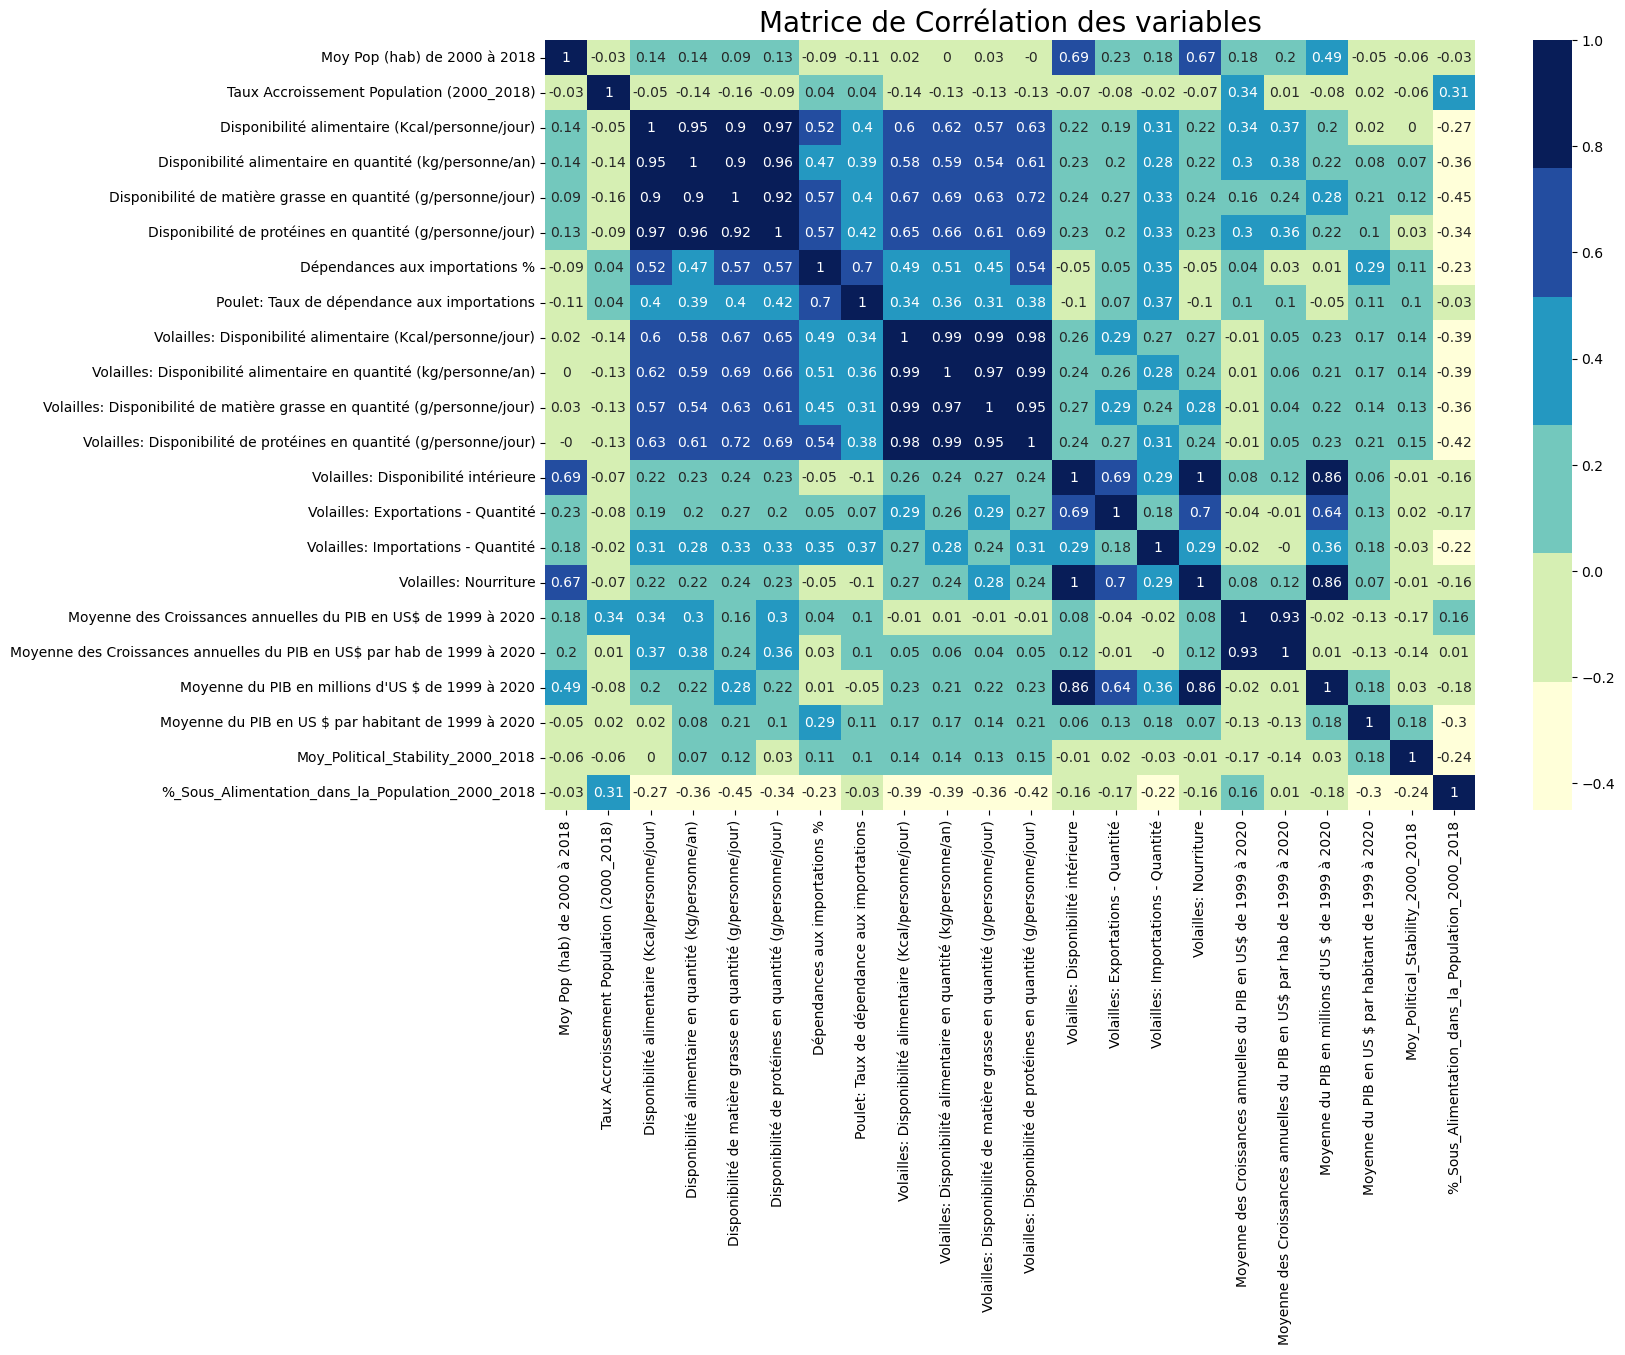

In [182]:
# Chargement des librairies

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# Heatmap

cmap=plt.cm.get_cmap("YlGnBu", 6)

sns.heatmap(MT_Corr, cmap= cmap, annot=True)

# Customisation 

plt.title("Matrice de Corrélation des variables", fontsize = fs)

plt.savefig("P9_Heatmap_correlation.png")

plt.show()

Il y a une grande corrélation entre la plupart des disponibilités alimentaires, et également entre la disponibilité intérieure des volailles avec la moyenne du PIB.

# V) Centrage et réduction des valeurs

Pour une ACP ou un dendrogramme, il est très important de mettre l'ensemble des valeurs à la même échelle avec une moyenne de 0 et un écart type de 1.

In [183]:
# Utilisation de Standard Scaler
X = Mother_Table_Clean_OK

std_scale = sklearn.preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

X_scaled

array([[-2.38388004e-03,  1.28709233e+00, -5.14312787e-02, ...,
        -5.86270098e-01, -5.05144066e+00,  2.09879779e+00],
       [ 1.78250286e-01, -2.95412750e-02,  6.89382873e-01, ...,
        -3.47562475e-01,  7.48614522e-02, -7.73497670e-01],
       [-2.14100416e-01, -1.00385014e+00,  9.98429584e-01, ...,
        -4.38509723e-01,  7.48614522e-02, -5.82643535e-01],
       ...,
       [-5.27653141e-02,  8.92102247e-01, -2.79196574e-03, ...,
        -5.58361128e-01,  7.48614522e-02,  2.66661847e+00],
       [-1.28127894e-01,  9.71100263e-01, -4.32000104e-02, ...,
        -5.52104803e-01,  7.48614522e-02,  3.92435908e+00],
       [-1.33745016e-01, -2.13869979e-01,  7.57792321e-02, ...,
        -5.56962097e-01, -1.96732394e+00, -1.24519896e-02]])

In [184]:
X_scaled.shape

(238, 22)

In [185]:
# En présence d'outliers, Robust scaler est plus performant que Standard scaler car moins dépendant de ceux-ci.
# Exemple Robust scaler : Xnew = (X - la médiane)/ l'écart interquartile Q1-Q3

X = Mother_Table_Clean_OK

robust_scaler = sklearn.preprocessing.RobustScaler().fit(X)
X_scaled_2 = robust_scaler.transform(X)

X_scaled_2

array([[ 1.34023184,  1.39877301, -0.20029335, ..., -0.2649642 ,
        -2.46      ,  2.55707107],
       [ 2.57369533,  0.17177914,  0.12239244, ...,  0.09780088,
         0.        , -0.92175162],
       [-0.10547816, -0.73619632,  0.25700782, ..., -0.04041207,
         0.        , -0.69059584],
       ...,
       [ 0.99620135,  1.03067485, -0.17910691, ..., -0.22255081,
         0.        ,  3.24479541],
       [ 0.48158668,  1.10429448, -0.19670795, ..., -0.21304304,
         0.        ,  4.76812635],
       [ 0.44323007,  0.        , -0.14488266, ..., -0.22042469,
        -0.98      ,  0.        ]])

In [186]:
X_scaled_2.shape

(238, 22)

In [187]:
# MinMax Scaler est équivalent et va me permettre d'avoir un autre point de vue dans cette étude
# Exemple MinMax Scaler : Xnew = (X - Xmin)/ (Xmax-Xmin)

X = Mother_Table_Clean_OK

MinMax = sklearn.preprocessing.MinMaxScaler().fit(X)
X_scaled_3 = MinMax.transform(X)

X_scaled_3

array([[0.02119662, 0.25575448, 0.52970822, ..., 0.0027143 , 0.        ,
        0.58173719],
       [0.03740418, 0.12787724, 0.79230769, ..., 0.03701166, 0.63402062,
        0.04209354],
       [0.00220017, 0.03324808, 0.90185676, ..., 0.02394442, 0.63402062,
        0.077951  ],
       ...,
       [0.01667611, 0.2173913 , 0.5469496 , ..., 0.00672424, 0.63402062,
        0.68841871],
       [0.00991413, 0.22506394, 0.53262599, ..., 0.00762314, 0.63402062,
        0.9247216 ],
       [0.00941013, 0.10997442, 0.57480106, ..., 0.00692525, 0.3814433 ,
        0.18507795]])

In [188]:
X_scaled_3.shape

(238, 22)

# VI) Méthode de classification hiérarchique

In [189]:
#Copie de Mother_Table_Clean_Graphique
data_mother_clean_graphique= Mother_Table_Clean_Graphique.copy()

In [190]:
Mother_Table_Clean_Graphique

Pays  Moy Pop (hab) de 2000 à 2018  \
0                               Afghanistan                   28845766.58   
2                            Afrique du Sud                   50901472.26   
4                                   Albanie                    2994856.32   
6                                   Algérie                   35858473.63   
8                                 Allemagne                   81527014.00   
..                                      ...                           ...   
400  Venezuela (République bolivarienne du)                   27706314.79   
402                                Viet Nam                   87385724.05   
404                                   Yémen                   22694117.05   
406                                  Zambie                   13492231.74   
408                                Zimbabwe                   12806372.53   

     Taux Accroissement Population (2000_2018)  \
0                                         0.79   
2                                         0.29   
4                                        -0.08   
6                                         0.36   
8                                         0.02   
..                                         ...   
400                                       0.19   
402                                       0.20   
404                                       0.64   
406                                       0.67   
408                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
..                                              ...   
400                                          2247.0   
402                                          2938.0   
404                                          2062.0   
406                                          2008.0   
408                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
..                                                 ...        
400                                             534.05        
402                                             713.46        
404                                             302.47        
406                                             355.99        
408                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
..                                                 ...               
400                                              64.85               
402                                              78.45               
404                                              38.98               
406                                              44.67               
408                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50     

# a) Méthode

In [191]:
Mother_Table_Clean_OK

Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
0                     28845766.58                                       0.79   
2                     50901472.26                                       0.29   
4                      2994856.32                                      -0.08   
6                     35858473.63                                       0.36   
8                     81527014.00                                       0.02   
..                            ...                                        ...   
400                   27706314.79                                       0.19   
402                   87385724.05                                       0.20   
404                   22694117.05                                       0.64   
406                   13492231.74                                       0.67   
408                   12806372.53                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
..                                              ...   
400                                          2247.0   
402                                          2938.0   
404                                          2062.0   
406                                          2008.0   
408                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
..                                                 ...        
400                                             534.05        
402                                             713.46        
404                                             302.47        
406                                             355.99        
408                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
..                                                 ...               
400                                              64.85               
402                                              78.45               
404                                              38.98               
406                                              44.67               
408                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50          
6                                                92.85          
8                                               104.07          
..                                                 ...          
400                                              56.30          
402                                              90.03          
404                                              53.24          
406                                              59.06          
408                                              51.20          

    

In [192]:
# Clustering hiérarchique avec StandardScaler

Z = linkage(X_scaled, 'ward')

In [193]:
# Clustering hiérarchique avec RobustScaler

Z2 = linkage(X_scaled_2, 'ward')

In [194]:
# Clustering hiérarchique avec MinMax Scaler

Z3 = linkage(X_scaled_3, 'ward')

#  b) Dendrogramme

In [197]:
def plot_dendrogram(Z, names):
    plt.figure(figsize=(25,10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "top",
    )
    plt.show()

### Standard Scaler

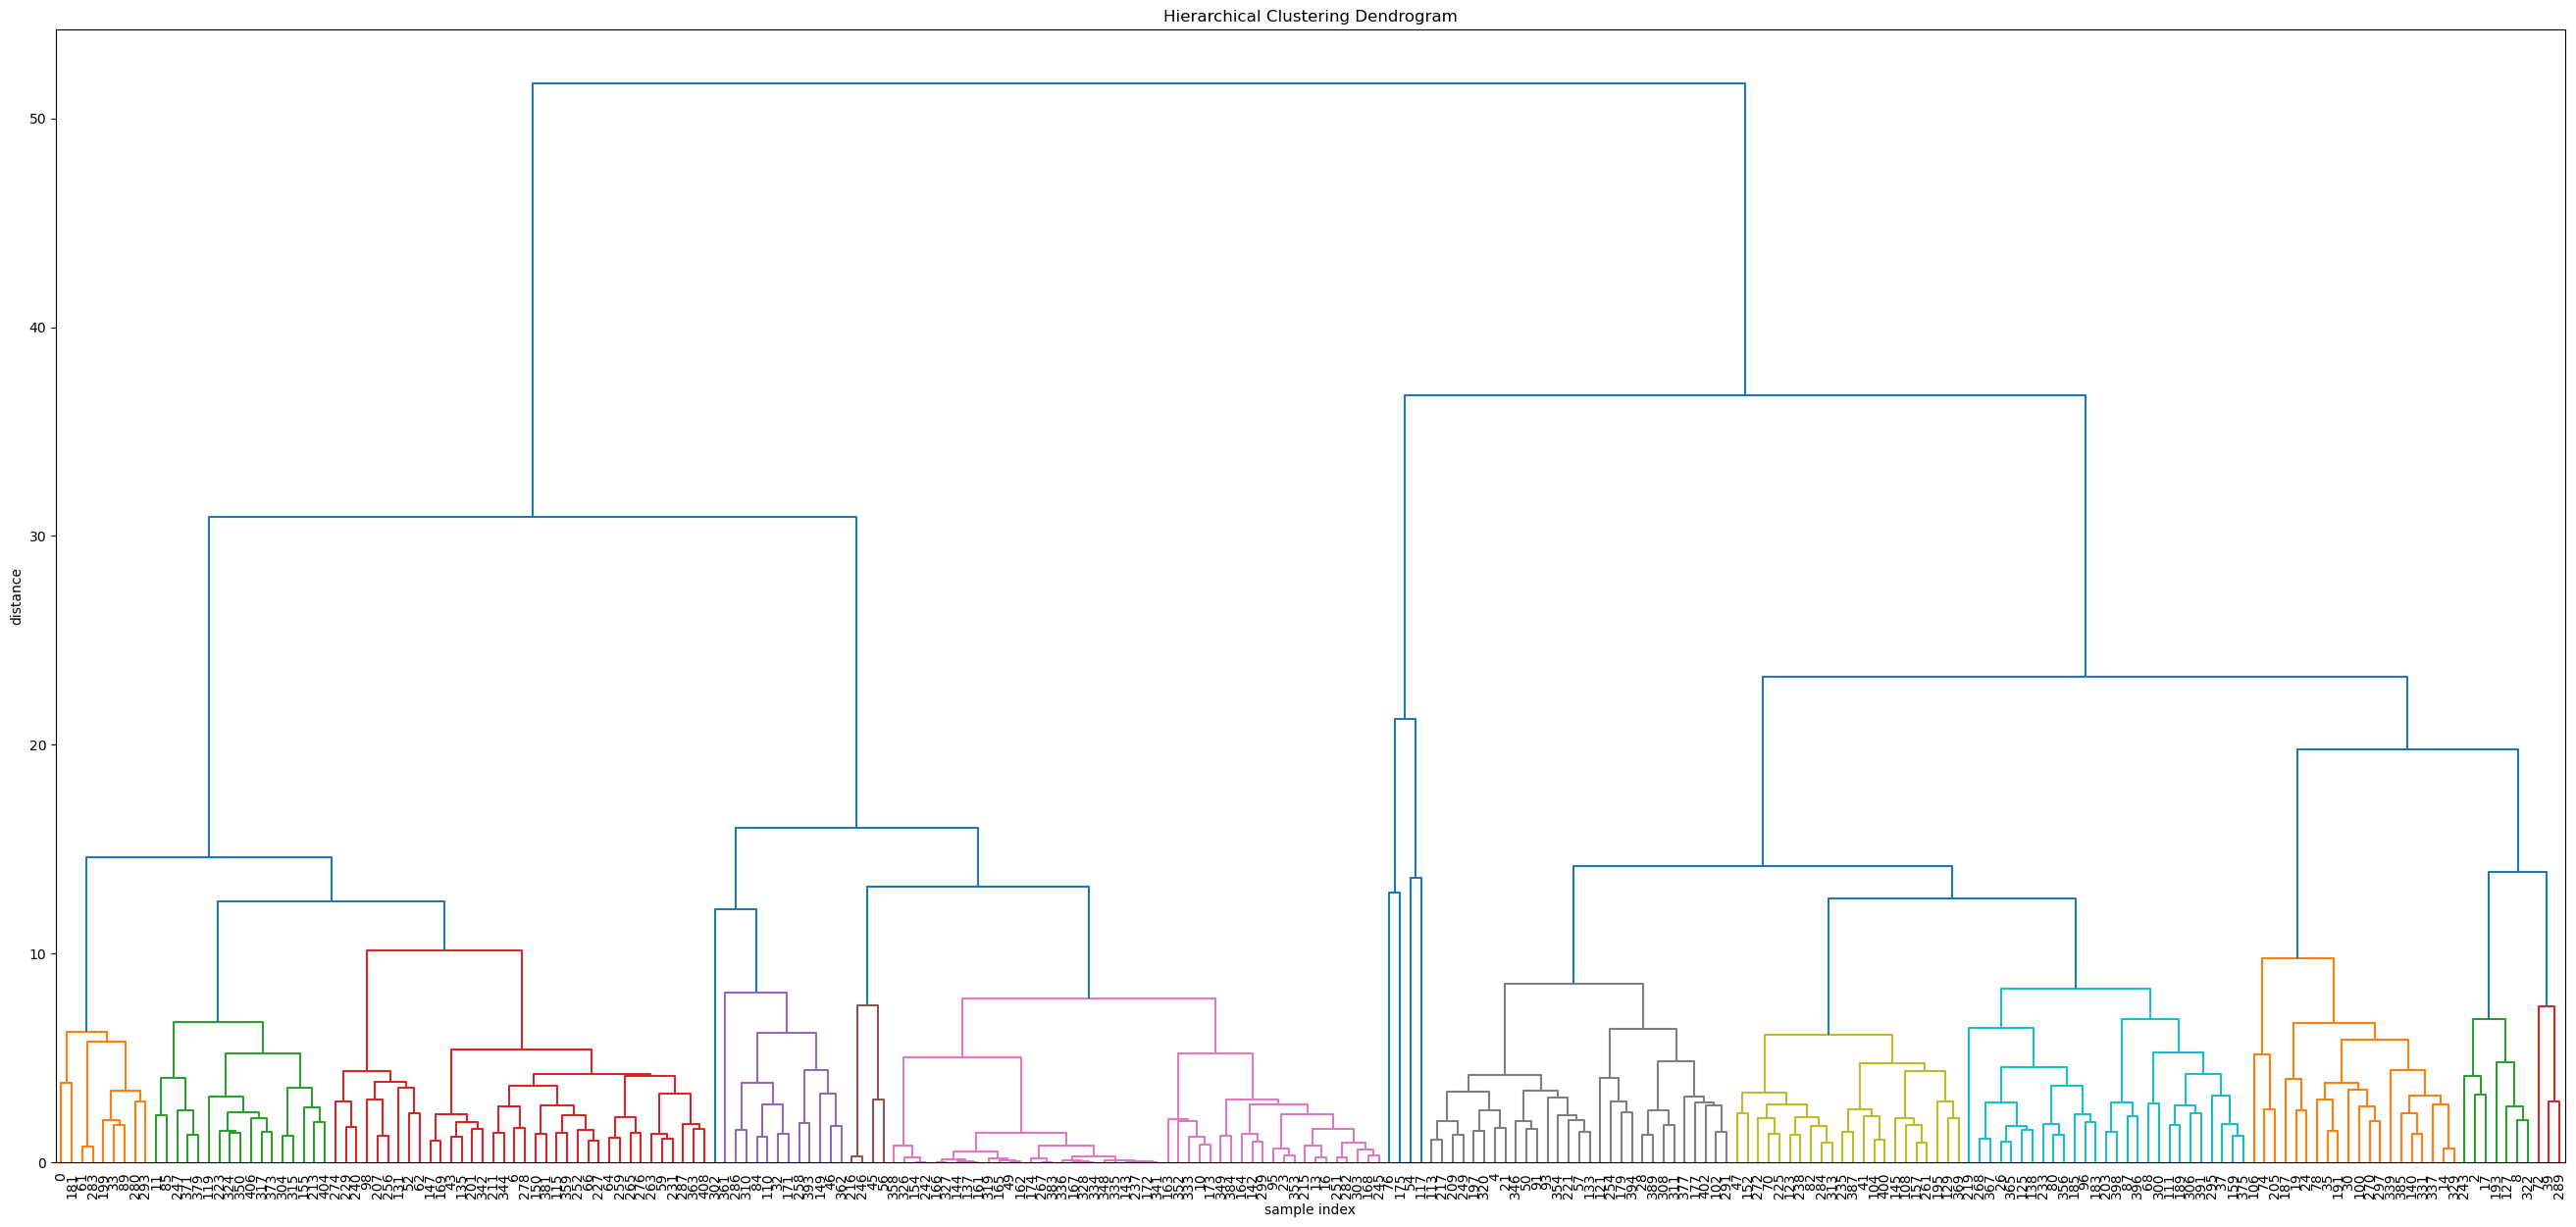

In [198]:
# calculate full dendrogram
plt.figure(figsize=(33, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, labels = data_mother_clean_graphique.index, leaf_rotation=90.,leaf_font_size=10, color_threshold=12,)
plt.show()

Nous voyons assez distinctement trois groupes différents avec Standard Scaler.

### Robust Scaler

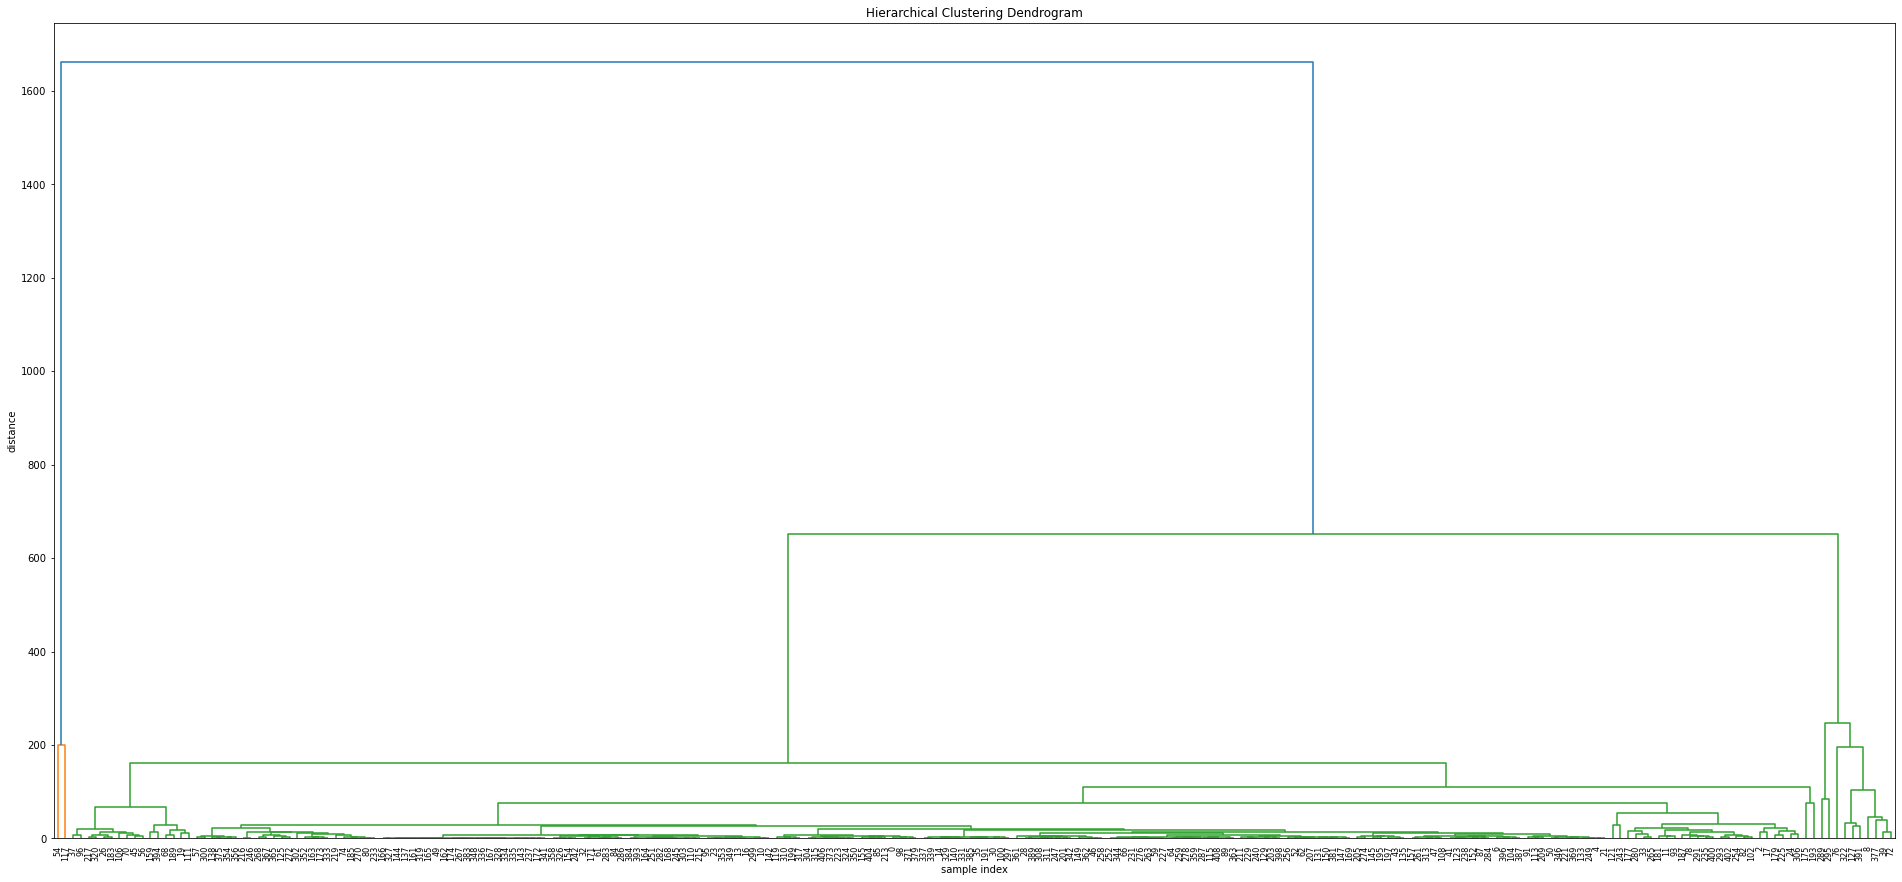

In [638]:
# calculate full dendrogram
plt.figure(figsize=(33, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z2,
    leaf_rotation=90.,
    leaf_font_size=8., labels = data_mother_clean_graphique.index
)
plt.show()

Nous voyons deux groupes différents avec Robust Scaler.

### MinMax Scaler

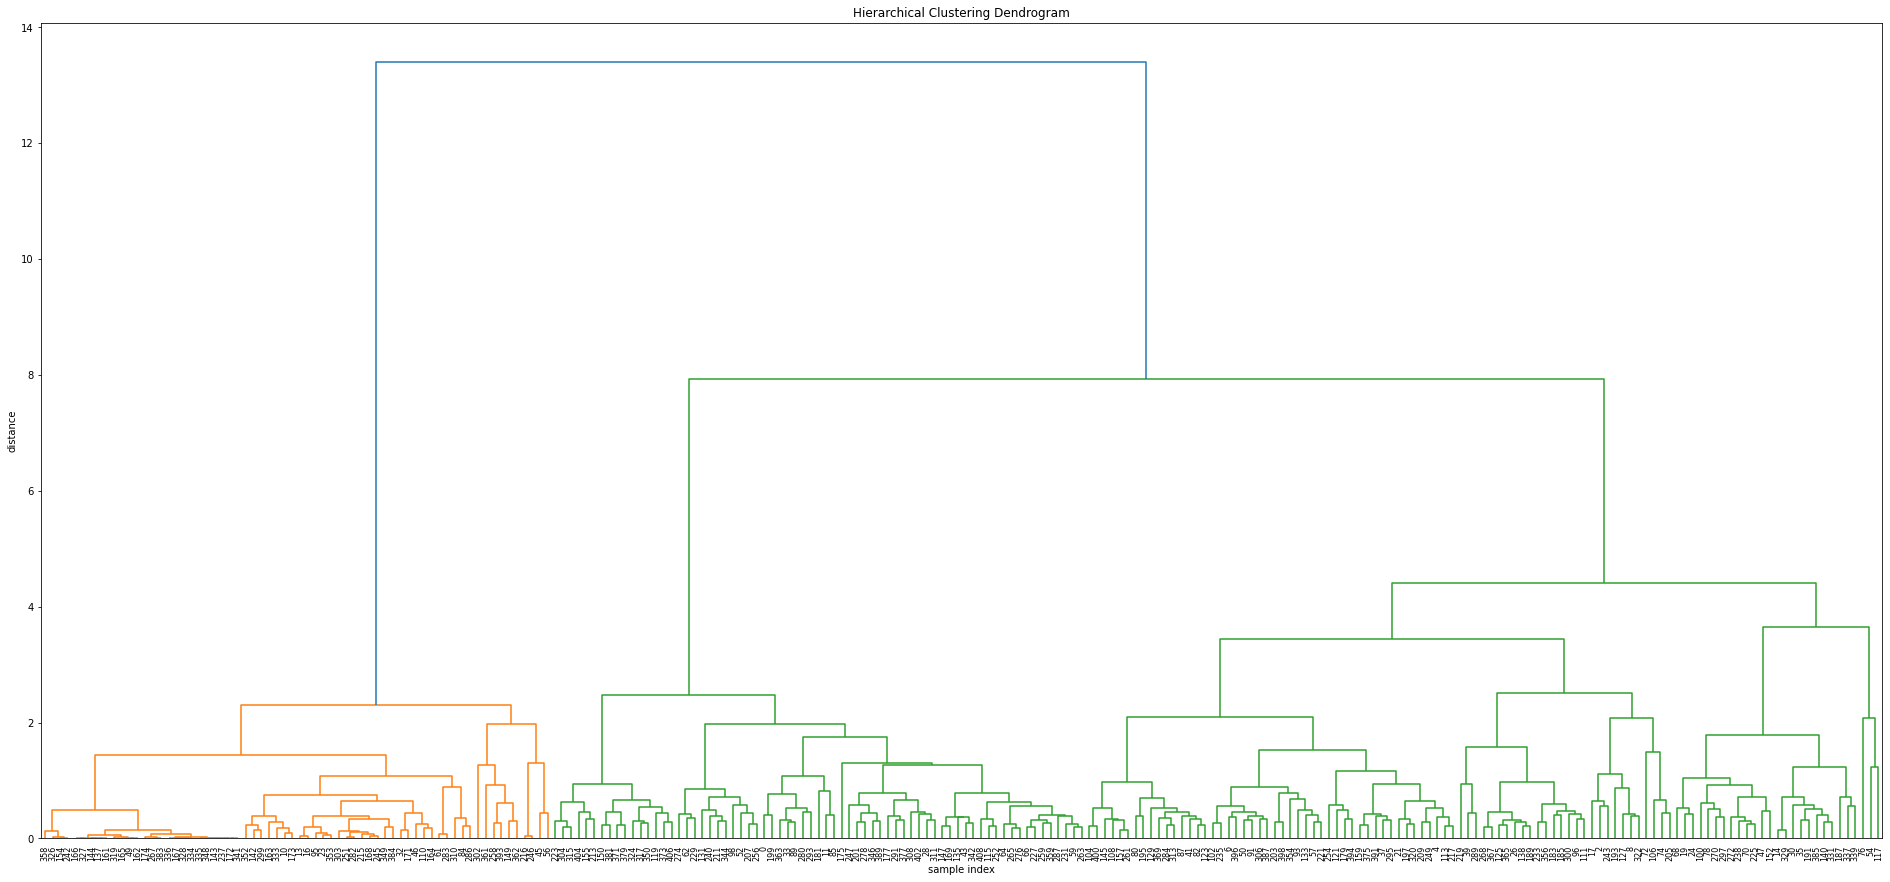

In [639]:
# calculate full dendrogram
plt.figure(figsize=(33, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z3,
    leaf_rotation=90.,
    leaf_font_size=8., labels = data_mother_clean_graphique.index
)
plt.show()

Nous voyons deux grands groupes différents avec MinMax Scaler, avec une légère différence d'homogénéïté.

# VII) Méthode supervisée de classification: k-Means

### a) Cherchons le nombre de clusters idéal avec la méthode des coudes

### Robust Scaler

In [640]:
import os
os.environ["OMP_NUM_THREADS"] = '1' # export OMP_NUM_THREADS=1

# Faire la courbe de l'intertie pour déterminer le nombre optimal de centroïd

# Modèle Kmeans Robust Scaler

X = X_scaled_2

inertia = []

K_range = range(1,20)

for i in K_range:
    model = KMeans(n_clusters = i,init='k-means++',n_init=20).fit(X)
    inertia.append(round(model.inertia_,2))

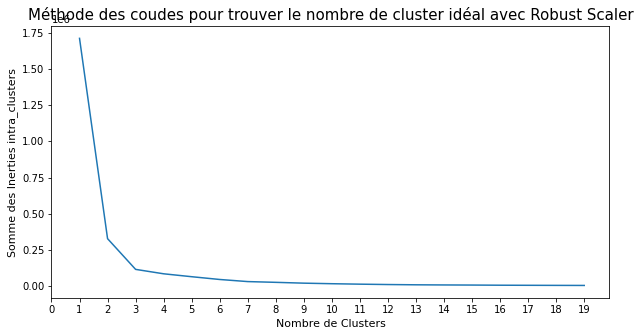

In [641]:
fs = 15

plt.figure(figsize=(fs-5,fs-10))

plt.plot(K_range,inertia)

# Pour customiser le graphiqe

plt.xlabel('Nombre de Clusters', fontsize= fs-4)
plt.ylabel('Somme des Inerties intra_clusters', fontsize= fs-4)

plt.xticks(np.arange(20))

plt.title("Méthode des coudes pour trouver le nombre de cluster idéal avec Robust Scaler", fontsize = fs)

plt.show()

Avec la méthode des coudes, il apparaît clairement qu'au niveau de 4, il y ait la zone des coudes.
La lecture du dendogramme permettrait de prioriser le choix de 2, mais avec la méthode des coudes, je privilégierais 3.

In [642]:
n_cluster_ideal_robust_scaler = 3

In [643]:
# Modèle Kmeans Robust Scaler

X = X_scaled_2

model = KMeans(n_clusters = n_cluster_ideal_robust_scaler)

model.fit(X)
prédiction_robust_scaler = model.predict(X)

# Les centroïds

centers_Robust = model.cluster_centers_

In [644]:
# Pour trouver les noms des pays par groupes

M_G_1 = prédiction_robust_scaler == 0

M_G_2 = prédiction_robust_scaler == 1

M_G_3 = prédiction_robust_scaler == 2

In [645]:
#J'ai les 3 groupes

Group_1_Robust_Scaler = Mother_Table_Clean_Graphique[M_G_1]

Group_2_Robust_Scaler = Mother_Table_Clean_Graphique[M_G_2]

Group_3_Robust_Scaler = Mother_Table_Clean_Graphique[M_G_3]

In [646]:
Group_1_Robust_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
0                               Afghanistan                   28845766.58   
2                            Afrique du Sud                   50901472.26   
4                                   Albanie                    2994856.32   
6                                   Algérie                   35858473.63   
10                                  Andorre                      78052.63   
..                                      ...                           ...   
400  Venezuela (République bolivarienne du)                   27706314.79   
402                                Viet Nam                   87385724.05   
404                                   Yémen                   22694117.05   
406                                  Zambie                   13492231.74   
408                                Zimbabwe                   12806372.53   

     Taux Accroissement Population (2000_2018)  \
0                                         0.79   
2                                         0.29   
4                                        -0.08   
6                                         0.36   
10                                        0.18   
..                                         ...   
400                                       0.19   
402                                       0.20   
404                                       0.64   
406                                       0.67   
408                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
10                                              0.0   
..                                              ...   
400                                          2247.0   
402                                          2938.0   
404                                          2062.0   
406                                          2008.0   
408                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
10                                                0.00        
..                                                 ...        
400                                             534.05        
402                                             713.46        
404                                             302.47        
406                                             355.99        
408                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
10                                                0.00               
..                                                 ...               
400                                              64.85               
402                                              78.45               
404                                              38.98               
406                                              44.67               
408                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50     

In [647]:
Group_2_Robust_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
54                  Brésil                  1.932597e+08   
117  États-Unis d'Amérique                  3.055111e+08   

     Taux Accroissement Population (2000_2018)  \
54                                        0.20   
117                                       0.16   

     Disponibilité alimentaire (Kcal/personne/jour)  \
54                                           3250.0   
117                                          3762.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
54                                              770.49        
117                                             990.38        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
54                                               124.6               
117                                              167.0               

     Disponibilité de protéines en quantité (g/personne/jour)  \
54                                               90.87          
117                                             113.61          

     Dépendances aux importations %  \
54                             1.63   
117                            9.94   

     Poulet: Taux de dépendance aux importations  \
54                                          0.03   
117                                         0.67   

     Volailles: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
54                                               204.0          ...   
117                                              219.0          ...   

     Volailles: Disponibilité intérieure  Volailles: Exportations - Quantité  \
54                                9982.0                              4223.0   
117                              18266.0                              3692.0   

     Volailles: Importations - Quantité  Volailles: Nourriture  \
54                                  3.0                 9982.0   
117                               123.0                18100.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020  \
54                                                5.71                
117                                               3.78                

     Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020  \
54                                                4.65                        
117                                               2.93                        

     Moyenne du PIB en millions d'US $ de 1999 à 2020  \
54                                         1563845.83   
117                                       15546826.90   

     Moyenne du PIB en US $ par habitant de 1999 à 2020  \
54                                             7884.12    
117                                           50086.22    

     Moy_Political_Stability_2000_2018  \
54                                 0.0   
117                                0.0   

     %_Sous_Alimentation_dans_la_Population_2000_2018  
54                                               4.72  
117                                              2.50  

[2 rows x 23 columns]

In [648]:
Group_3_Robust_Scaler

Pays  \
8                                            Allemagne   
39                                            Belgique   
72                            Chine - RAS de Hong-Kong   
76                                 Chine, continentale   
127                                             France   
289                                           Pays-Bas   
295                                            Pologne   
322  Royaume-Uni de Grande-Bretagne et d'Irlande du...   
377                                          Thaïlande   
391                                            Turquie   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population (2000_2018)  \
8                    8.152701e+07                                       0.02   
39                   1.085922e+07                                       0.12   
72                   6.947953e+06                                       0.12   
76                   1.360829e+09                                       0.11   
127                  6.237418e+07                                       0.10   
289                  1.657899e+07                                       0.07   
295                  3.827329e+07                                      -0.02   
322                  6.277829e+07                                       0.14   
377                  6.665113e+07                                       0.10   
391                  7.205527e+07                                       0.30   

     Disponibilité alimentaire (Kcal/personne/jour)  \
8                                            3559.0   
39                                           3770.0   
72                                           3353.0   
76                                           3197.0   
127                                          3556.0   
289                                          3251.0   
295                                          3526.0   
322                                          3428.0   
377                                          2826.0   
391                                          3538.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
8                                               943.24        
39                                             1015.74        
72                                              776.03        
76                                              968.52        
127                                             943.52        
289                                             945.03        
295                                             914.39        
322                                             903.96        
377                                             554.59        
391                                             939.16        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
8                                               147.96               
39                                              155.65               
72                                              133.74               
76                                               96.89               
127                                             157.71               
289                                             129.25               
295                                             128.73               
322                                             140.77               
377                                              64.18               
391                                             126.01               

     Disponibilité de protéines en quantité (g/personne/jour)  \
8                                               104.07          
39                                              101.35          
72                                              137.88          
76                                              101.44          
127                                             112.08          
289                                             104.43          
295 



### Standard Scaler

In [649]:
# Pour essayer d'enlever l'erreur 

import os
os.environ["OMP_NUM_THREADS"] = '1' # export OMP_NUM_THREADS=1


# Faire la courbe de l'intertie pour déterminer le nombre optimal de centroïd

# Modèle Kmeans Standard Scaler Scaler

X = X_scaled

inertia = []

K_range = range(1,20)

for i in K_range:
    model = KMeans(n_clusters = i).fit(X)
    inertia.append(round(model.inertia_,2))

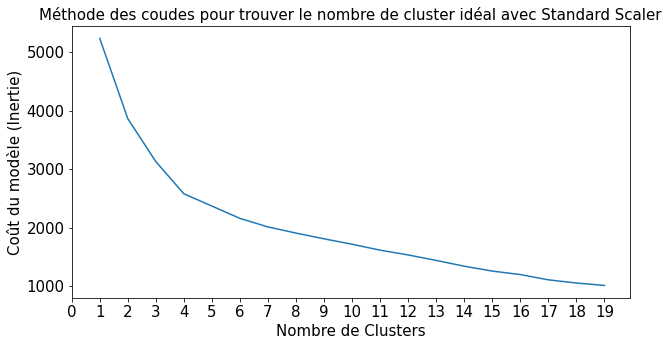

In [650]:
# Taille de la figure

fs = 15

plt.figure(figsize=(fs-5,fs-10))

plt.plot(K_range,inertia)

# Pour customiser le graphiqe

plt.xlabel('Nombre de Clusters', fontsize = fs)
plt.ylabel('Coût du modèle (Inertie)', fontsize = fs)

plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

plt.xticks(np.arange(20))

plt.title("Méthode des coudes pour trouver le nombre de cluster idéal avec Standard Scaler", fontsize = fs)

plt.show()

In [651]:
inertia

[5236.0,
 3863.93,
 3130.65,
 2580.21,
 2370.49,
 2160.06,
 2013.63,
 1909.03,
 1810.79,
 1718.35,
 1616.99,
 1535.23,
 1441.84,
 1342.87,
 1259.72,
 1200.31,
 1109.89,
 1055.68,
 1014.28]

Le nombre de clusters idéal est de 3 à 6 avec la méthode des coudes. La décision est plutôt difficile ici malgré que le dendogramme nous permettrait de choisir 3.

In [652]:
n_cluster_ideal_standard_scaler = 3

In [653]:
# Modèle Kmeans Standard Scaler

X = X_scaled

model = KMeans(n_clusters = n_cluster_ideal_standard_scaler)

model.fit(X)
prédiction_Standard_scaler = model.predict(X)

# Les centroïds

centers_standard = model.cluster_centers_

In [654]:
# Pour trouver les noms des pays par groupes

M_G_1 = prédiction_Standard_scaler == 0

M_G_2 = prédiction_Standard_scaler == 1

M_G_3 = prédiction_Standard_scaler == 2

In [655]:
#J'ai les 3 groupes

Group_1_Standard_Scaler = Mother_Table_Clean_Graphique[M_G_1]

Group_2_Standard_Scaler = Mother_Table_Clean_Graphique[M_G_2]

Group_3_Standard_Scaler = Mother_Table_Clean_Graphique[M_G_3]

In [656]:
Group_1_Standard_Scaler = Mother_Table_Clean_Graphique[M_G_1]

Group_1_Standard_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
2                            Afrique du Sud                   50901472.26   
4                                   Albanie                    2994856.32   
6                                   Algérie                   35858473.63   
8                                 Allemagne                   81527014.00   
14                       Antigua-et-Barbuda                      86477.37   
..                                      ...                           ...   
394                                 Ukraine                   46191965.63   
396                                 Uruguay                    3363387.89   
398                                 Vanuatu                     233989.89   
400  Venezuela (République bolivarienne du)                   27706314.79   
402                                Viet Nam                   87385724.05   

     Taux Accroissement Population (2000_2018)  \
2                                         0.29   
4                                        -0.08   
6                                         0.36   
8                                         0.02   
14                                        0.27   
..                                         ...   
394                                      -0.09   
396                                       0.04   
398                                       0.58   
400                                       0.19   
402                                       0.20   

     Disponibilité alimentaire (Kcal/personne/jour)  \
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
14                                           2429.0   
..                                              ...   
394                                          3033.0   
396                                          3151.0   
398                                          2623.0   
400                                          2247.0   
402                                          2938.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
14                                              632.98        
..                                                 ...        
394                                             855.42        
396                                             761.74        
398                                             655.88        
400                                             534.05        
402                                             713.46        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
14                                               88.72               
..                                                 ...               
394                                              79.42               
396                                             109.56               
398                                              98.26               
400                                              64.85               
402                                              78.45               

     Disponibilité de protéines en quantité (g/personne/jour)  \
2                                                83.36          
4                                               119.50          
6                                                92.85     

In [657]:
Group_2_Standard_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
0                    Afghanistan                   28845766.58   
10                       Andorre                      78052.63   
11                        Angola                   22917624.68   
13                      Anguilla                      13158.26   
16   Antilles néerlandaises (ex)                     243869.68   
..                           ...                           ...   
384                        Tonga                     101470.53   
393                       Tuvalu                      10425.32   
404                        Yémen                   22694117.05   
406                       Zambie                   13492231.74   
408                     Zimbabwe                   12806372.53   

     Taux Accroissement Population (2000_2018)  \
0                                         0.79   
10                                        0.18   
11                                        0.88   
13                                        0.31   
16                                        0.29   
..                                         ...   
384                                       0.05   
393                                       0.23   
404                                       0.64   
406                                       0.67   
408                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
10                                              0.0   
11                                           2266.0   
13                                              0.0   
16                                              0.0   
..                                              ...   
384                                             0.0   
393                                             0.0   
404                                          2062.0   
406                                          2008.0   
408                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
10                                                0.00        
11                                              570.95        
13                                                0.00        
16                                                0.00        
..                                                 ...        
384                                               0.00        
393                                               0.00        
404                                             302.47        
406                                             355.99        
408                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
10                                                0.00               
11                                               48.73               
13                                                0.00               
16                                                0.00               
..                                                 ...               
384                                               0.00               
393                                               0.00               
404                                              38.98               
406                                              44.67               
408                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
10                                                0.00          
11                                               54.09          
13                                                0.00          
16                                                

In [658]:
Group_3_Standard_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
54                  Brésil                  1.932597e+08   
76     Chine, continentale                  1.360829e+09   
117  États-Unis d'Amérique                  3.055111e+08   

     Taux Accroissement Population (2000_2018)  \
54                                        0.20   
76                                        0.11   
117                                       0.16   

     Disponibilité alimentaire (Kcal/personne/jour)  \
54                                           3250.0   
76                                           3197.0   
117                                          3762.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
54                                              770.49        
76                                              968.52        
117                                             990.38        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
54                                              124.60               
76                                               96.89               
117                                             167.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
54                                               90.87          
76                                              101.44          
117                                             113.61          

     Dépendances aux importations %  \
54                             1.63   
76                             8.94   
117                            9.94   

     Poulet: Taux de dépendance aux importations  \
54                                          0.03   
76                                          2.50   
117                                         0.67   

     Volailles: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
54                                               204.0          ...   
76                                                59.0          ...   
117                                              219.0          ...   

     Volailles: Disponibilité intérieure  Volailles: Exportations - Quantité  \
54                                9982.0                              4223.0   
76                               18161.0                               576.0   
117                              18266.0                              3692.0   

     Volailles: Importations - Quantité  Volailles: Nourriture  \
54                                  3.0                 9982.0   
76                                452.0                17518.0   
117                               123.0                18100.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020  \
54                                                5.71                
76                                               13.43                
117                                               3.78                

     Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020  \
54                                                4.65                        
76                                               12.80                        
117                                               2.93                        

     Moyenne du PIB en millions d'US $ de 1999 à 2020  \
54                                         1563845.83   
76                                         6935305.01   
117                                       15546826.90   

     Moyenne du PIB en US $ par habitant de 1999 à 2020  \
54                                             7884.12    
76                                             4963.73    
117                                           50086.22    

     Moy_Political_Stability_2000_2018  \
54                                 0.0   
76                                 0.0   
117                                0.0   

     %_Sous_Alimentation_dans_la_Population_2000_2018  
54                                

### MinMax Scaler

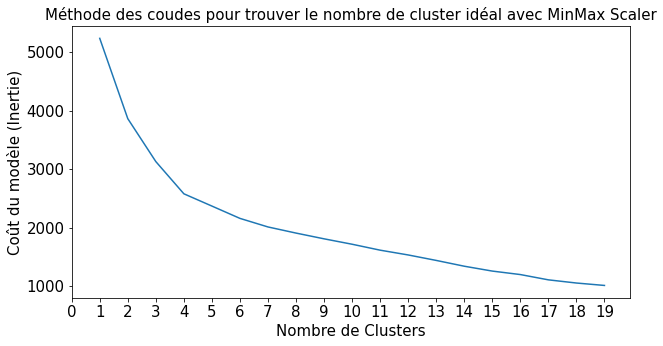

In [659]:
fs = 15

plt.figure(figsize=(fs-5,fs-10))

plt.plot(K_range,inertia)

# Pour customiser le graphique

plt.xlabel('Nombre de Clusters', fontsize = fs)
plt.ylabel('Coût du modèle (Inertie)', fontsize = fs)

plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

plt.xticks(np.arange(20))

plt.title("Méthode des coudes pour trouver le nombre de cluster idéal avec MinMax Scaler", fontsize = fs)

plt.show()

In [660]:
inertia

[5236.0,
 3863.93,
 3130.65,
 2580.21,
 2370.49,
 2160.06,
 2013.63,
 1909.03,
 1810.79,
 1718.35,
 1616.99,
 1535.23,
 1441.84,
 1342.87,
 1259.72,
 1200.31,
 1109.89,
 1055.68,
 1014.28]

Le choix serait entre 3 et 5 selon la méthode des coudes. Tandis que le dendogramme nous préconiserait de choisir 2. Je vais ici aussi choisir 3.

In [661]:
n_cluster_ideal_MinMax_scaler = 3

In [662]:
# Modèle Kmeans Standard Scaler

X = X_scaled

model = KMeans(n_clusters = n_cluster_ideal_MinMax_scaler)

model.fit(X)
prédiction_MinMax_scaler = model.predict(X)

# Les centroïds

centers_standard = model.cluster_centers_

In [663]:
# Pour trouver les noms des pays par groupes

M_G_1 = prédiction_MinMax_scaler == 0

M_G_2 = prédiction_MinMax_scaler == 1

M_G_3 = prédiction_MinMax_scaler == 2

In [664]:
#J'ai les 3 groupes

Group_1_MinMax_Scaler = Mother_Table_Clean_Graphique[M_G_1]

Group_2_MinMax_Scaler = Mother_Table_Clean_Graphique[M_G_2]

Group_3_MinMax_Scaler = Mother_Table_Clean_Graphique[M_G_3]

In [665]:
Group_1_MinMax_Scaler = Mother_Table_Clean_Graphique[M_G_1]

Group_1_MinMax_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
0                    Afghanistan                   28845766.58   
10                       Andorre                      78052.63   
11                        Angola                   22917624.68   
13                      Anguilla                      13158.26   
16   Antilles néerlandaises (ex)                     243869.68   
..                           ...                           ...   
384                        Tonga                     101470.53   
393                       Tuvalu                      10425.32   
404                        Yémen                   22694117.05   
406                       Zambie                   13492231.74   
408                     Zimbabwe                   12806372.53   

     Taux Accroissement Population (2000_2018)  \
0                                         0.79   
10                                        0.18   
11                                        0.88   
13                                        0.31   
16                                        0.29   
..                                         ...   
384                                       0.05   
393                                       0.23   
404                                       0.64   
406                                       0.67   
408                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
10                                              0.0   
11                                           2266.0   
13                                              0.0   
16                                              0.0   
..                                              ...   
384                                             0.0   
393                                             0.0   
404                                          2062.0   
406                                          2008.0   
408                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
10                                                0.00        
11                                              570.95        
13                                                0.00        
16                                                0.00        
..                                                 ...        
384                                               0.00        
393                                               0.00        
404                                             302.47        
406                                             355.99        
408                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
10                                                0.00               
11                                               48.73               
13                                                0.00               
16                                                0.00               
..                                                 ...               
384                                               0.00               
393                                               0.00               
404                                              38.98               
406                                              44.67               
408                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
10                                                0.00          
11                                               54.09          
13                                                0.00          
16                                                

In [666]:
Group_2_MinMax_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
2                            Afrique du Sud                   50901472.26   
4                                   Albanie                    2994856.32   
6                                   Algérie                   35858473.63   
8                                 Allemagne                   81527014.00   
14                       Antigua-et-Barbuda                      86477.37   
..                                      ...                           ...   
394                                 Ukraine                   46191965.63   
396                                 Uruguay                    3363387.89   
398                                 Vanuatu                     233989.89   
400  Venezuela (République bolivarienne du)                   27706314.79   
402                                Viet Nam                   87385724.05   

     Taux Accroissement Population (2000_2018)  \
2                                         0.29   
4                                        -0.08   
6                                         0.36   
8                                         0.02   
14                                        0.27   
..                                         ...   
394                                      -0.09   
396                                       0.04   
398                                       0.58   
400                                       0.19   
402                                       0.20   

     Disponibilité alimentaire (Kcal/personne/jour)  \
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
14                                           2429.0   
..                                              ...   
394                                          3033.0   
396                                          3151.0   
398                                          2623.0   
400                                          2247.0   
402                                          2938.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
14                                              632.98        
..                                                 ...        
394                                             855.42        
396                                             761.74        
398                                             655.88        
400                                             534.05        
402                                             713.46        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
14                                               88.72               
..                                                 ...               
394                                              79.42               
396                                             109.56               
398                                              98.26               
400                                              64.85               
402                                              78.45               

     Disponibilité de protéines en quantité (g/personne/jour)  \
2                                                83.36          
4                                               119.50          
6                                                92.85     

In [667]:
Group_3_MinMax_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
54                  Brésil                  1.932597e+08   
76     Chine, continentale                  1.360829e+09   
117  États-Unis d'Amérique                  3.055111e+08   

     Taux Accroissement Population (2000_2018)  \
54                                        0.20   
76                                        0.11   
117                                       0.16   

     Disponibilité alimentaire (Kcal/personne/jour)  \
54                                           3250.0   
76                                           3197.0   
117                                          3762.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
54                                              770.49        
76                                              968.52        
117                                             990.38        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
54                                              124.60               
76                                               96.89               
117                                             167.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
54                                               90.87          
76                                              101.44          
117                                             113.61          

     Dépendances aux importations %  \
54                             1.63   
76                             8.94   
117                            9.94   

     Poulet: Taux de dépendance aux importations  \
54                                          0.03   
76                                          2.50   
117                                         0.67   

     Volailles: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
54                                               204.0          ...   
76                                                59.0          ...   
117                                              219.0          ...   

     Volailles: Disponibilité intérieure  Volailles: Exportations - Quantité  \
54                                9982.0                              4223.0   
76                               18161.0                               576.0   
117                              18266.0                              3692.0   

     Volailles: Importations - Quantité  Volailles: Nourriture  \
54                                  3.0                 9982.0   
76                                452.0                17518.0   
117                               123.0                18100.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020  \
54                                                5.71                
76                                               13.43                
117                                               3.78                

     Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020  \
54                                                4.65                        
76                                               12.80                        
117                                               2.93                        

     Moyenne du PIB en millions d'US $ de 1999 à 2020  \
54                                         1563845.83   
76                                         6935305.01   
117                                       15546826.90   

     Moyenne du PIB en US $ par habitant de 1999 à 2020  \
54                                             7884.12    
76                                             4963.73    
117                                           50086.22    

     Moy_Political_Stability_2000_2018  \
54                                 0.0   
76                                 0.0   
117                                0.0   

     %_Sous_Alimentation_dans_la_Population_2000_2018  
54                                

Le nombre de clusters à choisir n'est pas forcément évident à identifier avec Kmeans et la méthode des coudes bien que la composition des sous-groupes est facilement identifiable.

Le dendrogramme permet d'identifier facilement le nombre de groupes mais ne donne pas la composition de celui-ci.



Standard Scaler : Identification de 3 clusters avec la méthode des coudes et le dendrogramme.

Robust Scaler : Identification de 3 clusters avec une hésitation entre 2 et 3.

MinMax Scaler : Identification de 3 groupes avec une hésitation entre 3 et 5.

# VIII) ACP

## a) ACP et Visualisation du premier plan

In [668]:
# Choix du nombre de composantes à calculer

n_comp = 3

model = PCA(n_components = n_comp)

pca_1 = model.fit_transform(X_scaled)

pca_1

array([[-1.92659711e+00,  1.47098897e-01,  3.71316705e+00],
       [ 2.97634819e+00,  4.98428986e-01, -1.10368231e+00],
       [ 2.38581156e+00, -1.19198960e+00,  1.49517427e+00],
       [ 2.33495946e-01, -3.01576878e-01,  8.58791757e-01],
       [ 3.93322465e+00,  1.82763948e+00, -1.17611259e+00],
       [-3.33928215e+00,  6.00218356e-01, -1.44055927e+00],
       [-5.28754418e-01, -1.25262589e-01,  3.13761787e+00],
       [-3.43226570e+00,  5.98951443e-01, -1.24228566e+00],
       [ 4.24066087e+00, -2.39223939e+00, -2.27316498e+00],
       [-3.45206619e+00,  5.99959261e-01, -1.41998900e+00],
       [ 4.24318837e+00, -5.81012473e-01, -4.54279425e-01],
       [ 3.60549347e+00,  1.83609309e-01, -1.36660041e+00],
       [ 1.42404107e+00, -9.25645939e-01,  2.15362358e+00],
       [-3.45001228e+00,  5.99141047e-01, -1.81725294e+00],
       [ 4.47106756e+00, -4.02309224e-01, -1.02044818e+00],
       [ 2.53524495e+00, -1.09002921e+00, -4.97663680e-01],
       [ 7.23553338e-01, -4.40755801e-01

In [669]:
# choix du nombre de composantes à calculer

n_comp = 3

model = PCA(n_components = n_comp)

pca_2 = model.fit_transform(X_scaled_2)

pca_2

array([[-1.64165842e+01, -1.45276564e+00,  7.78098985e-01],
       [-1.37137119e+00,  8.43662653e+00,  3.21135869e+00],
       [-1.64293280e+01, -1.96138070e+00, -3.77233285e-01],
       [-1.60918299e+01,  5.35216372e-01,  5.30022371e-01],
       [ 1.23274833e+02,  1.28818509e+01, -1.67221363e+01],
       [-1.64954988e+01, -2.37518272e+00, -5.88185946e-01],
       [-1.61061023e+01,  4.79532507e-01,  5.40971980e-02],
       [-1.65020566e+01, -2.40538515e+00, -4.97593652e-01],
       [-1.64653213e+01, -2.34679589e+00, -6.53637162e-01],
       [-1.64981006e+01, -2.37877906e+00, -5.17753107e-01],
       [-1.25726262e+01,  9.14960609e+00, -1.68312933e+00],
       [ 2.84903734e+01,  2.91607459e+00,  3.52133986e+00],
       [-1.64368553e+01, -1.98474605e+00, -3.01451360e-01],
       [-1.64978609e+01, -2.38820268e+00, -5.58522137e-01],
       [-5.56282458e+00,  1.00323074e+01, -4.69728892e+00],
       [ 3.37329867e-01, -8.95193266e-01, -2.60449956e+00],
       [-1.63398379e+01, -1.29935500e+00

In [670]:
# choix du nombre de composantes à calculer

n_comp = 3

model = PCA(n_components = n_comp)

pca_3 = model.fit_transform(X_scaled_3)

pca_3

array([[-3.69180901e-01, -4.32392884e-01, -3.56223477e-01],
       [ 6.19091069e-01,  3.79737358e-01, -1.00657547e-01],
       [ 7.95103736e-01, -3.55588184e-01, -1.53406163e-02],
       [ 2.66598537e-01, -4.16705987e-01,  1.80868045e-01],
       [ 8.13591261e-01, -1.41220944e-01,  4.59557586e-01],
       [-9.73249542e-01,  2.03817187e-01,  1.08392596e-01],
       [-9.66797656e-02, -3.39857752e-01, -3.75151815e-01],
       [-9.78529793e-01,  1.93168920e-01,  7.41701620e-02],
       [ 9.37105876e-01,  9.12563705e-01, -1.98604647e-01],
       [-9.81052951e-01,  2.05917823e-01,  9.35466011e-02],
       [ 8.60464642e-01,  3.85248491e-01,  1.89737908e-02],
       [ 9.29057499e-01,  4.52839152e-01, -2.19604849e-01],
       [ 4.88786832e-01, -4.06901784e-01, -8.30001636e-02],
       [-9.83501360e-01,  2.32205684e-01,  1.40344531e-01],
       [ 1.15317607e+00,  4.27916381e-01, -1.61123537e-01],
       [ 8.05795297e-01, -2.35399254e-01,  4.29496485e-01],
       [ 2.94412082e-01, -4.32216321e-01

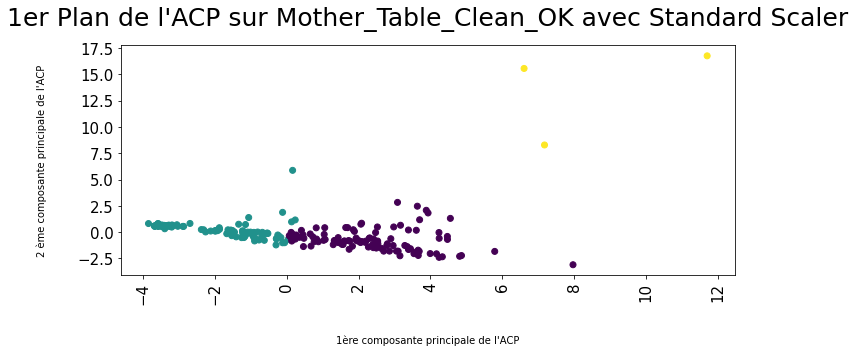

In [671]:
#Taille de la figure

fs = 15

plt.figure(figsize=(fs-5,fs-10))


# Courbe

plt.scatter(pca_1[:,0], pca_1[:,1], c= prédiction_Standard_scaler)
    
# Customisation du graphique

plt.ylabel("2 ème composante principale de l'ACP", fontsize = fs-5, labelpad= 30)
plt.xlabel("1ère composante principale de l'ACP", fontsize = fs-5, labelpad= 30 )
plt.title("1er Plan de l'ACP sur Mother_Table_Clean_OK avec Standard Scaler", fontsize = fs+10, pad= 20)

# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

plt.show()

On remarque quelques outliers qui restent anecdotiques, mais surtout un étalement assez horizontal de la représentation graphique.

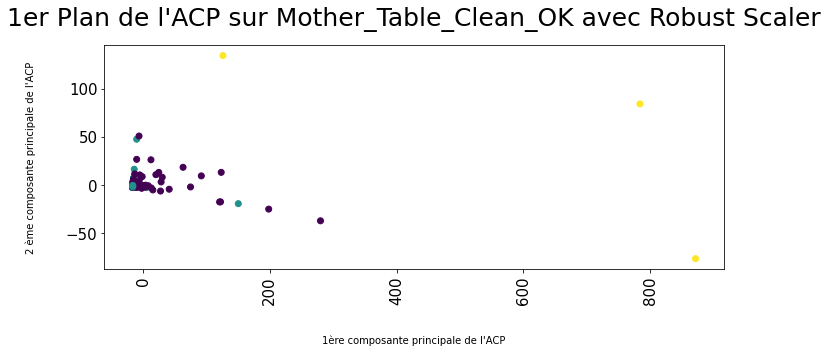

In [672]:
#Taille de la figure

fs = 15

plt.figure(figsize=(fs-5,fs-10))


# Courbe

plt.scatter(pca_2[:,0], pca_2[:,1], c= prédiction_Standard_scaler)
    
# Customisation du graphique

plt.ylabel("2 ème composante principale de l'ACP", fontsize = fs-5, labelpad= 30)
plt.xlabel("1ère composante principale de l'ACP", fontsize = fs-5, labelpad= 30 )
plt.title("1er Plan de l'ACP sur Mother_Table_Clean_OK avec Robust Scaler", fontsize = fs+10, pad= 20)

# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

plt.show()

On remarque une grosse différence avec Standard Scaler ici. 
Robust Scaler écarte de manière très visible les outliers.

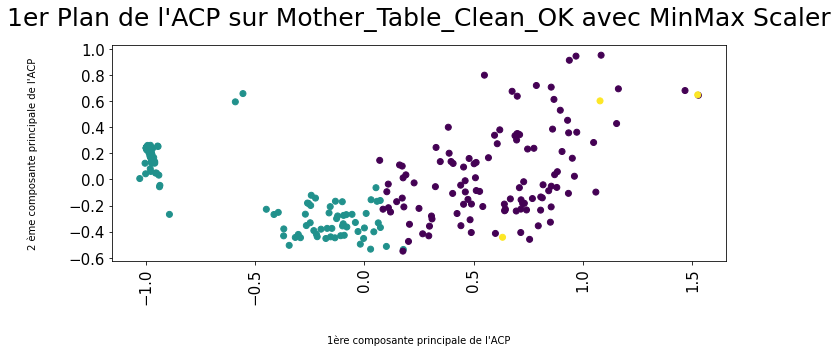

In [673]:
#Taille de la figure

fs = 15

plt.figure(figsize=(fs-5,fs-10))


# Courbe

plt.scatter(pca_3[:,0], pca_3[:,1], c= prédiction_Standard_scaler)
    
# Customisation du graphique

plt.ylabel("2 ème composante principale de l'ACP", fontsize = fs-5, labelpad= 30)
plt.xlabel("1ère composante principale de l'ACP", fontsize = fs-5, labelpad= 30 )
plt.title("1er Plan de l'ACP sur Mother_Table_Clean_OK avec MinMax Scaler", fontsize = fs+10, pad= 20)

# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

plt.show()

La dispersion est équilibrée dans les deux directions de la composante principale. Je vais continuer cette étude avec MinMaxScaler.

## Eboulis des valeurs propres

### Standard Scaler

In [674]:
n_components = 3

In [675]:
model1 = PCA(n_components=n_components)
pca1 = model1.fit_transform(X_scaled)
pca1

array([[-1.92659711e+00,  1.47098897e-01,  3.71316705e+00],
       [ 2.97634819e+00,  4.98428986e-01, -1.10368231e+00],
       [ 2.38581156e+00, -1.19198960e+00,  1.49517427e+00],
       [ 2.33495946e-01, -3.01576878e-01,  8.58791757e-01],
       [ 3.93322465e+00,  1.82763948e+00, -1.17611259e+00],
       [-3.33928215e+00,  6.00218356e-01, -1.44055927e+00],
       [-5.28754418e-01, -1.25262589e-01,  3.13761787e+00],
       [-3.43226570e+00,  5.98951443e-01, -1.24228566e+00],
       [ 4.24066087e+00, -2.39223939e+00, -2.27316498e+00],
       [-3.45206619e+00,  5.99959261e-01, -1.41998900e+00],
       [ 4.24318837e+00, -5.81012473e-01, -4.54279425e-01],
       [ 3.60549347e+00,  1.83609309e-01, -1.36660041e+00],
       [ 1.42404107e+00, -9.25645939e-01,  2.15362358e+00],
       [-3.45001228e+00,  5.99141047e-01, -1.81725294e+00],
       [ 4.47106756e+00, -4.02309224e-01, -1.02044818e+00],
       [ 2.53524495e+00, -1.09002921e+00, -4.97663680e-01],
       [ 7.23553338e-01, -4.40755801e-01

In [676]:
#Pourcentage de variance capté pour chaque composant 
model1.explained_variance_ratio_

array([0.36130269, 0.16084773, 0.11671714])

In [677]:
scree = (model1.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_comp+1)
list(x_list)

[1, 2, 3]

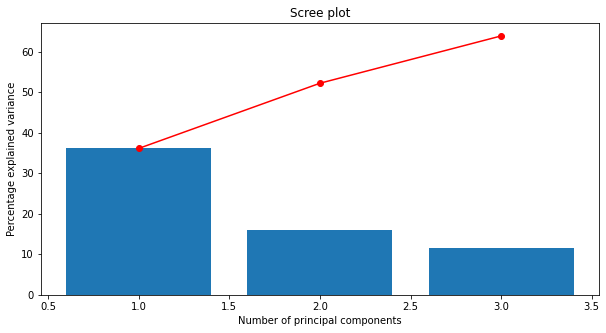

<Figure size 432x288 with 0 Axes>

In [678]:
fs = 15

plt.figure(figsize=(fs-5,fs-10))

# Courbe

model = PCA(n_components = n_comp).fit(X_scaled)

display_scree_plot(model)


plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P9_Ebouli_des_valeurs_propre_standard_scaler.png")
plt.show()

### Pour Robust Scaler

In [679]:
n_components = 3

In [680]:
model2 = PCA(n_components=n_components)
pca2 = model2.fit_transform(X_scaled_2)
pca2

array([[-1.64165842e+01, -1.45276564e+00,  7.78098985e-01],
       [-1.37137119e+00,  8.43662653e+00,  3.21135869e+00],
       [-1.64293280e+01, -1.96138070e+00, -3.77233285e-01],
       [-1.60918299e+01,  5.35216372e-01,  5.30022371e-01],
       [ 1.23274833e+02,  1.28818509e+01, -1.67221363e+01],
       [-1.64954988e+01, -2.37518272e+00, -5.88185946e-01],
       [-1.61061023e+01,  4.79532507e-01,  5.40971980e-02],
       [-1.65020566e+01, -2.40538515e+00, -4.97593652e-01],
       [-1.64653213e+01, -2.34679589e+00, -6.53637162e-01],
       [-1.64981006e+01, -2.37877906e+00, -5.17753107e-01],
       [-1.25726262e+01,  9.14960609e+00, -1.68312933e+00],
       [ 2.84903734e+01,  2.91607459e+00,  3.52133986e+00],
       [-1.64368553e+01, -1.98474605e+00, -3.01451360e-01],
       [-1.64978609e+01, -2.38820268e+00, -5.58522137e-01],
       [-5.56282458e+00,  1.00323074e+01, -4.69728892e+00],
       [ 3.37329867e-01, -8.95193266e-01, -2.60449956e+00],
       [-1.63398379e+01, -1.29935500e+00

In [681]:
model2.explained_variance_ratio_

array([0.96493798, 0.02528109, 0.00528626])

In [682]:
scree = (model2.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_comp+1)
list(x_list)

[1, 2, 3]

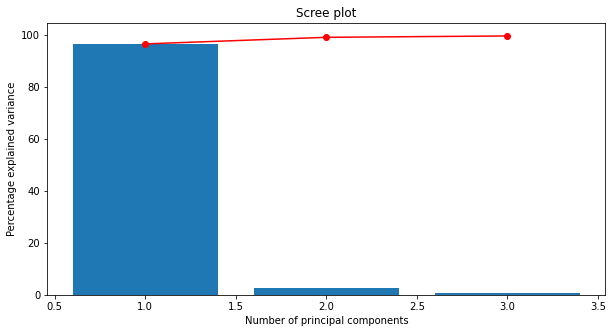

<Figure size 432x288 with 0 Axes>

In [683]:
fs = 15

plt.figure(figsize=(fs-5,fs-10))

# Courbe

model = PCA(n_components = n_comp).fit(X_scaled_2)

display_scree_plot(model)


plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P9_Ebouli_des_valeurs_propre_Robust_scaler.png")
plt.show()

### Avec MinMax Scaler

In [684]:
n_components = 3

In [685]:
model3 = PCA(n_components=n_components)
pca3 = model3.fit_transform(X_scaled_3)
pca3

array([[-3.69180901e-01, -4.32392884e-01, -3.56223477e-01],
       [ 6.19091069e-01,  3.79737358e-01, -1.00657547e-01],
       [ 7.95103736e-01, -3.55588184e-01, -1.53406163e-02],
       [ 2.66598537e-01, -4.16705987e-01,  1.80868045e-01],
       [ 8.13591261e-01, -1.41220944e-01,  4.59557586e-01],
       [-9.73249542e-01,  2.03817187e-01,  1.08392596e-01],
       [-9.66797656e-02, -3.39857752e-01, -3.75151815e-01],
       [-9.78529793e-01,  1.93168920e-01,  7.41701620e-02],
       [ 9.37105876e-01,  9.12563705e-01, -1.98604647e-01],
       [-9.81052951e-01,  2.05917823e-01,  9.35466011e-02],
       [ 8.60464642e-01,  3.85248491e-01,  1.89737908e-02],
       [ 9.29057499e-01,  4.52839152e-01, -2.19604849e-01],
       [ 4.88786832e-01, -4.06901784e-01, -8.30001636e-02],
       [-9.83501360e-01,  2.32205684e-01,  1.40344531e-01],
       [ 1.15317607e+00,  4.27916381e-01, -1.61123537e-01],
       [ 8.05795297e-01, -2.35399254e-01,  4.29496485e-01],
       [ 2.94412082e-01, -4.32216321e-01

In [686]:
model3.explained_variance_ratio_

array([0.60490065, 0.12476512, 0.05484737])

In [687]:
scree = (model3.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_comp+1)
list(x_list)

[1, 2, 3]

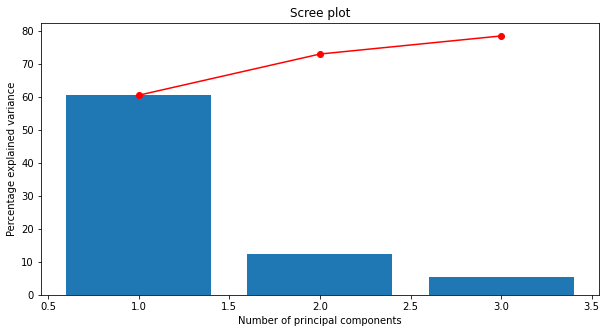

<Figure size 432x288 with 0 Axes>

In [688]:
fs = 15

plt.figure(figsize=(fs-5,fs-10))

# Courbe

model = PCA(n_components = n_comp).fit(X_scaled_3)

display_scree_plot(model)


plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P9_Ebouli_des_valeurs_propre_MinMax_scaler.png")
plt.show()

Je vais choisir de garder le MinMax Scaler Scaler qui sera le plus intéressant dans le cadre de cette étude.

### Visualisons le Cercle de Corrélation

#### Avec MinMax Scaler

In [689]:
x, y = 0,1

<Figure size 2160x2160 with 0 Axes>

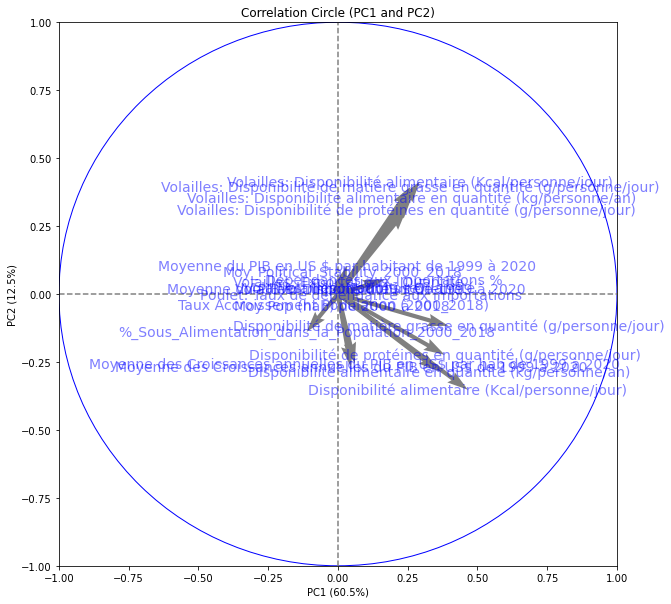

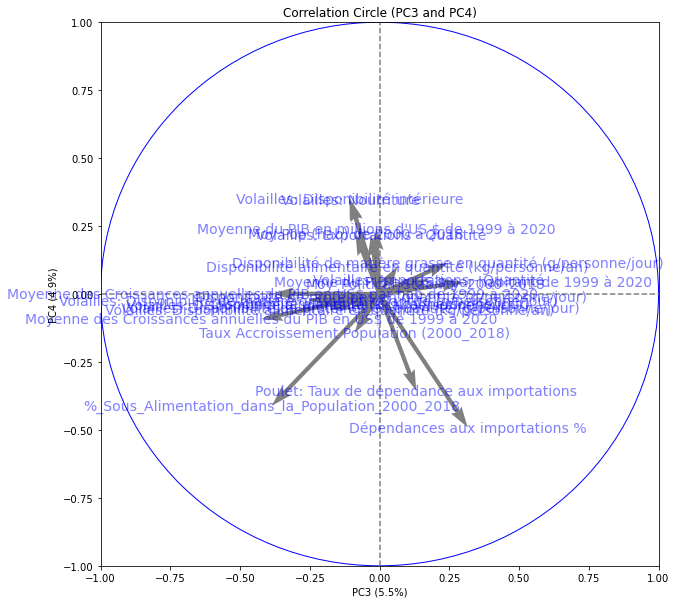

<Figure size 432x288 with 0 Axes>

In [690]:
# Taille de la figure

fs = 30

plt.figure(figsize=(fs,fs))

# Cercle des corrélations

features = Mother_Table_Clean_OK.columns

# on prend le modèle avec MinMax scaler

n_comp = 4

model = PCA(n_components = n_comp).fit(X_scaled_3)


pcs = model.components_

display_circles(pcs, n_comp, model, [(0,1),(2,3)], labels = np.array(features))


# Pour sauvegarder les figures

plt.savefig("P9_cercles_corrélations_3_normalisation.png")
plt.show()

Premier cercle de corrélations : La population est-elle bien nourrie ? 
Visiblement, sur la gauche du cercle, non ! Et à droite, oui!
Les pays avec une bonne disponibilité alimentaire se trouvent sur la droite et les populations en sous-nutrition sur la gauche.

Deuxième cercle de corrélations : Dépendances aux importations VS disponibilité intérieure
Les pays en bas à droite sont dépendants aux importations de tous les produits et plus spécifiquement au importations de poulets. Il serait judicieux de se focaliser sur ceux-ci.



In [691]:
# Créons une fonction qui trouve les variables inutiles

def Trouver_la_variable_inutile(Mother_Table_Clean_OK,X_scaled):


    # Cercle des corrélations

    features = Mother_Table_Clean_OK.columns

    # on prend le modèle avec standard scaler

    n_comp = 4

    model = PCA(n_components = n_comp).fit(X_scaled)

    
    pcs = model.components_
    
   
    # La projection x des flèches sur La première composante principale 

    x = pcs[0].round(2)

    # La projection y des flèches sur la seconde composante principale 

    y = pcs[1].round(2)

    # la longueur des flèches au carré par pythagore

    c = x*x + y*y

    # on a cmin la position de la flèche qui est la plus courte

    cmin = np.argmin(c)
    
    # Trouvons le nom de la flèche la plus petite

    print(f"La variable qui a la flèche la plus petite sur le premier plan de l\'ACP est la variable {features[cmin]}")
    
    # La projection x des flèches sur La 3ème composante principale 

    a = pcs[2].round(2)

    # La projection y des flèches sur la 4ème composante principale 

    b = pcs[3].round(2)

    # la longueur des flèches au carré par pythagore

    c2 = a*a + b*b

    # on a cmin la position de la flèche qui est la plus courte

    cmin2 = np.argmin(c2)
    
    # Trouvons le nom de la flèche la plus petite

    print(f"La variable qui a la flèche la plus petite sur le 2ème plan de l\'ACP est la variable {features[cmin2]}")

In [692]:
Trouver_la_variable_inutile(Mother_Table_Clean_OK,X_scaled_3)

La variable qui a la flèche la plus petite sur le premier plan de l'ACP est la variable Moyenne du PIB en millions d'US $ de 1999 à 2020
La variable qui a la flèche la plus petite sur le 2ème plan de l'ACP est la variable Disponibilité de protéines en quantité (g/personne/jour)


## Regardons les pays sur les plans de l'ACP

### Avec MinMAx Scaler

<Figure size 1080x720 with 0 Axes>

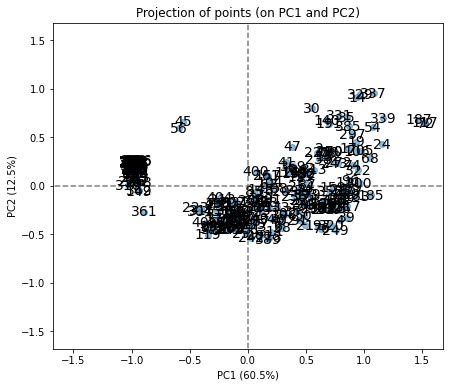

In [736]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# Projection des individus

model = PCA(n_components = n_comp).fit(X_scaled_3)

names = Mother_Table_Clean_OK.index

X_projected = model.transform(X_scaled_3)

display_factorial_planes(X_projected, n_comp, model, [(0,1)], labels = np.array(names), alpha = 0.5)

plt.show()

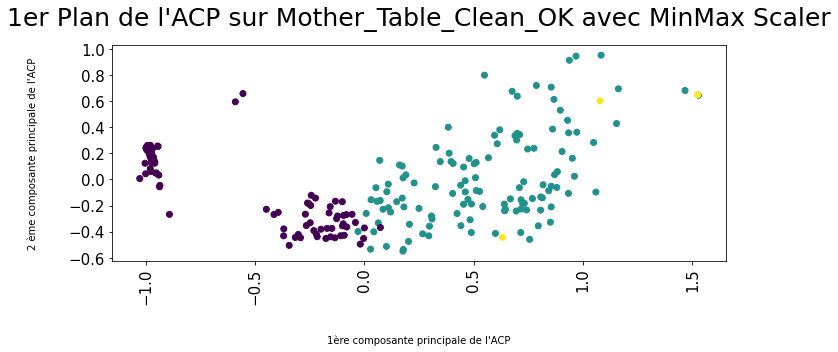

In [694]:
# Taille de la figure

fs = 15

plt.figure(figsize=(fs-5,fs-10))

# Plot

plt.scatter(pca_3[:,0],pca_3[:,1],c= prédiction_MinMax_scaler)

# Customisation du graphique

plt.ylabel(u"2 ème composante principale de l'ACP", fontsize = fs-5, labelpad= 30)
plt.xlabel(u"1ère composante principale de l'ACP", fontsize = fs-5, labelpad= 30 )
plt.title(u"1er Plan de l'ACP sur Mother_Table_Clean_OK avec MinMax Scaler", fontsize = fs+10, pad= 20)

# Set text labels.

plt.xticks(fontsize=fs, rotation='vertical')
plt.yticks(fontsize=fs)

plt.tight_layout()

# Pour sauvegarder la figure

plt.savefig("P9_ACP_Premier_Plan_MinMax_Scaler.png")
plt.show()

In [695]:
# Le groupe 1 est celui tout à gauche

Group_1_MinMax_Scaler.shape

(111, 23)

In [696]:
# Le groupe 3 est tout à droite

Group_3_MinMax_Scaler.shape

(3, 23)

In [697]:
# Le groupe 2 est au milieu

Group_2_MinMax_Scaler.shape

(124, 23)

Le groupe 2 est le plus concentré et le plus gros cluster identifié avec 124 pays. Le deuxième cluster est le groupe 1 et est plus dispersé avec 111 pays.

# IX) Heatmap Clusters VS Variables

L'intitulé nous demande : "Une heatmap avec les croisements entre les clusters de pays et les différentes variables (en format image), afin que je puisse tout de suite me faire une idée des différents groupes que tu auras définis"

In [698]:
Mother_Table_Clean_Graphique

Pays  Moy Pop (hab) de 2000 à 2018  \
0                               Afghanistan                   28845766.58   
2                            Afrique du Sud                   50901472.26   
4                                   Albanie                    2994856.32   
6                                   Algérie                   35858473.63   
8                                 Allemagne                   81527014.00   
..                                      ...                           ...   
400  Venezuela (République bolivarienne du)                   27706314.79   
402                                Viet Nam                   87385724.05   
404                                   Yémen                   22694117.05   
406                                  Zambie                   13492231.74   
408                                Zimbabwe                   12806372.53   

     Taux Accroissement Population (2000_2018)  \
0                                         0.79   
2                                         0.29   
4                                        -0.08   
6                                         0.36   
8                                         0.02   
..                                         ...   
400                                       0.19   
402                                       0.20   
404                                       0.64   
406                                       0.67   
408                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
..                                              ...   
400                                          2247.0   
402                                          2938.0   
404                                          2062.0   
406                                          2008.0   
408                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
..                                                 ...        
400                                             534.05        
402                                             713.46        
404                                             302.47        
406                                             355.99        
408                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
..                                                 ...               
400                                              64.85               
402                                              78.45               
404                                              38.98               
406                                              44.67               
408                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50     

Je vais afficher les groupes et les centrer et les réduire pour que  les variables puissent être comparées sur la heat map.

### MinMax Scaler

In [699]:
Group_1_MinMax_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
0                    Afghanistan                   28845766.58   
10                       Andorre                      78052.63   
11                        Angola                   22917624.68   
13                      Anguilla                      13158.26   
16   Antilles néerlandaises (ex)                     243869.68   
..                           ...                           ...   
384                        Tonga                     101470.53   
393                       Tuvalu                      10425.32   
404                        Yémen                   22694117.05   
406                       Zambie                   13492231.74   
408                     Zimbabwe                   12806372.53   

     Taux Accroissement Population (2000_2018)  \
0                                         0.79   
10                                        0.18   
11                                        0.88   
13                                        0.31   
16                                        0.29   
..                                         ...   
384                                       0.05   
393                                       0.23   
404                                       0.64   
406                                       0.67   
408                                       0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
10                                              0.0   
11                                           2266.0   
13                                              0.0   
16                                              0.0   
..                                              ...   
384                                             0.0   
393                                             0.0   
404                                          2062.0   
406                                          2008.0   
408                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
10                                                0.00        
11                                              570.95        
13                                                0.00        
16                                                0.00        
..                                                 ...        
384                                               0.00        
393                                               0.00        
404                                             302.47        
406                                             355.99        
408                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
10                                                0.00               
11                                               48.73               
13                                                0.00               
16                                                0.00               
..                                                 ...               
384                                               0.00               
393                                               0.00               
404                                              38.98               
406                                              44.67               
408                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
10                                                0.00          
11                                               54.09          
13                                                0.00          
16                                                

In [700]:
G1_MM = Group_1_MinMax_Scaler.groupby("Pays").mean()

G1_MM

Moy Pop (hab) de 2000 à 2018  \
Pays                                                        
Afghanistan                                   28845766.58   
Andorre                                          78052.63   
Angola                                        22917624.68   
Anguilla                                         13158.26   
Antilles néerlandaises (ex)                     243869.68   
...                                                   ...   
Îles Salomon                                    522872.26   
Îles Turques-et-Caïques                          30804.95   
Îles Vierges américaines                        106580.00   
Îles Vierges britanniques                        25890.47   
Îles Wallis-et-Futuna                            13431.47   

                             Taux Accroissement Population (2000_2018)  \
Pays                                                                     
Afghanistan                                                       0.79   
Andorre                                                           0.18   
Angola                                                            0.88   
Anguilla                                                          0.31   
Antilles néerlandaises (ex)                                       0.29   
...                                                                ...   
Îles Salomon                                                      0.58   
Îles Turques-et-Caïques                                           0.87   
Îles Vierges américaines                                         -0.04   
Îles Vierges britanniques                                         0.47   
Îles Wallis-et-Futuna                                            -0.21   

                             Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                          
Afghanistan                                                          1997.0   
Andorre                                                                 0.0   
Angola                                                               2266.0   
Anguilla                                                                0.0   
Antilles néerlandaises (ex)                                             0.0   
...                                                                     ...   
Îles Salomon                                                         2410.0   
Îles Turques-et-Caïques                                                 0.0   
Îles Vierges américaines                                                0.0   
Îles Vierges britanniques                                               0.0   
Îles Wallis-et-Futuna                                                   0.0   

                             Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                  
Afghanistan                                                             357.31        
Andorre                                                                   0.00        
Angola                                                                  570.95        
Anguilla                                                                  0.00        
Antilles néerlandaises (ex)                                               0.00        
...                                                                        ...        
Îles Salomon                                                            659.79        
Îles Turques-et-Caïques                                                   0.00        
Îles Vierges américaines                                                  0.00        
Îles Vierges britanniques                                                 0.00        
Îles Wallis-et-Futuna                                                     0.00        

                             Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays              

In [701]:
# Pour centrer et réduire les données

X = G1_MM

std_scale = sklearn.preprocessing.MinMaxScaler().fit(X)
X_scaled_G1_MM = std_scale.transform(X)

X_scaled_G1_MM

array([[2.37937901e-02, 2.55754476e-01, 6.83202190e-01, ...,
        2.71429595e-03, 0.00000000e+00, 5.21650535e-01],
       [6.37273345e-05, 9.97442455e-02, 0.00000000e+00, ...,
        2.54140832e-01, 6.49076517e-01, 6.80081508e-02],
       [1.89037533e-02, 2.78772379e-01, 7.75230927e-01, ...,
        2.00923010e-02, 4.77572559e-01, 6.22007132e-01],
       ...,
       [8.72591410e-05, 4.34782609e-02, 0.00000000e+00, ...,
        0.00000000e+00, 6.49076517e-01, 6.80081508e-02],
       [2.06995383e-05, 1.73913043e-01, 0.00000000e+00, ...,
        2.87657547e-01, 6.49076517e-01, 6.80081508e-02],
       [1.04222931e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.49076517e-01, 6.80081508e-02]])

In [702]:
X_scaled_G1_MM_mean = X_scaled_G1_MM.mean(axis=0)

X_scaled_G1_MM_mean

array([0.02081546, 0.14988134, 0.32958857, 0.28077573, 0.22919068,
       0.28931102, 0.10738739, 0.11863333, 0.09160287, 0.09632641,
       0.09078875, 0.09284847, 0.02841787, 0.01932053, 0.03047387,
       0.03089747, 0.22278357, 0.21907476, 0.02439968, 0.0671839 ,
       0.61722408, 0.18945767])

In [703]:
Group_2_MinMax_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
2                            Afrique du Sud                   50901472.26   
4                                   Albanie                    2994856.32   
6                                   Algérie                   35858473.63   
8                                 Allemagne                   81527014.00   
14                       Antigua-et-Barbuda                      86477.37   
..                                      ...                           ...   
394                                 Ukraine                   46191965.63   
396                                 Uruguay                    3363387.89   
398                                 Vanuatu                     233989.89   
400  Venezuela (République bolivarienne du)                   27706314.79   
402                                Viet Nam                   87385724.05   

     Taux Accroissement Population (2000_2018)  \
2                                         0.29   
4                                        -0.08   
6                                         0.36   
8                                         0.02   
14                                        0.27   
..                                         ...   
394                                      -0.09   
396                                       0.04   
398                                       0.58   
400                                       0.19   
402                                       0.20   

     Disponibilité alimentaire (Kcal/personne/jour)  \
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
14                                           2429.0   
..                                              ...   
394                                          3033.0   
396                                          3151.0   
398                                          2623.0   
400                                          2247.0   
402                                          2938.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
14                                              632.98        
..                                                 ...        
394                                             855.42        
396                                             761.74        
398                                             655.88        
400                                             534.05        
402                                             713.46        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
14                                               88.72               
..                                                 ...               
394                                              79.42               
396                                             109.56               
398                                              98.26               
400                                              64.85               
402                                              78.45               

     Disponibilité de protéines en quantité (g/personne/jour)  \
2                                                83.36          
4                                               119.50          
6                                                92.85     

In [704]:
G2_MM = Group_2_MinMax_Scaler.groupby("Pays").mean()

G2_MM

Moy Pop (hab) de 2000 à 2018  \
Pays                                                                   
Afrique du Sud                                           50901472.26   
Albanie                                                   2994856.32   
Algérie                                                  35858473.63   
Allemagne                                                81527014.00   
Antigua-et-Barbuda                                          86477.37   
...                                                              ...   
Venezuela (République bolivarienne du)                   27706314.79   
Viet Nam                                                 87385724.05   
Égypte                                                   82271869.00   
Émirats arabes unis                                       6923823.37   
Équateur                                                 14797818.05   

                                        Taux Accroissement Population (2000_2018)  \
Pays                                                                                
Afrique du Sud                                                               0.29   
Albanie                                                                     -0.08   
Algérie                                                                      0.36   
Allemagne                                                                    0.02   
Antigua-et-Barbuda                                                           0.27   
...                                                                           ...   
Venezuela (République bolivarienne du)                                       0.19   
Viet Nam                                                                     0.20   
Égypte                                                                       0.43   
Émirats arabes unis                                                          2.07   
Équateur                                                                     0.35   

                                        Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                                     
Afrique du Sud                                                                  2987.0   
Albanie                                                                         3400.0   
Algérie                                                                         3345.0   
Allemagne                                                                       3559.0   
Antigua-et-Barbuda                                                              2429.0   
...                                                                                ...   
Venezuela (République bolivarienne du)                                          2247.0   
Viet Nam                                                                        2938.0   
Égypte                                                                          3315.0   
Émirats arabes unis                                                             3370.0   
Équateur                                                                        2585.0   

                                        Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                             
Afrique du Sud                                                                     556.42        
Albanie                                                                           1260.49        
Algérie                                                                            798.71        
Allemagne                                                                          943.24        
Antigua-et-Barbuda                                                                 632.98        
...                                                                                   ...        
Venezuela (République bolivarienne du)    

In [705]:
# Pour centrer et réduite les données

X = G2_MM

std_scale = sklearn.preprocessing.MinMaxScaler().fit(X)
X_scaled_G2_MM = std_scale.transform(X)

X_scaled_G2_MM

array([[0.35213794, 0.21585903, 0.54661262, ..., 0.05627937, 0.62032086,
        0.06650246],
       [0.02040245, 0.05286344, 0.78575565, ..., 0.03640951, 0.62032086,
        0.12315271],
       [0.24797077, 0.24669604, 0.75390851, ..., 0.03853477, 0.62032086,
        0.07389163],
       ...,
       [0.56936626, 0.27753304, 0.73653735, ..., 0.02287305, 0.62032086,
        0.09007741],
       [0.04760908, 1.        , 0.76838448, ..., 0.39248697, 0.62032086,
        0.14813512],
       [0.10213356, 0.24229075, 0.31383903, ..., 0.04524517, 0.62032086,
        0.45883181]])

In [706]:
X_scaled_G2_MM_mean = X_scaled_G2_MM.mean(axis=0)

X_scaled_G2_MM_mean

array([0.12664532, 0.19283786, 0.56580963, 0.42828296, 0.47438529,
       0.40529835, 0.25606156, 0.14084106, 0.37392813, 0.33724809,
       0.33186916, 0.31027367, 0.10672385, 0.0531132 , 0.10472555,
       0.10235443, 0.47584748, 0.43592153, 0.05586499, 0.15715736,
       0.63077885, 0.15520363])

In [707]:
Group_3_MinMax_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
54                  Brésil                  1.932597e+08   
76     Chine, continentale                  1.360829e+09   
117  États-Unis d'Amérique                  3.055111e+08   

     Taux Accroissement Population (2000_2018)  \
54                                        0.20   
76                                        0.11   
117                                       0.16   

     Disponibilité alimentaire (Kcal/personne/jour)  \
54                                           3250.0   
76                                           3197.0   
117                                          3762.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
54                                              770.49        
76                                              968.52        
117                                             990.38        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
54                                              124.60               
76                                               96.89               
117                                             167.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
54                                               90.87          
76                                              101.44          
117                                             113.61          

     Dépendances aux importations %  \
54                             1.63   
76                             8.94   
117                            9.94   

     Poulet: Taux de dépendance aux importations  \
54                                          0.03   
76                                          2.50   
117                                         0.67   

     Volailles: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
54                                               204.0          ...   
76                                                59.0          ...   
117                                              219.0          ...   

     Volailles: Disponibilité intérieure  Volailles: Exportations - Quantité  \
54                                9982.0                              4223.0   
76                               18161.0                               576.0   
117                              18266.0                              3692.0   

     Volailles: Importations - Quantité  Volailles: Nourriture  \
54                                  3.0                 9982.0   
76                                452.0                17518.0   
117                               123.0                18100.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020  \
54                                                5.71                
76                                               13.43                
117                                               3.78                

     Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020  \
54                                                4.65                        
76                                               12.80                        
117                                               2.93                        

     Moyenne du PIB en millions d'US $ de 1999 à 2020  \
54                                         1563845.83   
76                                         6935305.01   
117                                       15546826.90   

     Moyenne du PIB en US $ par habitant de 1999 à 2020  \
54                                             7884.12    
76                                             4963.73    
117                                           50086.22    

     Moy_Political_Stability_2000_2018  \
54                                 0.0   
76                                 0.0   
117                                0.0   

     %_Sous_Alimentation_dans_la_Population_2000_2018  
54                                

In [708]:
G3_MM = Group_3_MinMax_Scaler.groupby("Pays").mean()

G3_MM

Moy Pop (hab) de 2000 à 2018  \
Pays                                                  
Brésil                                 1.932597e+08   
Chine, continentale                    1.360829e+09   
États-Unis d'Amérique                  3.055111e+08   

                       Taux Accroissement Population (2000_2018)  \
Pays                                                               
Brésil                                                      0.20   
Chine, continentale                                         0.11   
États-Unis d'Amérique                                       0.16   

                       Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Brésil                                                         3250.0   
Chine, continentale                                            3197.0   
États-Unis d'Amérique                                          3762.0   

                       Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Brésil                                                            770.49        
Chine, continentale                                               968.52        
États-Unis d'Amérique                                             990.38        

                       Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                                   
Brésil                                                            124.60               
Chine, continentale                                                96.89               
États-Unis d'Amérique                                             167.00               

                       Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                              
Brésil                                                             90.87          
Chine, continentale                                               101.44          
États-Unis d'Amérique                                             113.61          

                       Dépendances aux importations %  \
Pays                                                    
Brésil                                           1.63   
Chine, continentale                              8.94   
États-Unis d'Amérique                            9.94   

                       Poulet: Taux de dépendance aux importations  \
Pays                                                                 
Brésil                                                        0.03   
Chine, continentale                                           2.50   
États-Unis d'Amérique                                         0.67   

                       Volailles: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                               
Brésil                                                             204.0           
Chine, continentale                                                 59.0           
États-Unis d'Amérique                                              219.0           

                       Volailles: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                       
Brésil                                                             48.03                   
Chine, continentale                                                12.33                   
États-Unis d'Amérique                                              55.68                   

                       ...  Volailles: Disponibilité intérieure  \
Pays                   ...                                        
Brésil                 ...                               9982.0   
Chine, continentale    ...                              1

In [709]:
# Pour centrer et réduite les données

X = G3_MM

std_scale = sklearn.preprocessing.MinMaxScaler().fit(X)
X_scaled_G3_MM = std_scale.transform(X)

X_scaled_G3_MM

array([[0.        , 1.        , 0.09380531, 0.        , 0.39523606,
        0.        , 0.        , 0.        , 0.90625   , 0.82352941,
        1.        , 0.73387602, 0.        , 1.        , 0.        ,
        0.        , 0.2       , 0.17426545, 0.        , 0.06472138,
        0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.90058666, 0.        ,
        0.4648197 , 0.87966306, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.98732496, 0.        , 1.        ,
        0.92830746, 1.        , 1.        , 0.38414263, 0.        ,
        0.        , 0.87387387],
       [0.0961411 , 0.55555556, 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.25910931, 1.        , 1.        ,
        0.95220244, 1.        , 1.        , 0.85440088, 0.26726058,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        ]])

In [710]:
X_scaled_G3_MM_mean = X_scaled_G3_MM.mean(axis=0)

X_scaled_G3_MM_mean

array([0.36538037, 0.51851852, 0.36460177, 0.63352889, 0.46507869,
       0.48827323, 0.62655435, 0.4197031 , 0.63541667, 0.60784314,
       0.65073415, 0.57795867, 0.66244165, 0.61813363, 0.42242019,
       0.64276915, 0.4       , 0.39142182, 0.46138088, 0.35490713,
       0.        , 0.62462462])

## b) Par clusters et par pays

#### MinMax Scaler

Il y a 111 pays dans ce groupe


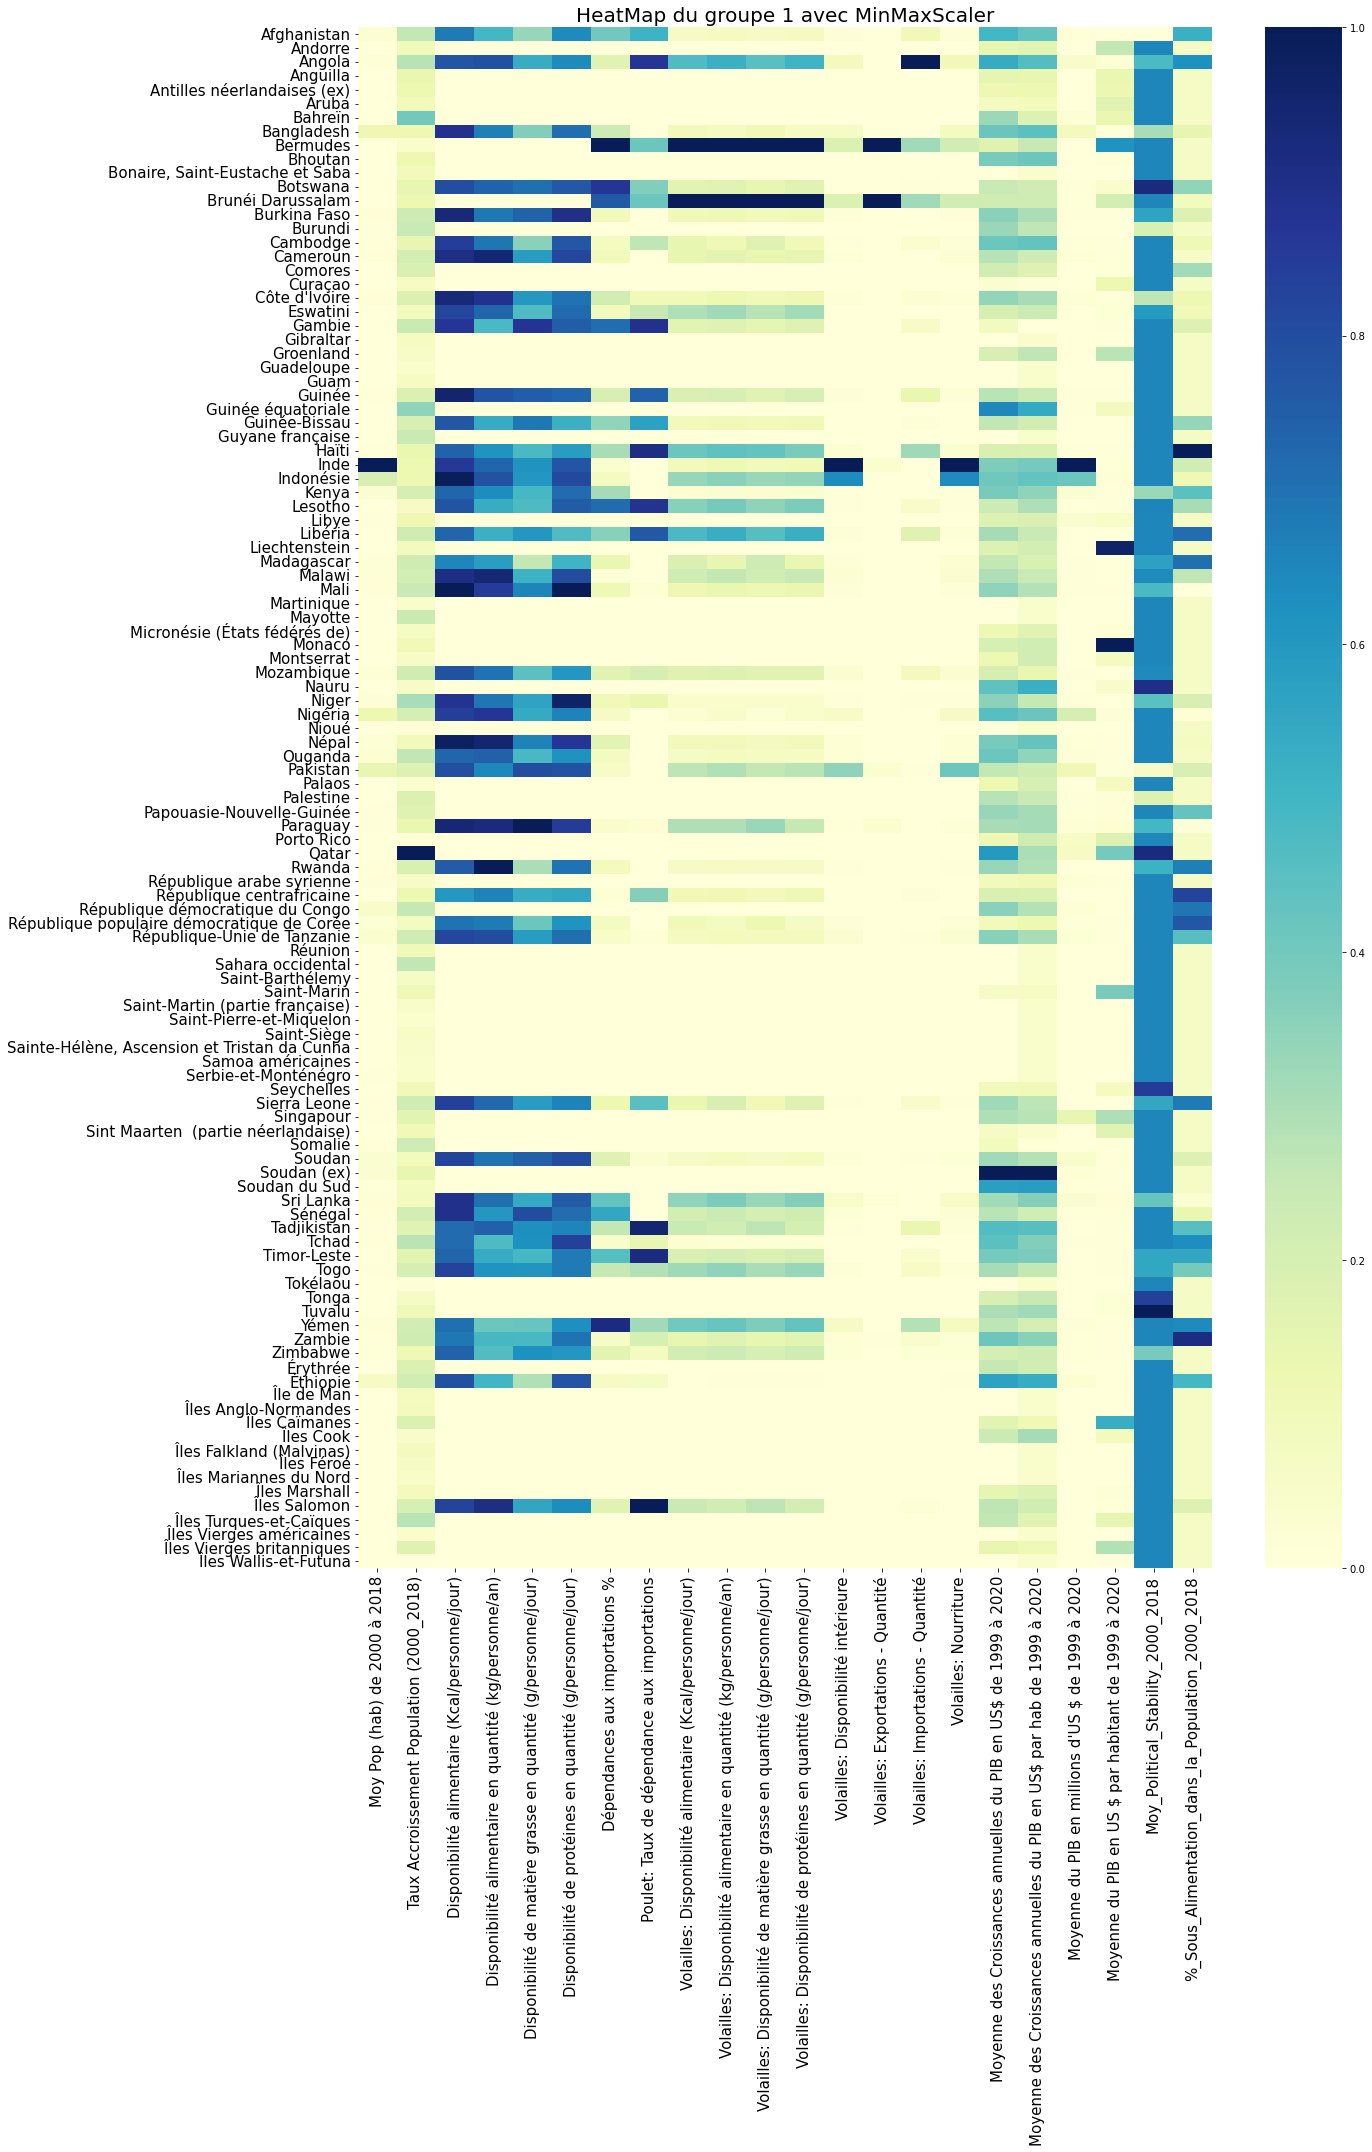

In [744]:
# Taille de la figure

plt.figure(figsize=(20,30))

# Pour la légende des axes

yticks = G1_MM.index

xticks = G1_MM.columns

# La heatmap

sns.heatmap(X_scaled_G1_MM,cmap="YlGnBu",yticklabels=yticks,xticklabels=xticks)

# This sets the yticks "upright" with 0, as opposed to sideways with 90.

plt.yticks(rotation=0, fontsize = 15)
plt.xticks(rotation=90, fontsize = 15)

plt.title("HeatMap du groupe 1 avec MinMaxScaler",fontsize= 20)

print(f"Il y a {G1_MM.shape[0]} pays dans ce groupe")
          
# Pour sauvegarder les figures

plt.tight_layout()
plt.savefig("P9_Heatmap_G1_MM.png")
plt.show()

Il y a 124 pays dans ce groupe


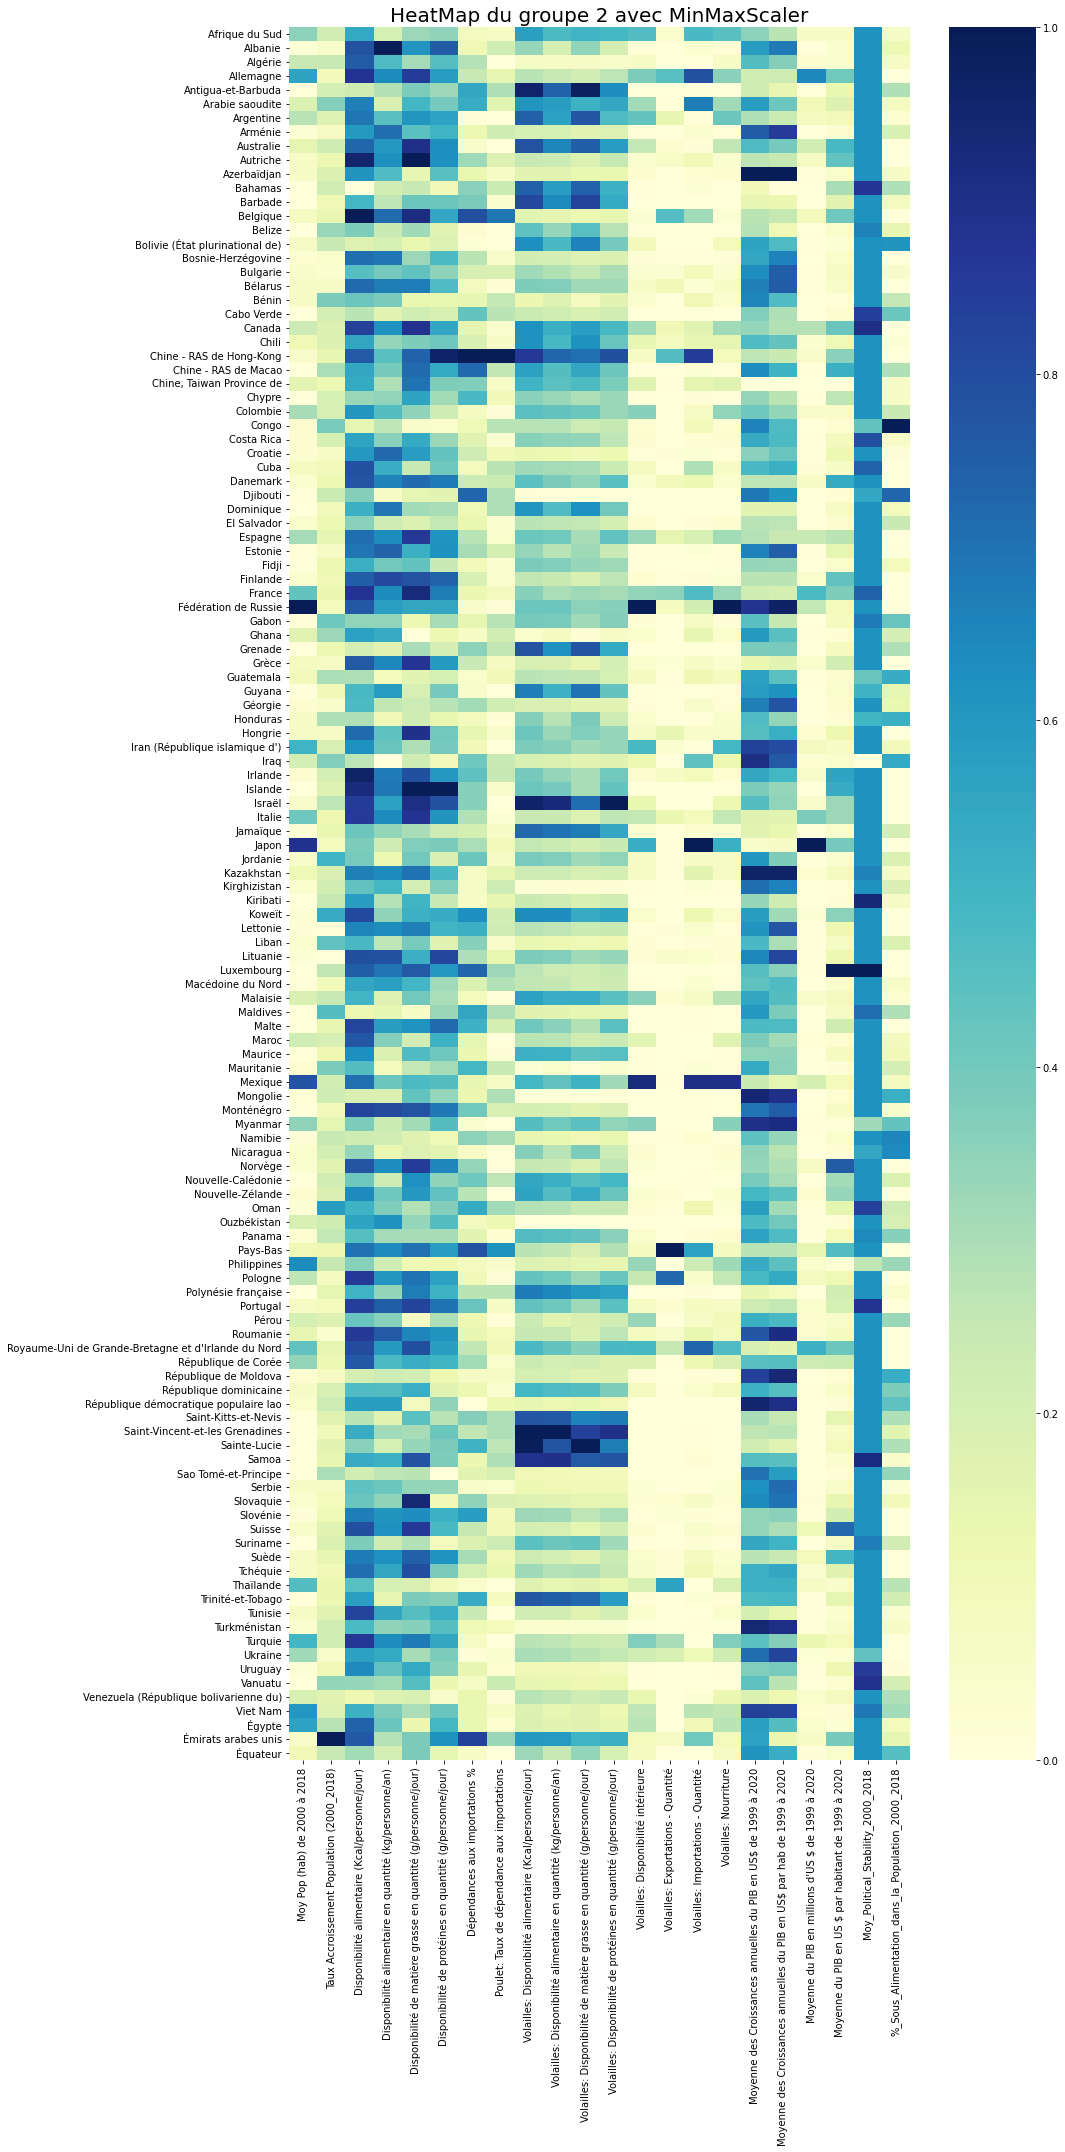

In [751]:
# Taille de la figure

plt.figure(figsize=(15,30))

# Pour la légende des axes

yticks = G2_MM.index

xticks = G2_MM.columns

# La heatmap

sns.heatmap(X_scaled_G2_MM,cmap="YlGnBu",yticklabels=yticks,xticklabels=xticks)

# This sets the yticks "upright" with 0, as opposed to sideways with 90.

plt.yticks(rotation=0, fontsize = 10)
plt.xticks(rotation=90, fontsize = 10)

plt.title("HeatMap du groupe 2 avec MinMaxScaler",fontsize= 20)

print(f"Il y a {G2_MM.shape[0]} pays dans ce groupe")

# Pour sauvegarder les figures

plt.tight_layout()
plt.savefig("P9_Heatmap_G2_MM.png")
plt.show()

Il y a 3 pays dans ce groupe


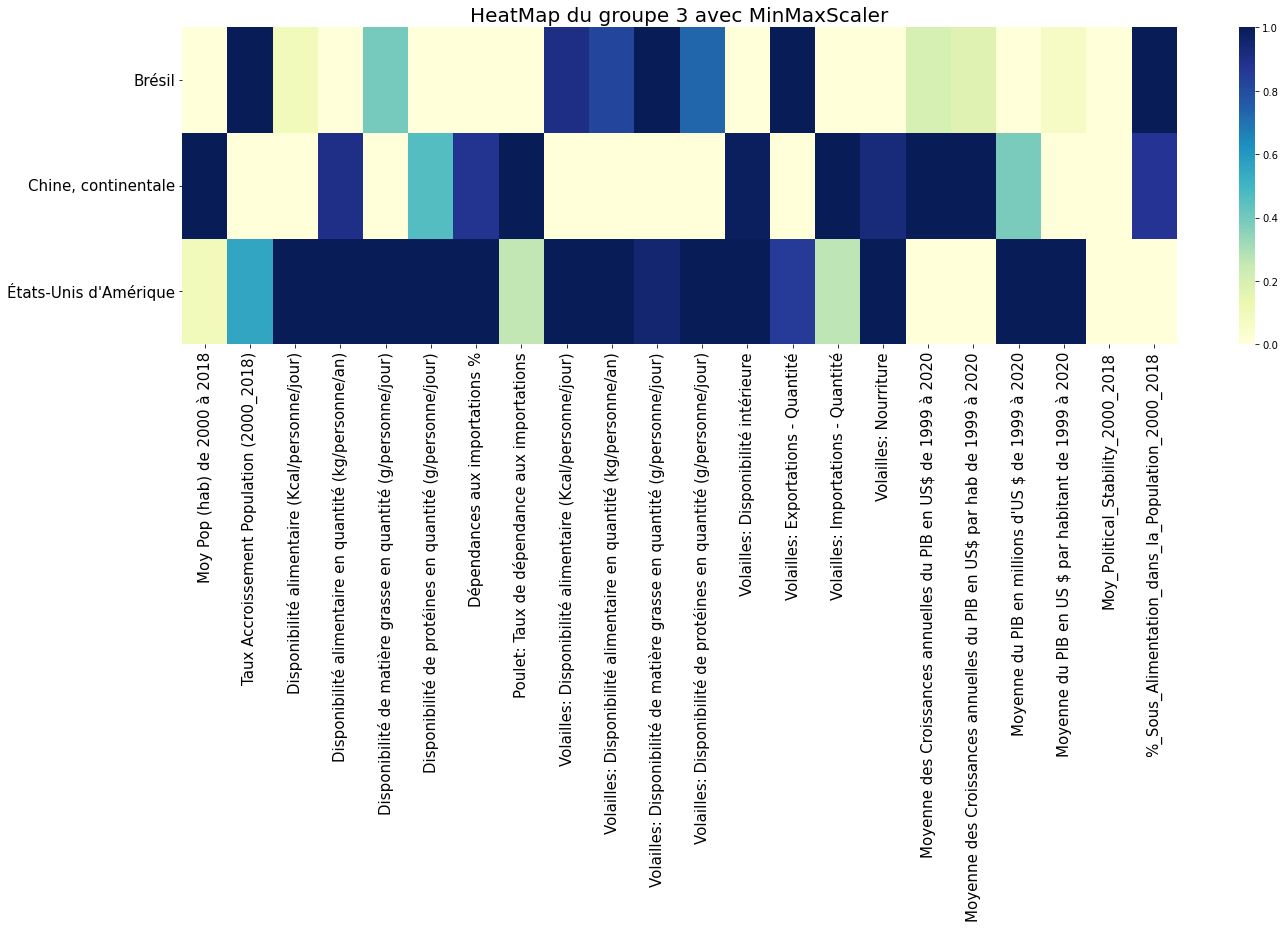

In [733]:
# Taille de la figure

plt.figure(figsize=(20,13))

# Pour la légende des axes

yticks = G3_MM.index

xticks = G3_MM.columns

# La heatmap

sns.heatmap(X_scaled_G3_MM,cmap="YlGnBu",yticklabels=yticks,xticklabels=xticks)

# This sets the yticks "upright" with 0, as opposed to sideways with 90.

plt.yticks(rotation=0, fontsize = 15)
plt.xticks(rotation=90, fontsize = 15)

plt.title("HeatMap du groupe 3 avec MinMaxScaler",fontsize= 20)
          
# Pour sauvegarder les figures

print(f"Il y a {G3_MM.shape[0]} pays dans ce groupe")

plt.tight_layout()
plt.savefig("P9_Heatmap_G3_MM.png")
plt.show()

## c) Par Groupe

In [714]:
X_scaled_G1_MM_mean

array([0.02081546, 0.14988134, 0.32958857, 0.28077573, 0.22919068,
       0.28931102, 0.10738739, 0.11863333, 0.09160287, 0.09632641,
       0.09078875, 0.09284847, 0.02841787, 0.01932053, 0.03047387,
       0.03089747, 0.22278357, 0.21907476, 0.02439968, 0.0671839 ,
       0.61722408, 0.18945767])

In [715]:
X_scaled_G2_MM_mean

array([0.12664532, 0.19283786, 0.56580963, 0.42828296, 0.47438529,
       0.40529835, 0.25606156, 0.14084106, 0.37392813, 0.33724809,
       0.33186916, 0.31027367, 0.10672385, 0.0531132 , 0.10472555,
       0.10235443, 0.47584748, 0.43592153, 0.05586499, 0.15715736,
       0.63077885, 0.15520363])

In [716]:
X_scaled_G3_MM_mean

array([0.36538037, 0.51851852, 0.36460177, 0.63352889, 0.46507869,
       0.48827323, 0.62655435, 0.4197031 , 0.63541667, 0.60784314,
       0.65073415, 0.57795867, 0.66244165, 0.61813363, 0.42242019,
       0.64276915, 0.4       , 0.39142182, 0.46138088, 0.35490713,
       0.        , 0.62462462])

In [717]:
Mother_Table_Clean_Graphique.columns

Index(['Pays', 'Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population (2000_2018)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Dépendances aux importations %',
       'Poulet: Taux de dépendance aux importations',
       'Volailles: Disponibilité alimentaire (Kcal/personne/jour)',
       'Volailles: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Volailles: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Volailles: Disponibilité de protéines en quantité (g/personne/jour)',
       'Volailles: Disponibilité intérieure',
       'Volailles: Exportations - Quantité',
       'Volailles: Importations - Quantité', 'Volailles: Nourriture',
       'Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020',
      

In [718]:
ar = [X_scaled_G1_MM_mean,X_scaled_G2_MM_mean,X_scaled_G3_MM_mean]

Group_Total = pd.DataFrame(ar, index=["Centroïd Groupe 1 MinMax Scaler","Centroïd Groupe 2 MinMax Scaler","Centroïd Groupe 3 MinMax Scaler"],
                          columns=[Mother_Table_Clean_Graphique.columns[i] for i in range(1,len(Mother_Table_Clean_Graphique.columns))])

Group_Total = Group_Total.round(2)

Group_Total

Moy Pop (hab) de 2000 à 2018  \
Centroïd Groupe 1 MinMax Scaler                          0.02   
Centroïd Groupe 2 MinMax Scaler                          0.13   
Centroïd Groupe 3 MinMax Scaler                          0.37   

                                 Taux Accroissement Population (2000_2018)  \
Centroïd Groupe 1 MinMax Scaler                                       0.15   
Centroïd Groupe 2 MinMax Scaler                                       0.19   
Centroïd Groupe 3 MinMax Scaler                                       0.52   

                                 Disponibilité alimentaire (Kcal/personne/jour)  \
Centroïd Groupe 1 MinMax Scaler                                            0.33   
Centroïd Groupe 2 MinMax Scaler                                            0.57   
Centroïd Groupe 3 MinMax Scaler                                            0.36   

                                 Disponibilité alimentaire en quantité (kg/personne/an)  \
Centroïd Groupe 1 MinMax Scaler                                               0.28        
Centroïd Groupe 2 MinMax Scaler                                               0.43        
Centroïd Groupe 3 MinMax Scaler                                               0.63        

                                 Disponibilité de matière grasse en quantité (g/personne/jour)  \
Centroïd Groupe 1 MinMax Scaler                                               0.23               
Centroïd Groupe 2 MinMax Scaler                                               0.47               
Centroïd Groupe 3 MinMax Scaler                                               0.47               

                                 Disponibilité de protéines en quantité (g/personne/jour)  \
Centroïd Groupe 1 MinMax Scaler                                               0.29          
Centroïd Groupe 2 MinMax Scaler                                               0.41          
Centroïd Groupe 3 MinMax Scaler                                               0.49          

                                 Dépendances aux importations %  \
Centroïd Groupe 1 MinMax Scaler                            0.11   
Centroïd Groupe 2 MinMax Scaler                            0.26   
Centroïd Groupe 3 MinMax Scaler                            0.63   

                                 Poulet: Taux de dépendance aux importations  \
Centroïd Groupe 1 MinMax Scaler                                         0.12   
Centroïd Groupe 2 MinMax Scaler                                         0.14   
Centroïd Groupe 3 MinMax Scaler                                         0.42   

                                 Volailles: Disponibilité alimentaire (Kcal/personne/jour)  \
Centroïd Groupe 1 MinMax Scaler                                               0.09           
Centroïd Groupe 2 MinMax Scaler                                               0.37           
Centroïd Groupe 3 MinMax Scaler                                               0.64           

                                 Volailles: Disponibilité alimentaire en quantité (kg/personne/an)  \
Centroïd Groupe 1 MinMax Scaler                                               0.10                   
Centroïd Groupe 2 MinMax Scaler                                               0.34                   
Centroïd Groupe 3 MinMax Scaler                                               0.61                   

                                 ...  Volailles: Disponibilité intérieure  \
Centroïd Groupe 1 MinMax Scaler  ...                                 0.03   
Centroïd Groupe 2 MinMax Scaler  ...                                 0.11   
Centroïd Groupe 3 MinMax Scaler  ...                                 0.66   

                                 Volailles: Exportations - Quantité  \
Centroïd Groupe 1 MinMax Scaler                                0.02   
Centroïd Groupe 2 MinMax Scaler                                0.05   
Centroïd Groupe 3 MinMax Scaler                                0.62   

                         

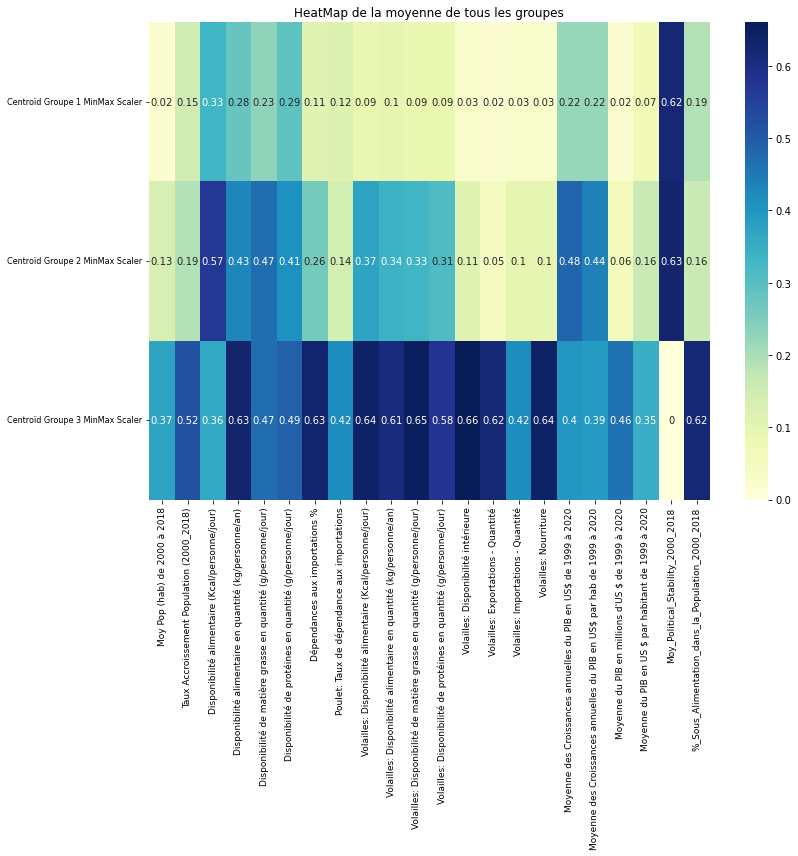

In [746]:
# Taille de la figure

fs = 12

plt.figure(figsize=(fs,fs))

# Pour la légende des axes

yticks = Group_Total.index

xticks = Group_Total.columns

# La heatmap

sns.heatmap(Group_Total,cmap="YlGnBu",yticklabels=yticks,xticklabels=xticks,annot=True)

# This sets the yticks "upright" with 0, as opposed to sideways with 90.

plt.yticks(rotation=0, fontsize = fs-4)
plt.xticks(rotation=90, fontsize = fs-3)
          
# Pour sauvegarder les figures

plt.title("HeatMap de la moyenne de tous les groupes",fontsize= fs)

plt.tight_layout()
plt.savefig("P9_Heatmap_All_groups.png")
plt.show()

Le groupe 1 est le plus équilibré autour de 0 avec juste la stabilité politique très élevé. (Le 2 ème groupes avec la stabilité la plus élevée)

Par variable :

La moyenne de la population est supérieure dans le groupe 3.

Le taux d'évolution de la population est le plus élevé pour le groupe 3.

La disponibilité alimentaire est très élevée pour le groupe 3.

Le taux de dépendance aux importations est favorable pour le groupe 3 et pour le poulet, le taux de dépendance aux importations est plus élevé pour le groupe 3.

La moyenne des croissances du PIB est supérieure pour le groupe 3.

Le groupe 1 et 2 ont une meilleure stabilité politique que le groupe 3.

Je choisirais le groupe 3 car il est globalement le plus intéressant parmi ces trois groupes. Il remplit la majorité des conditions pour mener une activité prospère en importations de poulets.

# X) Recommandation

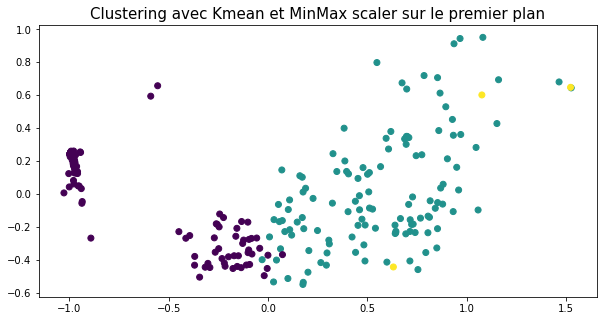

In [749]:
# Taille de la figure

fs = 15

plt.figure(figsize=(fs-5,fs-10))

# Modèle Kmeans Min Max Scaler

X = pca_3

prédiction_MinMax_scaler 

plt.scatter(X[:,0],X[:,1],c= prédiction_MinMax_scaler)

# Customisation

plt.title("Clustering avec Kmean et MinMax scaler sur le premier plan", fontsize = fs)

# Pour sauvegarder les figures

plt.savefig("P9_kmeans_MinMaxScaler_premier_plan_nbre_cluster_ideal.png")
plt.show()

Le groupe 1 est à gauche, le 2 au milieu et le 3 à droite.

Nous choisirons le groupe 3 et éviterons le groupe 1.

Au sein du groupe 3, nous trions ensuite les différentes variables pour connaître les pays à choisir en priorité parmi le premier groupe (Proximité géographique, stabilité politique intéressante, PIB fort pour pouvoir y exporter nos poulets).



<Figure size 1440x1440 with 0 Axes>

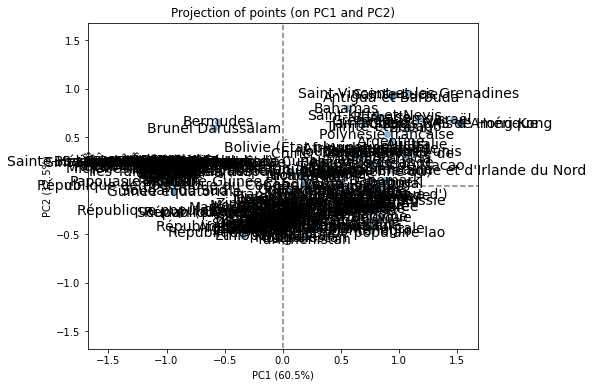

In [752]:
# Taille de la figure

plt.figure(figsize=(20,20))

# Projection des individus

names = Mother_Table_Clean_Graphique["Pays"]

model = PCA(n_components = n_comp).fit(X_scaled_3)

X_projected = model.transform(X_scaled_3)

display_factorial_planes(X_projected, n_comp, model, [(0,1)], labels = np.array(names), alpha = 0.5)

# Pour sauvegarder les figures

plt.savefig("P9_projection_individus_avec_MinMax_scaler.png")
plt.show()

<Figure size 2880x2880 with 0 Axes>

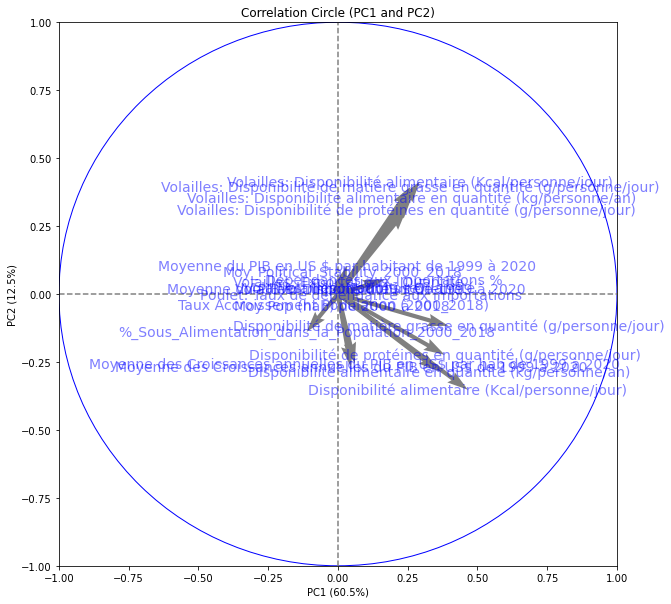

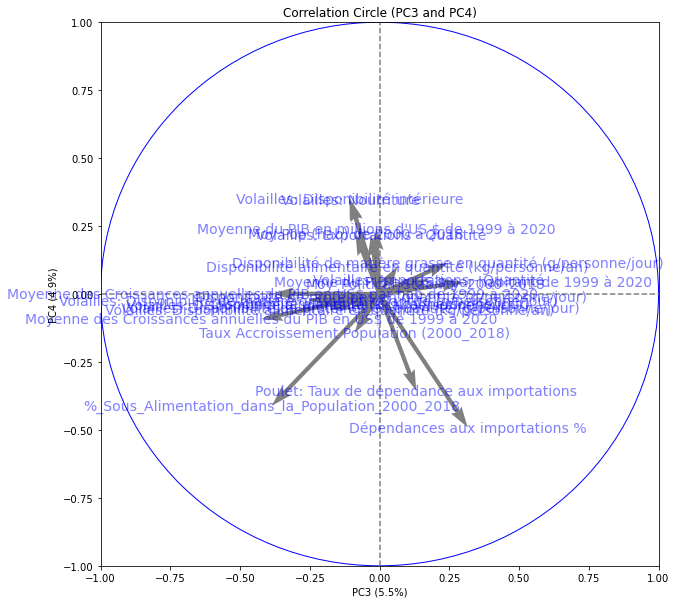

<Figure size 432x288 with 0 Axes>

In [722]:
# Taille de la figure

fs = 40

plt.figure(figsize=(fs,fs))

# Cercle des corrélations

features = Mother_Table_Clean_OK.columns

# on prend le modèle avec MinMax scaler

n_comp = 4

model = PCA(n_components = n_comp).fit(X_scaled_3)


pcs = model.components_

display_circles(pcs, n_comp, model, [(0,1),(2,3)], labels = np.array(features))


# Pour sauvegarder les figures

plt.savefig("P9_cercles_corrélations_3_normalisation.png")
plt.show()

#### Regardons les résultats du groupe que l'on a choisi en priorité : Groupe 3

In [723]:
G3_MM

Moy Pop (hab) de 2000 à 2018  \
Pays                                                  
Brésil                                 1.932597e+08   
Chine, continentale                    1.360829e+09   
États-Unis d'Amérique                  3.055111e+08   

                       Taux Accroissement Population (2000_2018)  \
Pays                                                               
Brésil                                                      0.20   
Chine, continentale                                         0.11   
États-Unis d'Amérique                                       0.16   

                       Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Brésil                                                         3250.0   
Chine, continentale                                            3197.0   
États-Unis d'Amérique                                          3762.0   

                       Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Brésil                                                            770.49        
Chine, continentale                                               968.52        
États-Unis d'Amérique                                             990.38        

                       Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                                   
Brésil                                                            124.60               
Chine, continentale                                                96.89               
États-Unis d'Amérique                                             167.00               

                       Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                              
Brésil                                                             90.87          
Chine, continentale                                               101.44          
États-Unis d'Amérique                                             113.61          

                       Dépendances aux importations %  \
Pays                                                    
Brésil                                           1.63   
Chine, continentale                              8.94   
États-Unis d'Amérique                            9.94   

                       Poulet: Taux de dépendance aux importations  \
Pays                                                                 
Brésil                                                        0.03   
Chine, continentale                                           2.50   
États-Unis d'Amérique                                         0.67   

                       Volailles: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                               
Brésil                                                             204.0           
Chine, continentale                                                 59.0           
États-Unis d'Amérique                                              219.0           

                       Volailles: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                       
Brésil                                                             48.03                   
Chine, continentale                                                12.33                   
États-Unis d'Amérique                                              55.68                   

                       ...  Volailles: Disponibilité intérieure  \
Pays                   ...                                        
Brésil                 ...                               9982.0   
Chine, continentale    ...                              1

In [724]:
# On regarde par rapport au taux de dépendance aux importations de poulet

Group_3_MinMax_Scaler.sort_values(["Poulet: Taux de dépendance aux importations"],ascending= False)

Pays  Moy Pop (hab) de 2000 à 2018  \
76     Chine, continentale                  1.360829e+09   
117  États-Unis d'Amérique                  3.055111e+08   
54                  Brésil                  1.932597e+08   

     Taux Accroissement Population (2000_2018)  \
76                                        0.11   
117                                       0.16   
54                                        0.20   

     Disponibilité alimentaire (Kcal/personne/jour)  \
76                                           3197.0   
117                                          3762.0   
54                                           3250.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
76                                              968.52        
117                                             990.38        
54                                              770.49        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
76                                               96.89               
117                                             167.00               
54                                              124.60               

     Disponibilité de protéines en quantité (g/personne/jour)  \
76                                              101.44          
117                                             113.61          
54                                               90.87          

     Dépendances aux importations %  \
76                             8.94   
117                            9.94   
54                             1.63   

     Poulet: Taux de dépendance aux importations  \
76                                          2.50   
117                                         0.67   
54                                          0.03   

     Volailles: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
76                                                59.0          ...   
117                                              219.0          ...   
54                                               204.0          ...   

     Volailles: Disponibilité intérieure  Volailles: Exportations - Quantité  \
76                               18161.0                               576.0   
117                              18266.0                              3692.0   
54                                9982.0                              4223.0   

     Volailles: Importations - Quantité  Volailles: Nourriture  \
76                                452.0                17518.0   
117                               123.0                18100.0   
54                                  3.0                 9982.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020  \
76                                               13.43                
117                                               3.78                
54                                                5.71                

     Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020  \
76                                               12.80                        
117                                               2.93                        
54                                                4.65                        

     Moyenne du PIB en millions d'US $ de 1999 à 2020  \
76                                         6935305.01   
117                                       15546826.90   
54                                         1563845.83   

     Moyenne du PIB en US $ par habitant de 1999 à 2020  \
76                                             4963.73    
117                                           50086.22    
54                                             7884.12    

     Moy_Political_Stability_2000_2018  \
76                                 0.0   
117                                0.0   
54                                 0.0   

     %_Sous_Alimentation_dans_la_Population_2000_2018  
76                                

La Chine est le pays le plus dépendant des importations de volailles du groupe 3

In [725]:
# On regarde par rapport aux taux de stabilité politique

Group_3_MinMax_Scaler.sort_values(["Moy_Political_Stability_2000_2018"],ascending= False)

Pays  Moy Pop (hab) de 2000 à 2018  \
54                  Brésil                  1.932597e+08   
76     Chine, continentale                  1.360829e+09   
117  États-Unis d'Amérique                  3.055111e+08   

     Taux Accroissement Population (2000_2018)  \
54                                        0.20   
76                                        0.11   
117                                       0.16   

     Disponibilité alimentaire (Kcal/personne/jour)  \
54                                           3250.0   
76                                           3197.0   
117                                          3762.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
54                                              770.49        
76                                              968.52        
117                                             990.38        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
54                                              124.60               
76                                               96.89               
117                                             167.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
54                                               90.87          
76                                              101.44          
117                                             113.61          

     Dépendances aux importations %  \
54                             1.63   
76                             8.94   
117                            9.94   

     Poulet: Taux de dépendance aux importations  \
54                                          0.03   
76                                          2.50   
117                                         0.67   

     Volailles: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
54                                               204.0          ...   
76                                                59.0          ...   
117                                              219.0          ...   

     Volailles: Disponibilité intérieure  Volailles: Exportations - Quantité  \
54                                9982.0                              4223.0   
76                               18161.0                               576.0   
117                              18266.0                              3692.0   

     Volailles: Importations - Quantité  Volailles: Nourriture  \
54                                  3.0                 9982.0   
76                                452.0                17518.0   
117                               123.0                18100.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020  \
54                                                5.71                
76                                               13.43                
117                                               3.78                

     Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020  \
54                                                4.65                        
76                                               12.80                        
117                                               2.93                        

     Moyenne du PIB en millions d'US $ de 1999 à 2020  \
54                                         1563845.83   
76                                         6935305.01   
117                                       15546826.90   

     Moyenne du PIB en US $ par habitant de 1999 à 2020  \
54                                             7884.12    
76                                             4963.73    
117                                           50086.22    

     Moy_Political_Stability_2000_2018  \
54                                 0.0   
76                                 0.0   
117                                0.0   

     %_Sous_Alimentation_dans_la_Population_2000_2018  
54                                

Les pays du groupe ont tous une relative stabilité politique, hormis le Brésil avec les événements récents.

In [726]:
# On regarde qui a le plus gros PIB

Group_3_MinMax_Scaler.sort_values(["Moyenne du PIB en US $ par habitant de 1999 à 2020"],ascending= False)

Pays  Moy Pop (hab) de 2000 à 2018  \
117  États-Unis d'Amérique                  3.055111e+08   
54                  Brésil                  1.932597e+08   
76     Chine, continentale                  1.360829e+09   

     Taux Accroissement Population (2000_2018)  \
117                                       0.16   
54                                        0.20   
76                                        0.11   

     Disponibilité alimentaire (Kcal/personne/jour)  \
117                                          3762.0   
54                                           3250.0   
76                                           3197.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
117                                             990.38        
54                                              770.49        
76                                              968.52        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
117                                             167.00               
54                                              124.60               
76                                               96.89               

     Disponibilité de protéines en quantité (g/personne/jour)  \
117                                             113.61          
54                                               90.87          
76                                              101.44          

     Dépendances aux importations %  \
117                            9.94   
54                             1.63   
76                             8.94   

     Poulet: Taux de dépendance aux importations  \
117                                         0.67   
54                                          0.03   
76                                          2.50   

     Volailles: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
117                                              219.0          ...   
54                                               204.0          ...   
76                                                59.0          ...   

     Volailles: Disponibilité intérieure  Volailles: Exportations - Quantité  \
117                              18266.0                              3692.0   
54                                9982.0                              4223.0   
76                               18161.0                               576.0   

     Volailles: Importations - Quantité  Volailles: Nourriture  \
117                               123.0                18100.0   
54                                  3.0                 9982.0   
76                                452.0                17518.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2020  \
117                                               3.78                
54                                                5.71                
76                                               13.43                

     Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2020  \
117                                               2.93                        
54                                                4.65                        
76                                               12.80                        

     Moyenne du PIB en millions d'US $ de 1999 à 2020  \
117                                       15546826.90   
54                                         1563845.83   
76                                         6935305.01   

     Moyenne du PIB en US $ par habitant de 1999 à 2020  \
117                                           50086.22    
54                                             7884.12    
76                                             4963.73    

     Moy_Political_Stability_2000_2018  \
117                                0.0   
54                                 0.0   
76                                 0.0   

     %_Sous_Alimentation_dans_la_Population_2000_2018  
117                               

Les Etats-Unis est le pays avec le plus fort PIB moyen par habitant. Il est donc probable que le pouvoir d'achat moyen est plus important et donc favorise un climat économique positif.

Il y a 3 pays dans ce groupe


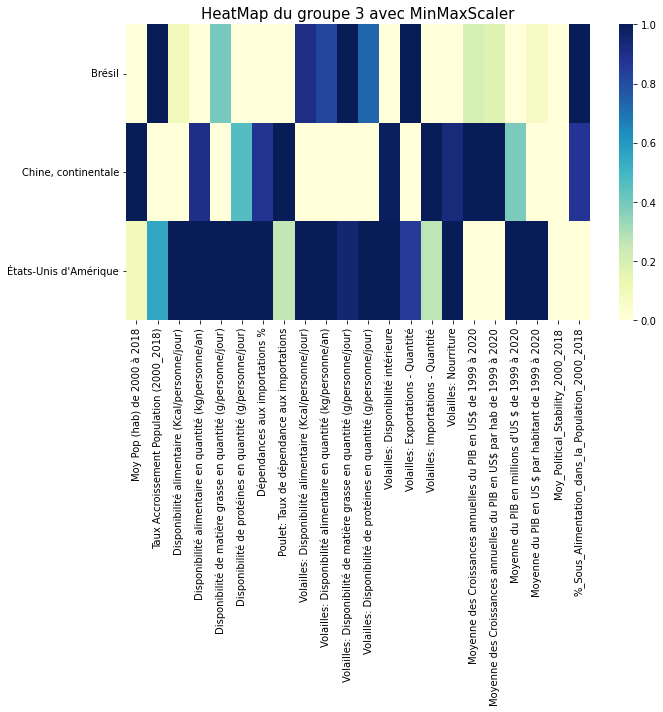

In [727]:
# Taille de la figure

fs = 10

plt.figure(figsize=(fs,fs))

# Pour la légende des axes

yticks = G3_MM.index

xticks = G3_MM.columns

# La heatmap

sns.heatmap(X_scaled_G3_MM,cmap="YlGnBu",yticklabels=yticks,xticklabels=xticks)

# This sets the yticks "upright" with 0, as opposed to sideways with 90.

plt.yticks(rotation=0, fontsize = fs)
plt.xticks(rotation=90, fontsize = fs)

plt.title("HeatMap du groupe 3 avec MinMaxScaler",fontsize= 15)
          
# Pour sauvegarder les figures

print(f"Il y a {G3_MM.shape[0]} pays dans ce groupe")

plt.tight_layout()
plt.savefig("P9_Heatmap_G2_MM.png")
plt.show()

#### Regardons également les pays les plus dépendants aux importations des deux autres groupes :

In [728]:
# On regarde par rapport aux taux de dépendance aux importations de poulet

Group_1_MinMax_Scaler.sort_values(["Poulet: Taux de dépendance aux importations"],ascending= False).head(10)

Pays  Moy Pop (hab) de 2000 à 2018  \
169   Îles Salomon                     522872.26   
371    Tadjikistan                    7475051.11   
379    Timor-Leste                    1073634.58   
155          Haïti                    9797120.79   
131         Gambie                    1762956.68   
207        Lesotho                    2025955.11   
11          Angola                   22917624.68   
213        Libéria                    3770713.95   
147         Guinée                   10080103.00   
150  Guinée-Bissau                    1505153.42   

     Taux Accroissement Population (2000_2018)  \
169                                       0.58   
371                                       0.46   
379                                       0.43   
155                                       0.31   
131                                       0.73   
207                                       0.04   
11                                        0.88   
213                                       0.69   
147                                       0.51   
150                                       0.56   

     Disponibilité alimentaire (Kcal/personne/jour)  \
169                                          2410.0   
371                                          2099.0   
379                                          2142.0   
155                                          2163.0   
131                                          2542.0   
207                                          2277.0   
11                                           2266.0   
213                                          2127.0   
147                                          2793.0   
150                                          2252.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
169                                             659.79        
371                                             541.03        
379                                             390.22        
155                                             447.24        
131                                             350.97        
207                                             386.04        
11                                              570.95        
213                                             378.68        
147                                             564.37        
150                                             390.17        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
169                                              50.95               
371                                              57.46               
379                                              44.97               
155                                              44.29               
131                                              80.03               
207                                              43.34               
11                                               48.73               
213                                              55.37               
147                                              68.72               
150                                              62.95               

     Disponibilité de protéines en quantité (g/personne/jour)  \
169                                              53.64          
371                                              55.38          
379                                              57.69          
155                                              49.91          
131                                              63.48          
207                                              63.95          
11                                               54.09          
213                                              39.91          
147                                              61.78          
150                                              44.13          

     Dépendances aux importations %  \
169                           12.54   
371                      

In [729]:
# On regarde par rapport aux taux de dépendance aux importations de poulet

Group_2_MinMax_Scaler.sort_values(["Poulet: Taux de dépendance aux importations"],ascending= False).head(10)

Pays  Moy Pop (hab) de 2000 à 2018  \
72   Chine - RAS de Hong-Kong                    6947952.53   
39                   Belgique                   10859220.68   
289                  Pays-Bas                   16578992.21   
106       Émirats arabes unis                    6923823.37   
219                Luxembourg                     505092.42   
274                      Oman                    3206863.00   
256                   Namibie                    2094651.79   
229                  Maldives                     373134.26   
247                  Mongolie                    2720309.63   
98                   Djibouti                     834018.84   

     Taux Accroissement Population (2000_2018)  \
72                                        0.12   
39                                        0.12   
289                                       0.07   
106                                       2.07   
219                                       0.39   
274                                       1.13   
256                                       0.36   
229                                       0.85   
247                                       0.32   
98                                        0.34   

     Disponibilité alimentaire (Kcal/personne/jour)  \
72                                           3353.0   
39                                           3770.0   
289                                          3251.0   
106                                          3370.0   
219                                          3334.0   
274                                          2924.0   
256                                          2429.0   
229                                          2253.0   
247                                          2369.0   
98                                           2677.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
72                                              776.03        
39                                             1015.74        
289                                             945.03        
106                                             627.67        
219                                             989.02        
274                                             709.71        
256                                             568.54        
229                                             513.84        
247                                             545.92        
98                                              431.32        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
72                                              133.74               
39                                              155.65               
289                                             129.25               
106                                              89.31               
219                                             136.34               
274                                              76.79               
256                                              62.27               
229                                              48.08               
247                                              95.27               
98                                               59.81               

     Disponibilité de protéines en quantité (g/personne/jour)  \
72                                              137.88          
39                                              101.35          
289                                             104.43          
106                                             107.26          
219                                             105.79          
274                                              85.04          
256                                              62.00          
229                                              81.63          
247                                              82.35          
98                                               66.43     

## CONCLUSION

Je choisirais personnellement le groupe 2 car il est prometteur selon plusieurs indicateurs (Taux de dépendance aux importations, stabilité politique, forte population...), même si une analyse plus approfondie semble nécessaire, avec un pays comme la Chine par exemple.

En considérant que les autres groupes peuvent être des choix secondaires, certains pays peuvent être intéressants à prospecter pour différentes raisons (proximité géographique, volumes importants, fort taux de dépendance aux importations avec une population forte...).

Choix les plus prometteurs :
- Chine
- Etats-Unis

Choix secondaires :
- Belgique
- Pays-Bas
- Emirats Arabes Unis
- Oman
- Congo
- Haïti
- Angola